In [20]:
import pandas as pd
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/grl.mplstyle')

## Summary:
This notebook analyze the bulk velocity and height etc.
## <a class="anchor" id="0">Table of content: </a> 

#### [1. Define case and read-in functions](#1)
#### [2. Illustration of layers for paper](#2)

In [2]:
from bulk_func import array_to_mesh, read_t

In [3]:
class Case(object):
    """ This class defines methods specific to cases.
        Attributes: 
            self.NL 
    """
    def __init__(self, NL=20, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/'):
        self.NL = NL 
        self.LEVEL = LEVEL
        self.path = path    

### 3D reconstruction of the field

In [4]:
def read_full (case, tseries=(0,40,80,120,160)):
    # x and y locations should be fixed
    z_mesh_t = [] # z locations at different times
    ux_t = [] # ux at different times
    uy_t = [] # uy at different times
    uz_t = [] # uz at different times
    omegax_t = []
    omegay_t = []
    omegaz_t = []
    dzdx_t = []
    dzdy_t = []
    dzdxc_t = []
    dzdyc_t = []
    for t in tqdm(tseries):
        [h, ux, uy, uz, omegax, omegay, omegaz, dzdx, dzdy, dzdxc, dzdyc] = read_t(fieldnames=['h','ux','uy','uz','omegax','omegay','omegaz','dzdx','dzdy','dzdxc','dzdyc'], 
                                                                                   t=t, Nh=Nh, Nl=Nl, path=case.path)
        x_mesh, y_mesh, z_mesh = array_to_mesh (h, L0=L, H=H, Nh=Nh, Nl=Nl)
        z_mesh_t.append(z_mesh)
        ux_t.append(ux); uy_t.append(uy); uz_t.append(uz)
        omegax_t.append(omegax); omegay_t.append(omegay); omegaz_t.append(omegaz)
        dzdx_t.append(dzdx); dzdy_t.append(dzdy)
        dzdxc_t.append(dzdxc); dzdyc_t.append(dzdyc)
        
        dict_all = {'x_mesh': x_mesh, 'y_mesh': y_mesh, 'z_mesh_t': z_mesh_t, 'ux_t': ux_t, 'uy_t': uy_t, 'uz_t': uz_t, 
                    'omegax_t': omegax_t, 'omegay_t': omegay_t, 'omegaz_t': omegaz_t, 'dzdx_t': dzdx_t, 'dzdy_t': dzdy_t, 'dzdxc_t': dzdxc_t, 'dzdyc_t': dzdyc_t}
    return dict_all

In [5]:
case_field1 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/vort/')
case = case_field1
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

case_field2 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/vort/')
case = case_field2
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

case_field3 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/vort/')
case = case_field3
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

case_field4 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/vort/')
case = case_field4
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

case_field5 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/vort/')
case = case_field5
case.L = 500; case.H = 100; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

case_field6 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/vort/')
case = case_field6
case.L = 500; case.H = 100; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120,160]

In [6]:
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
from prepare import load_object, save_object 

''' Read in the fields from pickle '''
for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
    picklename = case.path + 'fields.pkl'
    case.dict = load_object(picklename)

# ''' OR read in the fields from scratch and then dump '''
# for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
#     case.dict = read_full (case, tseries=case.tseries)
# for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
#     picklename = case.path + 'fields.pkl'
#     save_object(case.dict, picklename)

In [9]:
case_field3_zerodiff = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/tests/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503_zerodiffnew/')
case = case_field3_zerodiff
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
case.tseries = [0,40,80,120]

case = case
case.dict = read_full (case, tseries=case.tseries)

100%|██████████| 4/4 [04:21<00:00, 65.38s/it]


(15, 1024, 1024)


NameError: name 'case_field3_zerodiff' is not defined

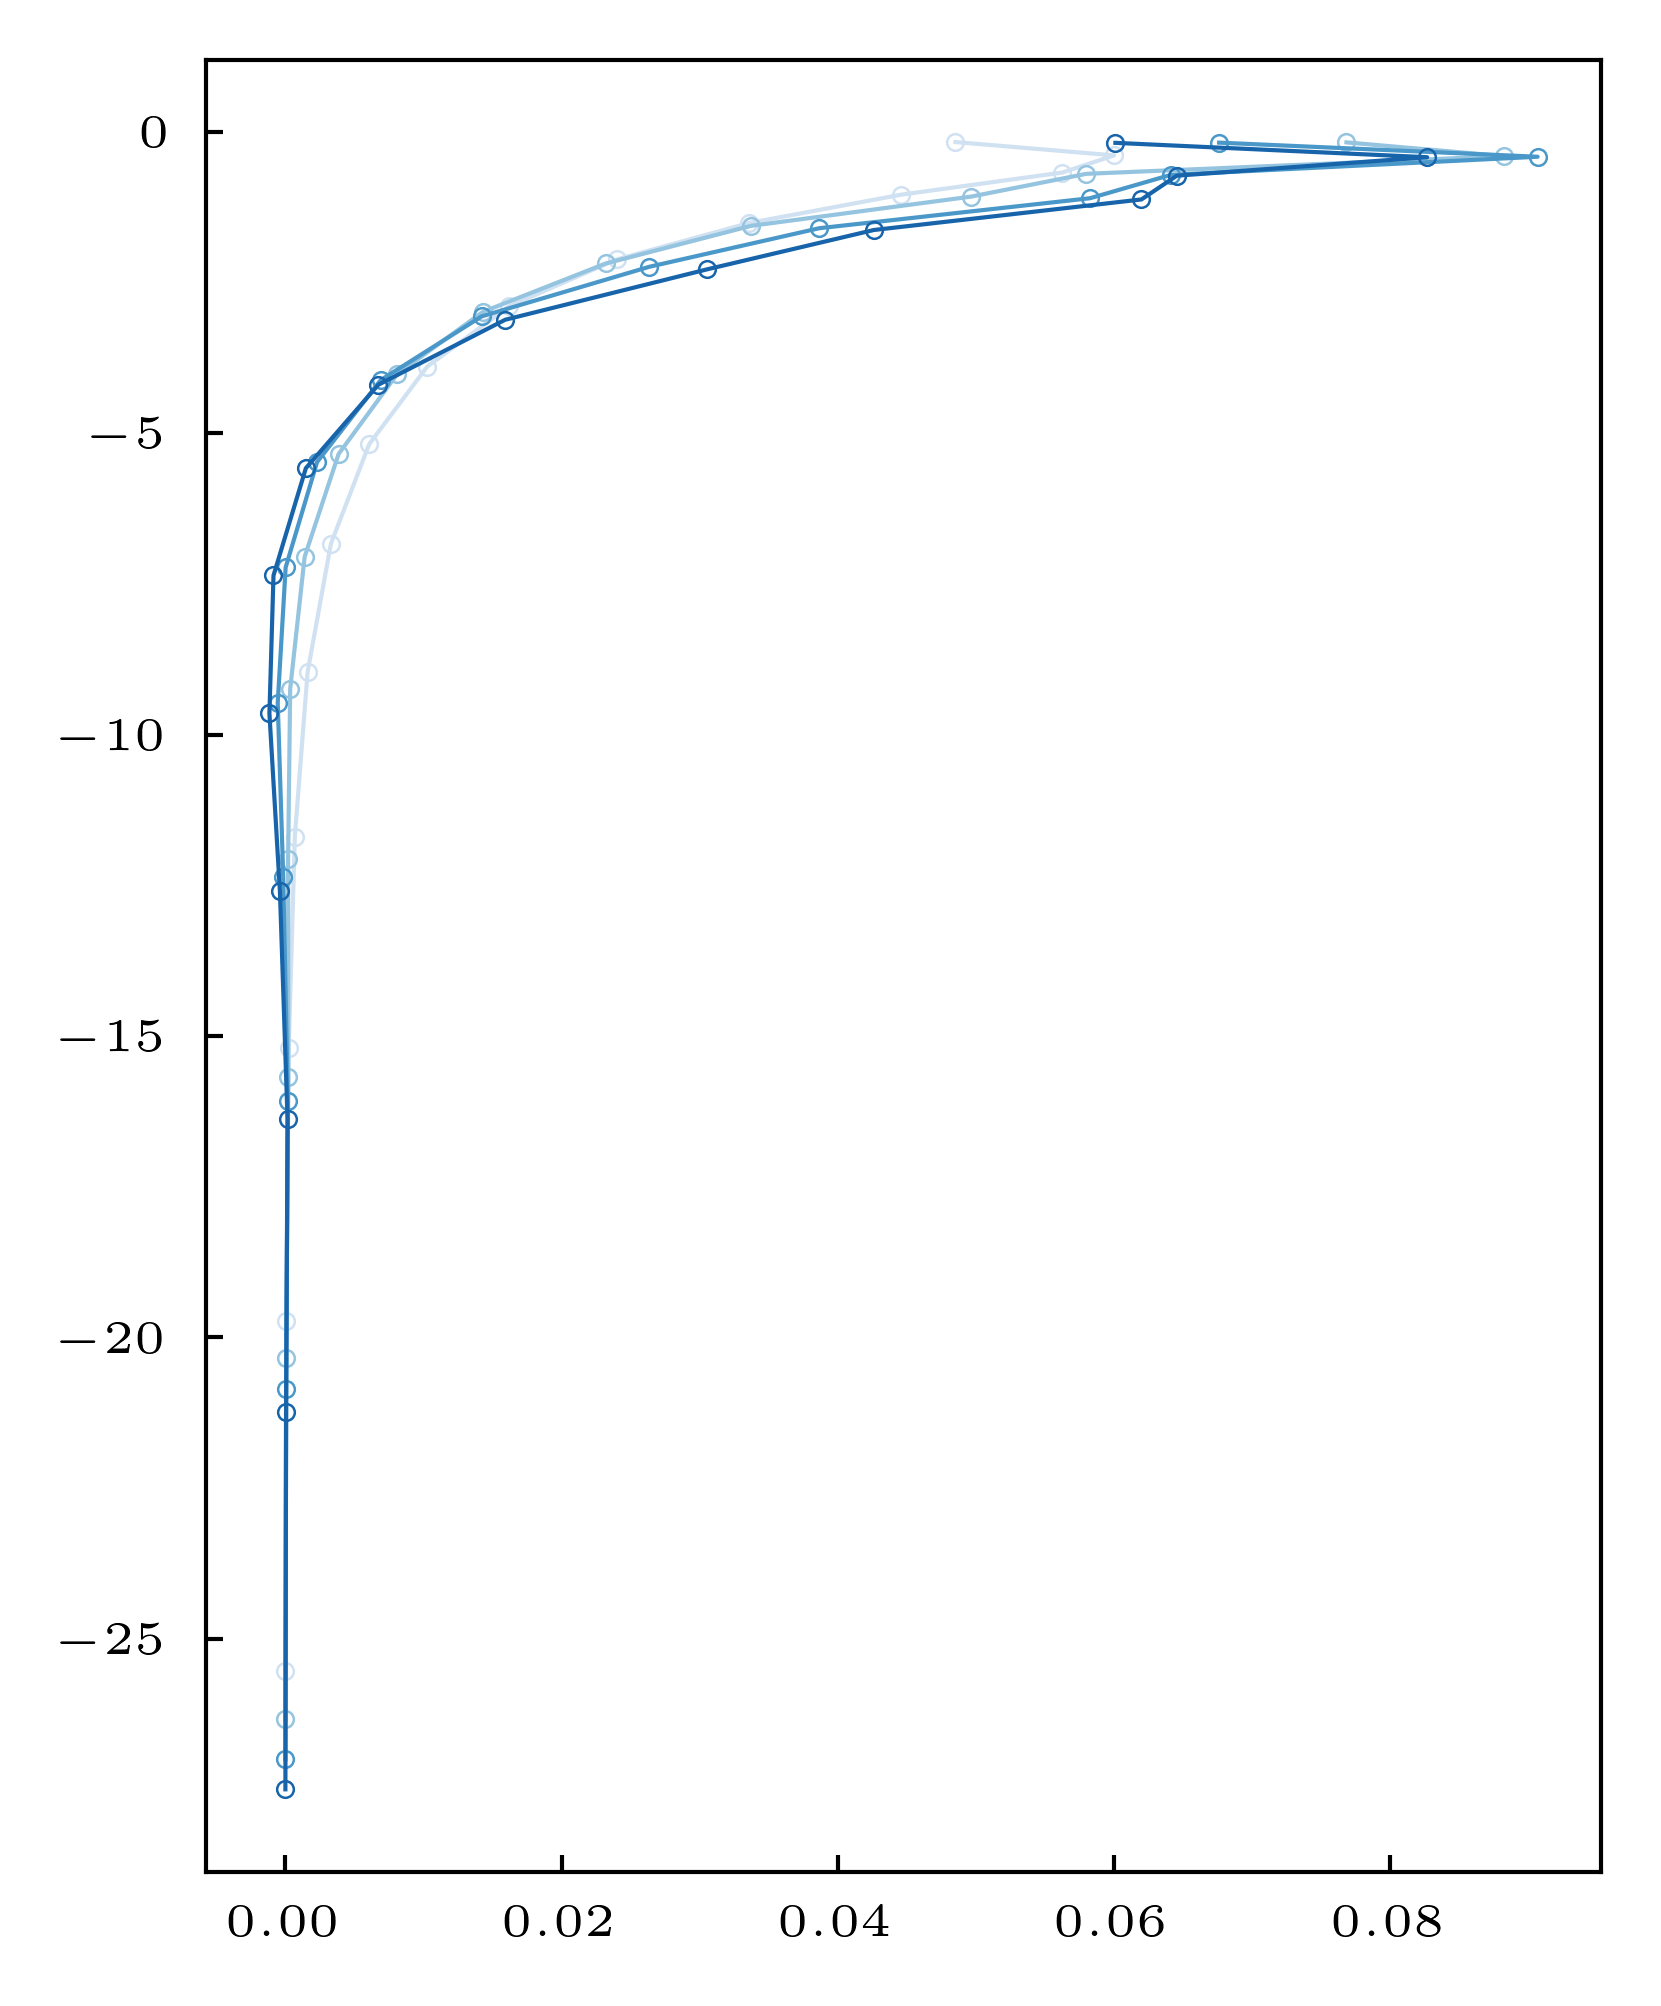

In [7]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
for i in range(0,4):
    case = case_field3
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2)), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs,
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Normal, t=%g' %case.tseries[i])
    
for i in range(0,4):
    case = case_field3_zerodiff
    filename = case.path + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2)), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Zero vert diff, t=%g' %case.tseries[i])


# plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-10,-0.1])
# plt.xlim([-0.005,0.04])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')
plt.legend()

### Example of visualization

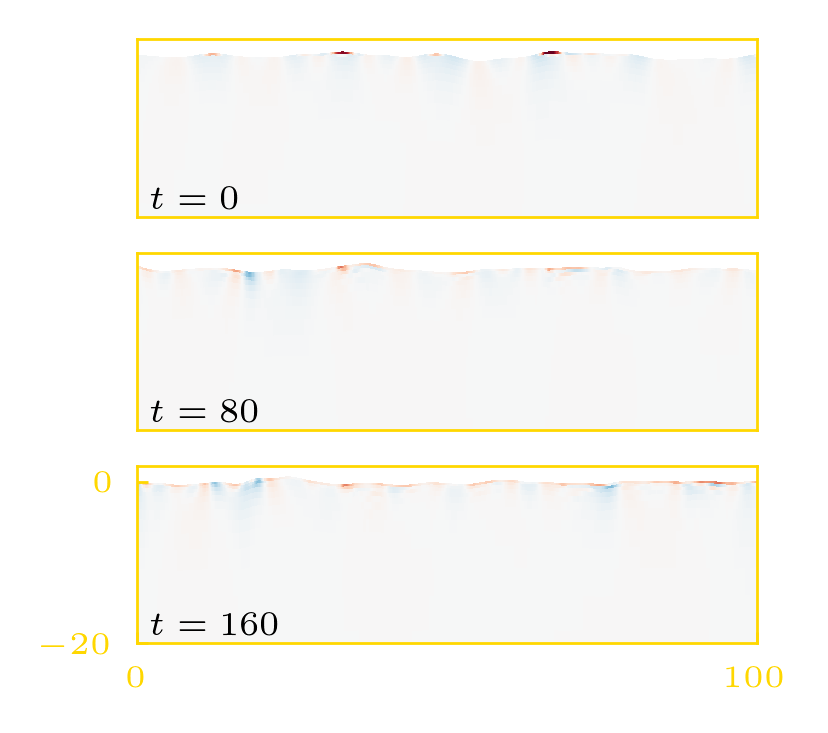

In [66]:
case = case_field1
fig, axes = plt.subplots (3, 1, figsize=[2,2], sharex=True); ax = plt.gca()

yslice = 1023
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
c = 'gold'
# c = 'darkgreen'

for i, it in enumerate((0,2,4)):
    field = case.dict['omegay_t'][it][:,:,yslice]
    image = axes[i].pcolormesh(case.dict['x_mesh'][:,:,yslice], case.dict['z_mesh_t'][i][:,:,yslice], field,
                          shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
    axes[i].set_xlim([0,L/2]); axes[i].set_xticks([0,L/2]);
    axes[i].set_yticks([-L/10,0]); axes[i].set_ylim([-L/10, L/100])
    axes[i].spines['bottom'].set_color(c)
    axes[i].spines['top'].set_color(c)
    axes[i].spines['right'].set_color(c)
    axes[i].spines['left'].set_color(c)
    axes[i].annotate('$t=%g$' %case.tseries[it], (2,-19), fontsize=6)
    
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
# plt.colorbar(image)
# 0.17117248 -0.2046054
# 0.17087948 -0.13110258

axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].tick_params(axis='both', colors=c)
axes[1].tick_params(axis='both', colors=c)
axes[2].tick_params(axis='both', colors=c)

(-100.0, 100.0, -40.0, 20.0)

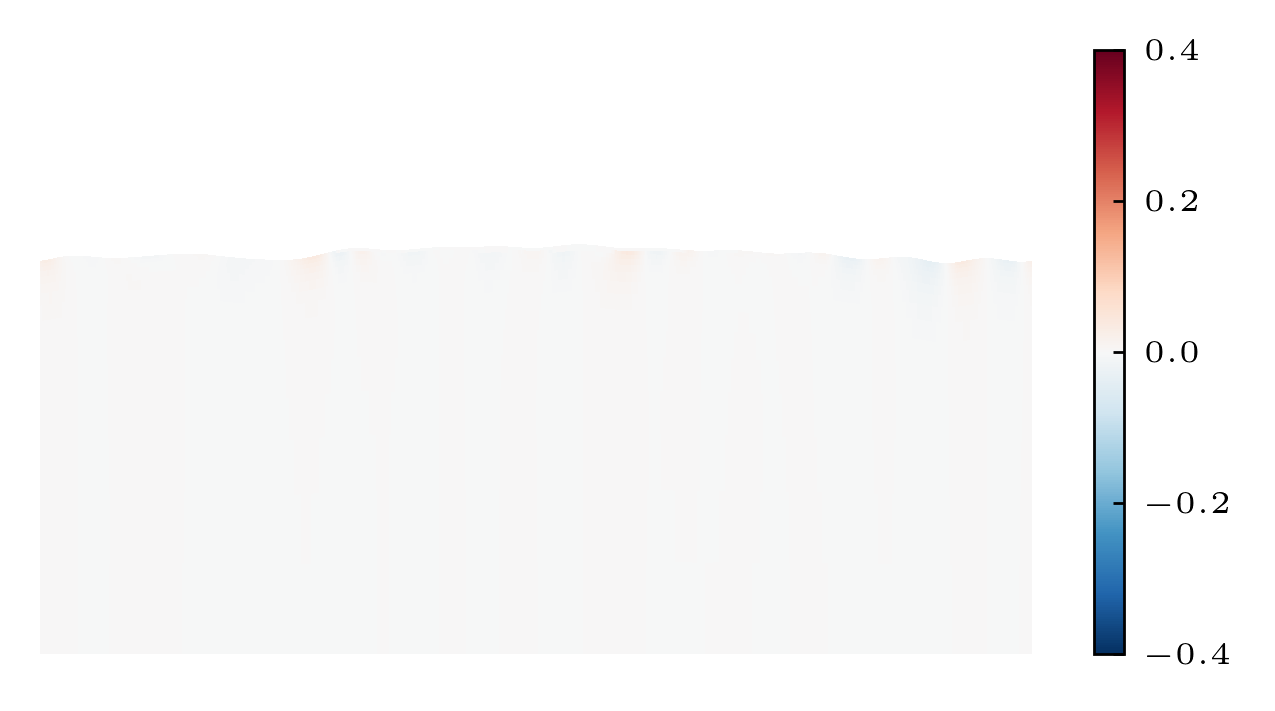

In [56]:
case = case_field3
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
i = 0
xslice = 1
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
field = case.dict['omegaz_t'][i][:,xslice,:]
image = ax.pcolormesh(case.dict['y_mesh'][:,xslice,:], case.dict['z_mesh_t'][i][:,xslice,:], field,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
plt.colorbar(image, ticks=[-0.4,-0.2,0,0.2,0.4])


# 0.17117248 -0.2046054
# 0.17087948 -0.13110258
ax.axis('off')

In [36]:
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
print(np.average(case.dict['z_mesh_t'][i][-8,:,:])/Hs)

-3.119984590572397


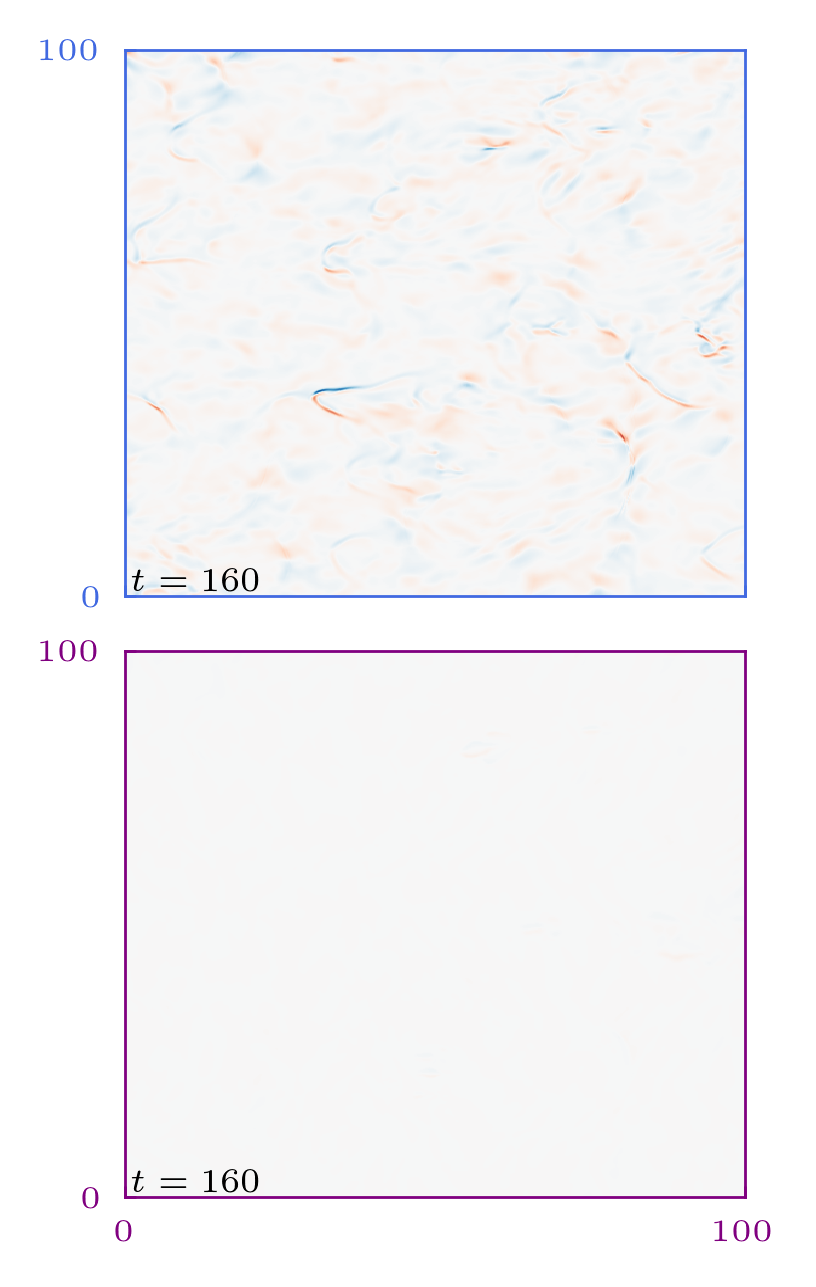

In [84]:
case = case_field1
fig, axes = plt.subplots (2, 1, figsize=[2,3.8], sharex=True); ax = plt.gca()

i = 4
zslice = -8
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
field = case.dict['omegaz_t'][i][zslice,:,:]
image = axes[1].pcolormesh(case.dict['x_mesh'][0,:,:], case.dict['y_mesh'][0,:,:], field,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax = axes[1]
ax.set_xlim([0,L/2]); ax.set_xticks([-0,L/2])
ax.set_yticks([0,L/2]); ax.set_ylim([0,L/2])
c = 'purple'
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.spines['bottom'].set_color(c)
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c)
ax.spines['left'].set_color(c)
ax.annotate('$t=%g$' %case.tseries[i], (1,1), fontsize=6)

zslice = -1
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
field = case.dict['omegaz_t'][i][zslice,:,:]
image = axes[0].pcolormesh(case.dict['x_mesh'][0,:,:], case.dict['y_mesh'][0,:,:], field,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax = axes[0]
ax.set_xlim([0,L/2]); ax.set_xticks([-0,L/2])
ax.set_yticks([0,L/2]); ax.set_ylim([0,L/2])
c = 'royalblue'
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.spines['bottom'].set_color(c)
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c)
ax.spines['left'].set_color(c)
ax.annotate('$t=%g$' %case.tseries[i], (1,1), fontsize=6)

# axes[0].get_xaxis().set_visible(False)
# axes[0].get_yaxis().set_visible(False)
# axes[1].get_xaxis().set_visible(False)
# axes[1].get_yaxis().set_visible(False)
plt.subplots_adjust(hspace=0.1)

In [ ]:
case = case_field3
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
i = 3
zslice = 
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
field = case.dict['omegaz_t'][i][:,xslice,:]
image = ax.pcolormesh(case.dict['y_mesh'][:,xslice,:], case.dict['z_mesh_t'][i][:,xslice,:], field,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
# plt.colorbar(image)
# 0.17117248 -0.2046054
# 0.17087948 -0.13110258
ax.axis('off')

In [5]:
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
from prepare import load_object, save_object 

''' Read in the fields from pickle '''
for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
    picklename = case.path + 'fields.pkl'
    case.dict = load_object(picklename)

# ''' OR read in the fields from scratch and then dump '''
# for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
#     case.dict = read_full (case, tseries=case.tseries)
# for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
#     picklename = case.path + 'fields.pkl'
#     save_object(case.dict, picklename)

In [7]:
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform, spectrum_integration_linear

""" Spectrum AT t=160! """
for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
        filename = case.path[0:-5] + 'surface/eta_matrix_%g' %160
        print(filename)
        eta = np.fromfile(filename, dtype=np.float32)
        N = 1024; L0=case.L
        eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]          
        
        case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
        case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
        case.mu_plateau = case.mu[-1]
        case.Hskp = np.var(eta)**0.5*4*case.kp
        print(case.Hskp, case.mu_plateau)
        """ And then assign color by mu """            
        case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.15) # colored by sigma

/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.15462155872718988 0.10268261356964183
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.2103298977526035 0.14468032499292985
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/surface/eta_matrix_160
0.22675143208821683 0.15042002919061212
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.26721707565693875 0.16331219580504994
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.27859448067759424 0.16749989888706301
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.3126609479665678 0.17126853601501008


In [11]:
for case in (case_field1, case_field2, case_field3, case_field4):
    for itime in (3,4):
        print('t=%g' %case.tseries[itime])
        epsilon = np.zeros(15)
        z = np.zeros(15)
        for i in range (0,15):
            epsilon[i] = np.average(case.dict['omegax_t'][itime][i]**2 + case.dict['omegay_t'][itime][i]**2 + case.dict['omegaz_t'][itime][i]**2)
            z[i] = np.average(case.dict['z_mesh_t'][itime][i][:])
        phi = np.trapz(epsilon, x=z)
        print(phi)


t=120
0.0030622368530392385
t=160
0.003603846578254245
t=120
0.045910859546951704
t=160
0.039168633795627954
t=120
0.08689162324413192
t=160
0.06127811355676627
t=120
0.14591187356296176
t=160
0.1554606411395642


In [ ]:
phi = [[0.0030622, 0.0036038], [0.0459108, 0.0391686], [0.0868916, 0.0612781], [0.1459118, 0.1554606]]

In [11]:
from matplotlib.ticker import Locator


class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))


# x = np.linspace(-5, 5, 100)
# y = x

# plt.plot(x, y)
# plt.yscale('symlog', linthreshy=1e-1)

# yaxis = plt.gca().yaxis
# yaxis.set_minor_locator(MinorSymLogLocator(1e-1))

# plt.show()

t=160
Phi=0.00360385, kp*Hs=0.154622, z_top/Hs=-0.273754
t=160
Phi=0.0391686, kp*Hs=0.21033, z_top/Hs=-0.201442
t=160
Phi=0.0612781, kp*Hs=0.226751, z_top/Hs=-0.186919
t=160
Phi=0.155461, kp*Hs=0.267217, z_top/Hs=-0.158569


(0.001, 14)

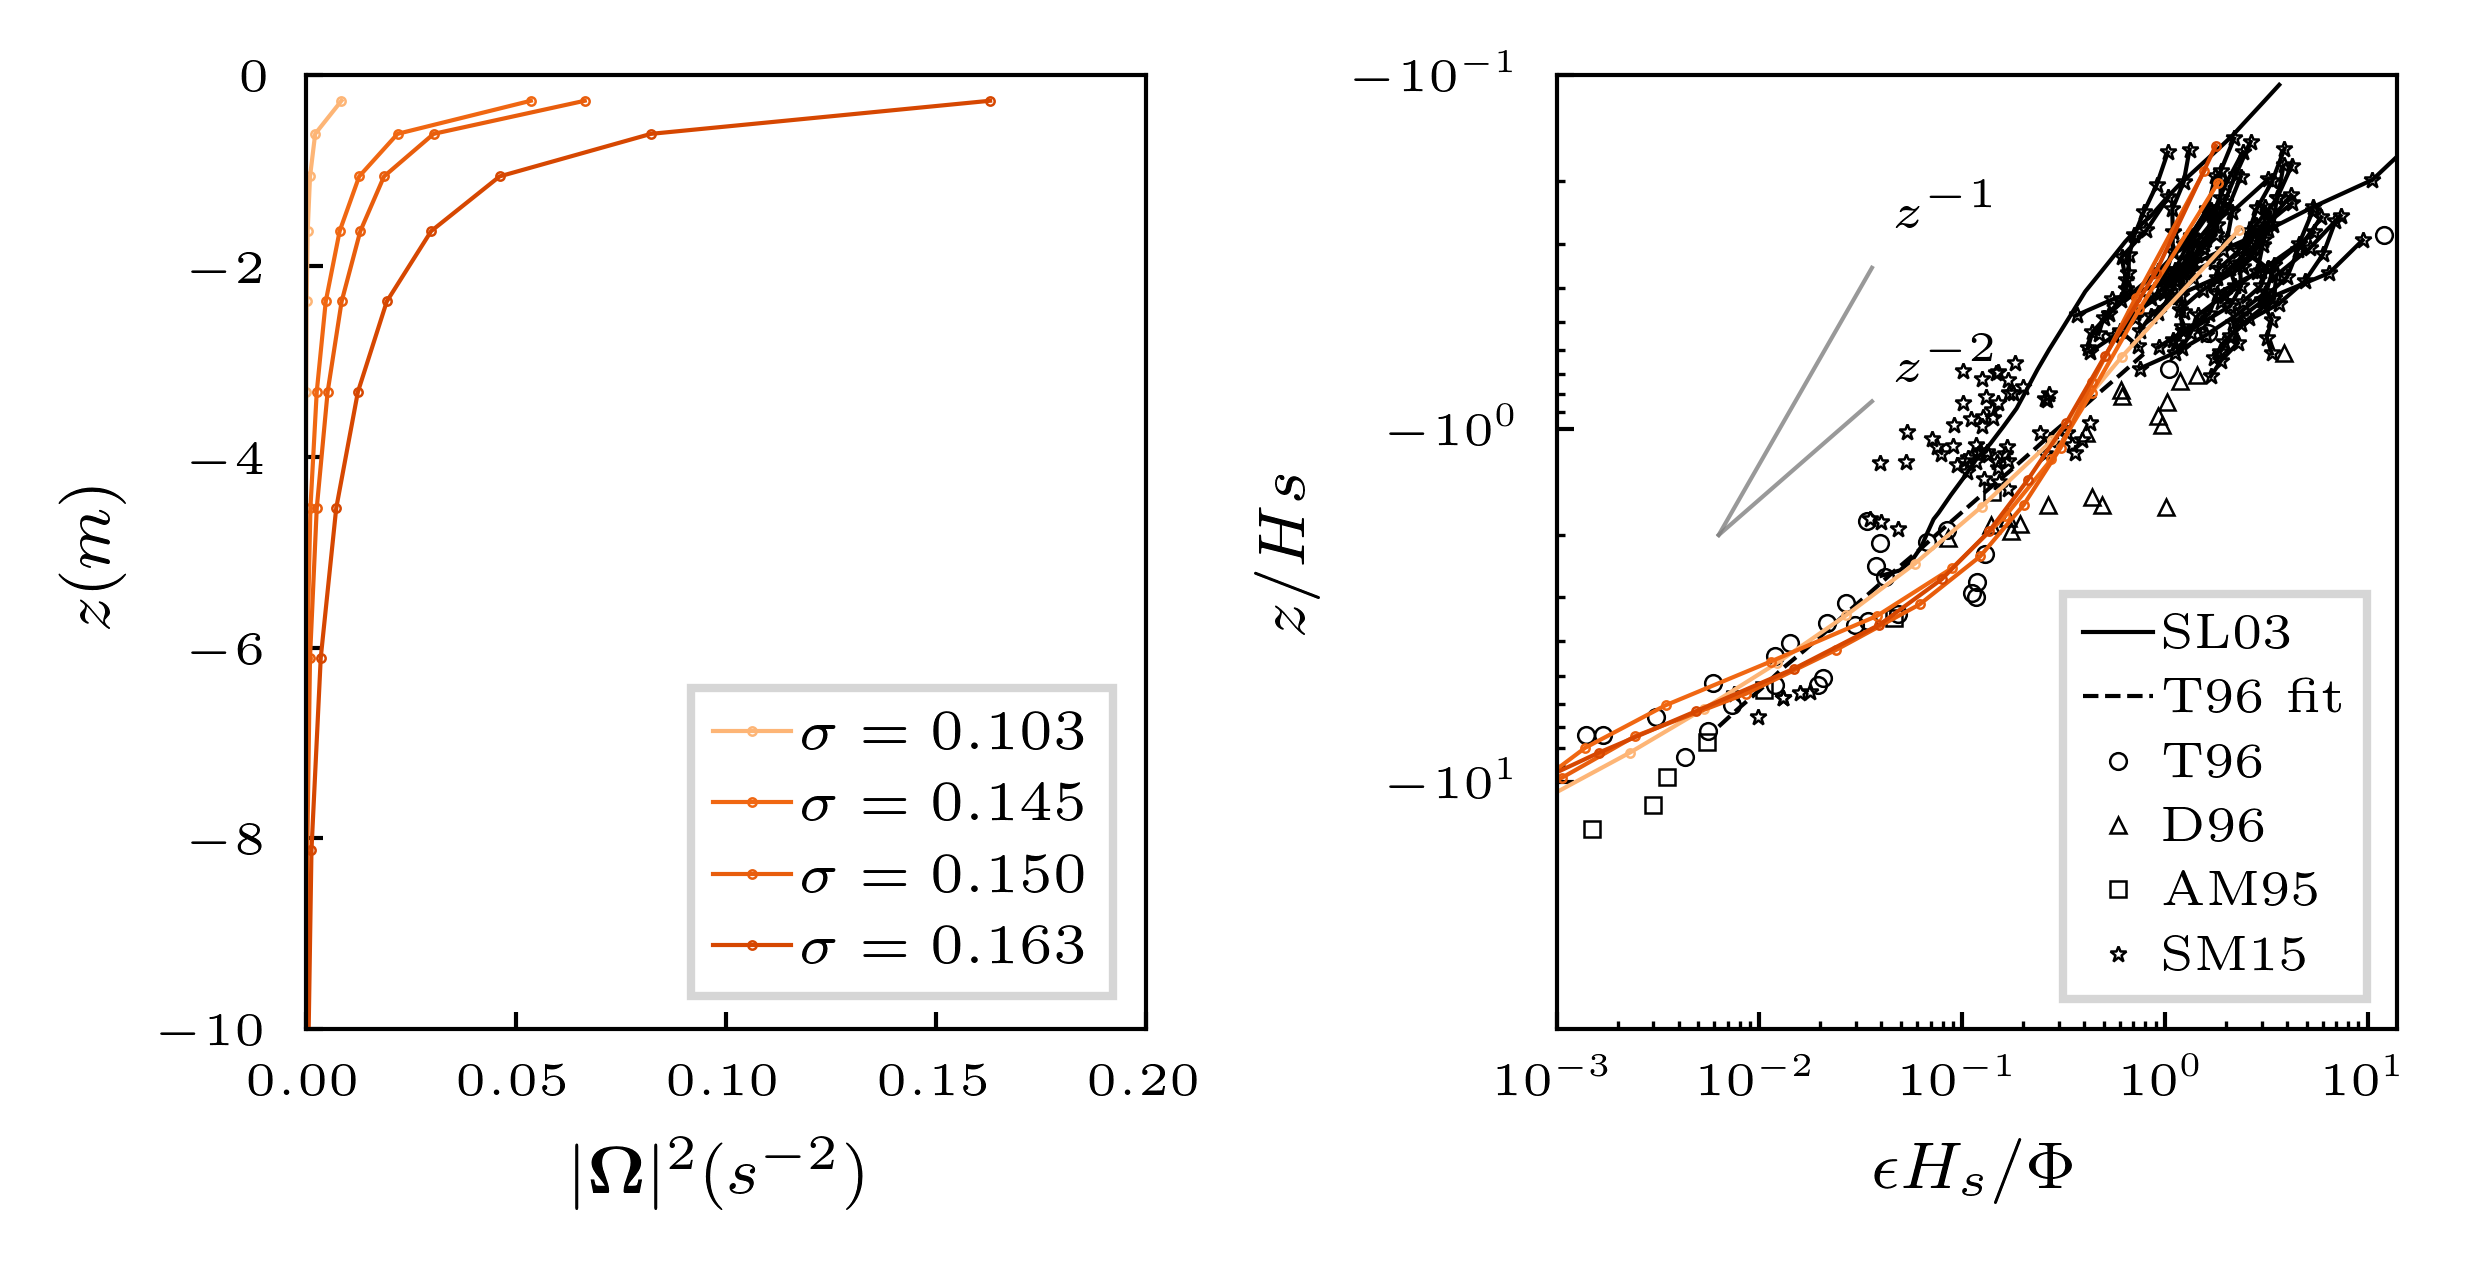

In [58]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize=[4,2])

SL03 = pd.read_csv('data_dissipation/SL03.csv', names=['x', 'y'])
axes[1].plot(SL03.x, SL03.y, '-', c='k', label='SL03')

T96fit = pd.read_csv('data_dissipation/T96fit.csv', names=['x', 'y'])
axes[1].plot(T96fit.x, T96fit.y, '--', c='k', label='T96 fit')
axes[1].plot(12.0484, -0.2830, 'o', c='k')
T96 = pd.read_csv('data_dissipation/T96.csv', names=['x', 'y'])
axes[1].plot(T96.x, T96.y, 'o', c='k', label='T96')

xstart = 0.01; ystart = -2
axes[1].plot(T96fit.x[0:8], -T96fit.x[0:8]**(-0.5)/(-T96fit.x[0]**(-0.5))*(ystart), c='gray', alpha=0.8)
axes[1].annotate('$z^{-2}$',(T96fit.x[8],-T96fit.x[8]**(-0.5)/(-T96fit.x[0]**(-0.5))*(ystart)), fontsize=6)
axes[1].plot(T96fit.x[0:8], -T96fit.x[0:8]**(-1)/(-T96fit.x[0]**(-1))*(ystart), c='gray', alpha=0.8)
axes[1].annotate('$z^{-1}$',(T96fit.x[8],-T96fit.x[8]**(-1)/(-T96fit.x[0]**(-1))*(ystart)), fontsize=6)

D96young = pd.read_csv('data_dissipation/D96young.csv', names=['x', 'y'])
axes[1].plot(D96young.x, D96young.y, '^', c='k', label='D96')
D96old = pd.read_csv('data_dissipation/D96old.csv', names=['x', 'y'])
axes[1].plot(D96old.x, D96old.y, '^', c='k')

AM95 = pd.read_csv('data_dissipation/AM95.csv', names=['x', 'y'])
axes[1].plot(AM95.x, AM95.y, 's', c='k', label='AM95')

# S15 = pd.read_csv('data_dissipation/Sutherland_upper.txt', names=['x', 'y'])
# axes[1].plot(S15.x, S15.y, '*', c='k', label='S15')
# S15 = pd.read_csv('data_dissipation/Sutherland_lower.txt', names=['x', 'y'])
# axes[1].plot(S15.x, S15.y, '*', c='k')

# After getting data from Peter Sutherland
# for i in range(1,5):
#     S15 = pd.read_csv('data_dissipation/HIRES2010_%d.txt' %i, delimiter=' ')
#     plt.plot(S15.epsilon, S15.z, '*', c='k', label='S15')
# for i in (10,11,13,14):
#     S15 = pd.read_csv('data_dissipation/RaDyO2019_%d.txt' %i, delimiter=' ')
#     plt.plot(S15.epsilon, S15.z, '*', c='k', label='S15')

import os
for i in range(1,40):
    file = 'data_dissipation/SM15/SoCal2010_C1_B2_%d.txt' %i
    if os.path.isfile(file):
        S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C1_B2_%d.txt' %i, delimiter=' ')
        plt.plot(S15.epsilon, S15.z, '*', c='k')
    file = 'data_dissipation/SM15/SoCal2010_C1_B3_%d.txt' %i
    if os.path.isfile(file):
        S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C1_B3_%d.txt' %i, delimiter=' ')
        plt.plot(S15.epsilon, S15.z, '*', c='k')    
    file = 'data_dissipation/SM15/SoCal2010_C1_VERT_%d.txt' %i
    if os.path.isfile(file):
        S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C1_VERT_%d.txt' %i, delimiter=' ')
        plt.plot(S15.epsilon, S15.z, '-*', c='k') 
        
for i in range(4,10):
    S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C2_B2_%d.txt' %i, delimiter=' ')
    plt.plot(S15.epsilon, S15.z, '*', c='k')   
for i in (2,4,5,6,7):    
    S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C3_B2_%d.txt' %i, delimiter=' ')
    plt.plot(S15.epsilon, S15.z, '*', c='k')   

S15 = pd.read_csv('data_dissipation/SM15/SoCal2010_C3_B2_%d.txt' %7, delimiter=' ')
plt.plot(S15.epsilon, S15.z, '*', c='k', label='SM15')   
    
for case in (case_field1, case_field2, case_field3, case_field4):
    itime = 4
    print('t=%g' %case.tseries[itime])
    epsilon = np.zeros(15)
    z = np.zeros(15)
    for i in range (0,15):
        epsilon[i] = np.average(case.dict['omegax_t'][itime][i]**2 + case.dict['omegay_t'][itime][i]**2 + case.dict['omegaz_t'][itime][i]**2)
        z[i] = np.average(case.dict['z_mesh_t'][itime][i][:])
    phi = np.trapz(epsilon, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    print('Phi=%g, kp*Hs=%g, z_top/Hs=%g' %(phi,case.kp*Hs,z[-1]/Hs))   
    axes[0].plot(epsilon,z,'.-',label=r'$\sigma=%.3f$' %case.mu_plateau, c=case.cc)
    axes[1].plot(epsilon[3:]*Hs/phi,z[3:]/Hs,'.-',c=case.cc)
    
    
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right', fontsize=6)
axes[0].set_ylim([-10,0])
axes[0].set_xlim([0,2*10**(-1)])
# axes[0].set_xlabel('$\sum \omega_i^2 (s^{-2})$')
axes[0].set_xlabel(r'$|\mathbf{\Omega}|^2 (s^{-2})$')
axes[0].set_ylabel('$z (m)$')

# axes[1].set_xlabel('$\sum \omega_i^2 H_s/\Phi$')
axes[1].set_xlabel('$\epsilon H_s/\Phi$')
axes[1].set_ylabel('$z/Hs$')
axes[1].set_xscale('log'); axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].yaxis.set_minor_locator(MinorSymLogLocator(1e-2))
axes[1].set_ylim([-50,-0.1])
axes[1].set_xlim([0.001,14])

(15, 1024, 1024)


Text(0, 0.5, '$z\\:\\mathrm{ (m)}$')

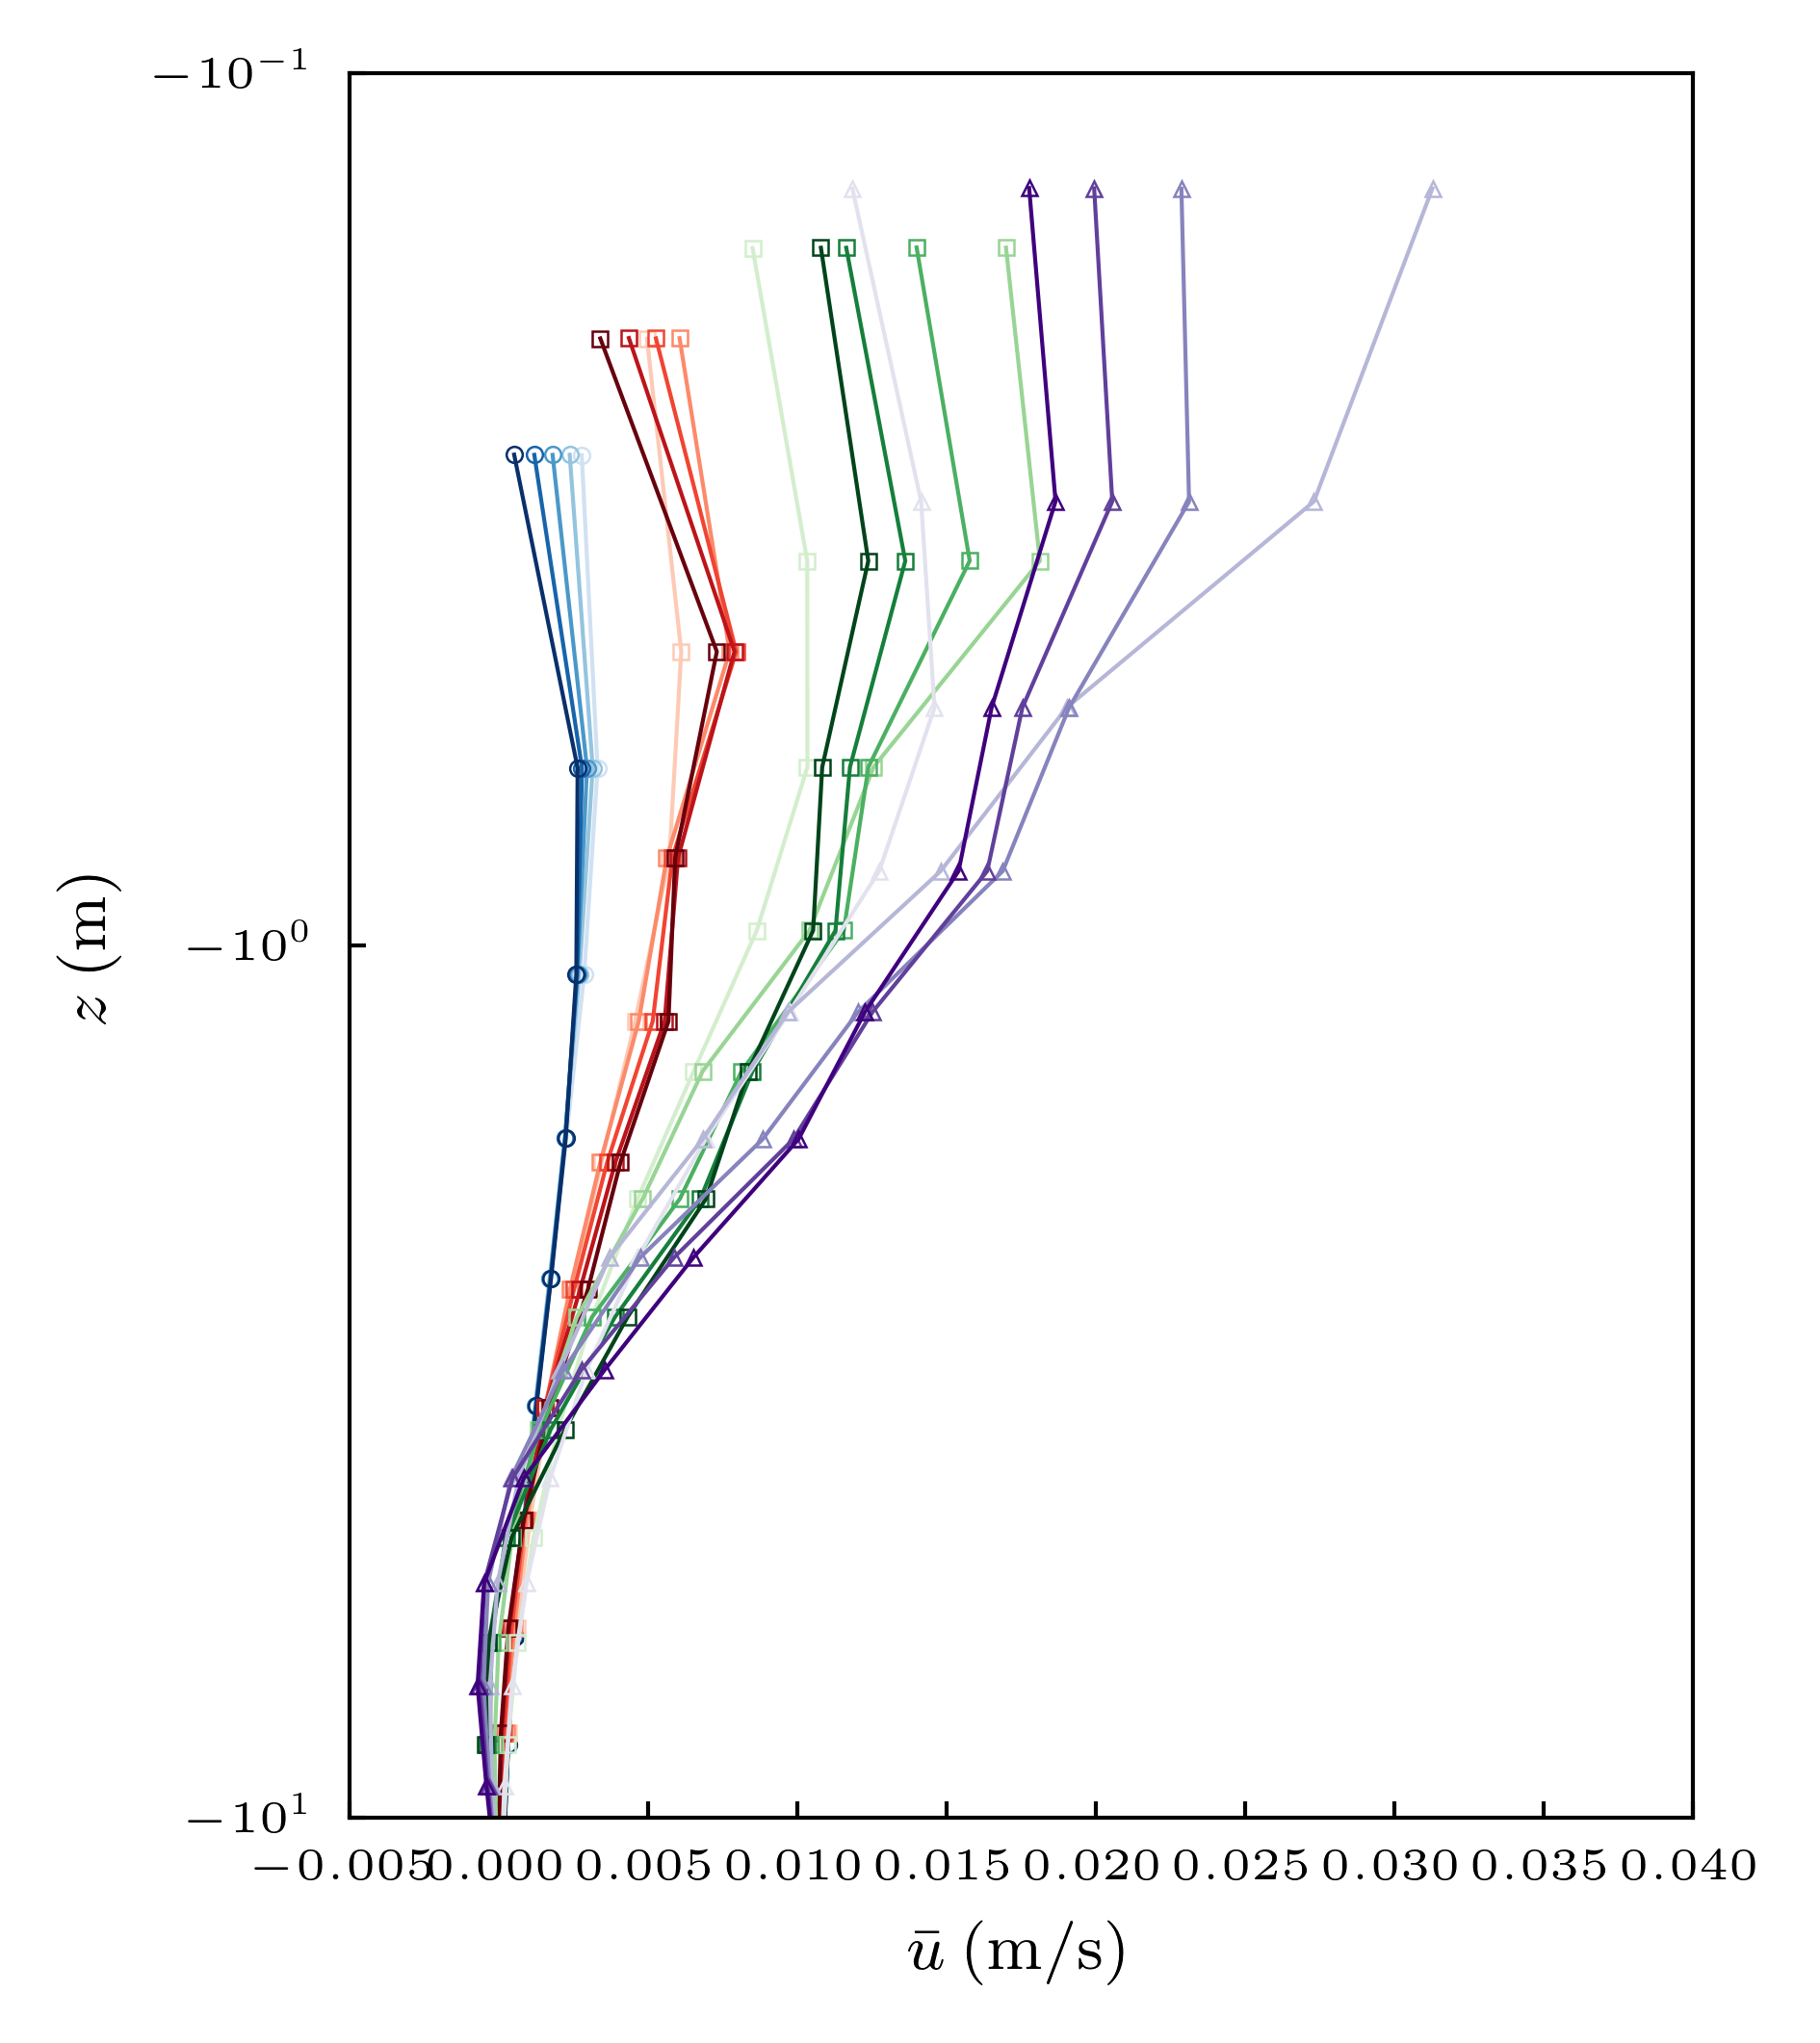

In [41]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
for i in range(0,5):
    case = case_field1
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/case.cp, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs,
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field2
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/case.cp, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-s', c=plt.get_cmap('Reds')((i+1)/5), label='Case4, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field4
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/case.cp, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case.tseries[i])

for i in range(0,5):
    case = case_field6
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/case.cp, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case.tseries[i])

Lenain = pd.read_csv('data_dissipation/Lenain2023_current.txt', names=['x', 'y'])
axes[1].plot(Lenain.x, Lenain.y, '^', c='k', label='D96')

plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-10,-0.1])
plt.xlim([-0.005,0.04])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')
# plt.legend()

(15, 1024, 1024)


Text(0, 0.5, '$z\\:\\mathrm{ (m)}$')

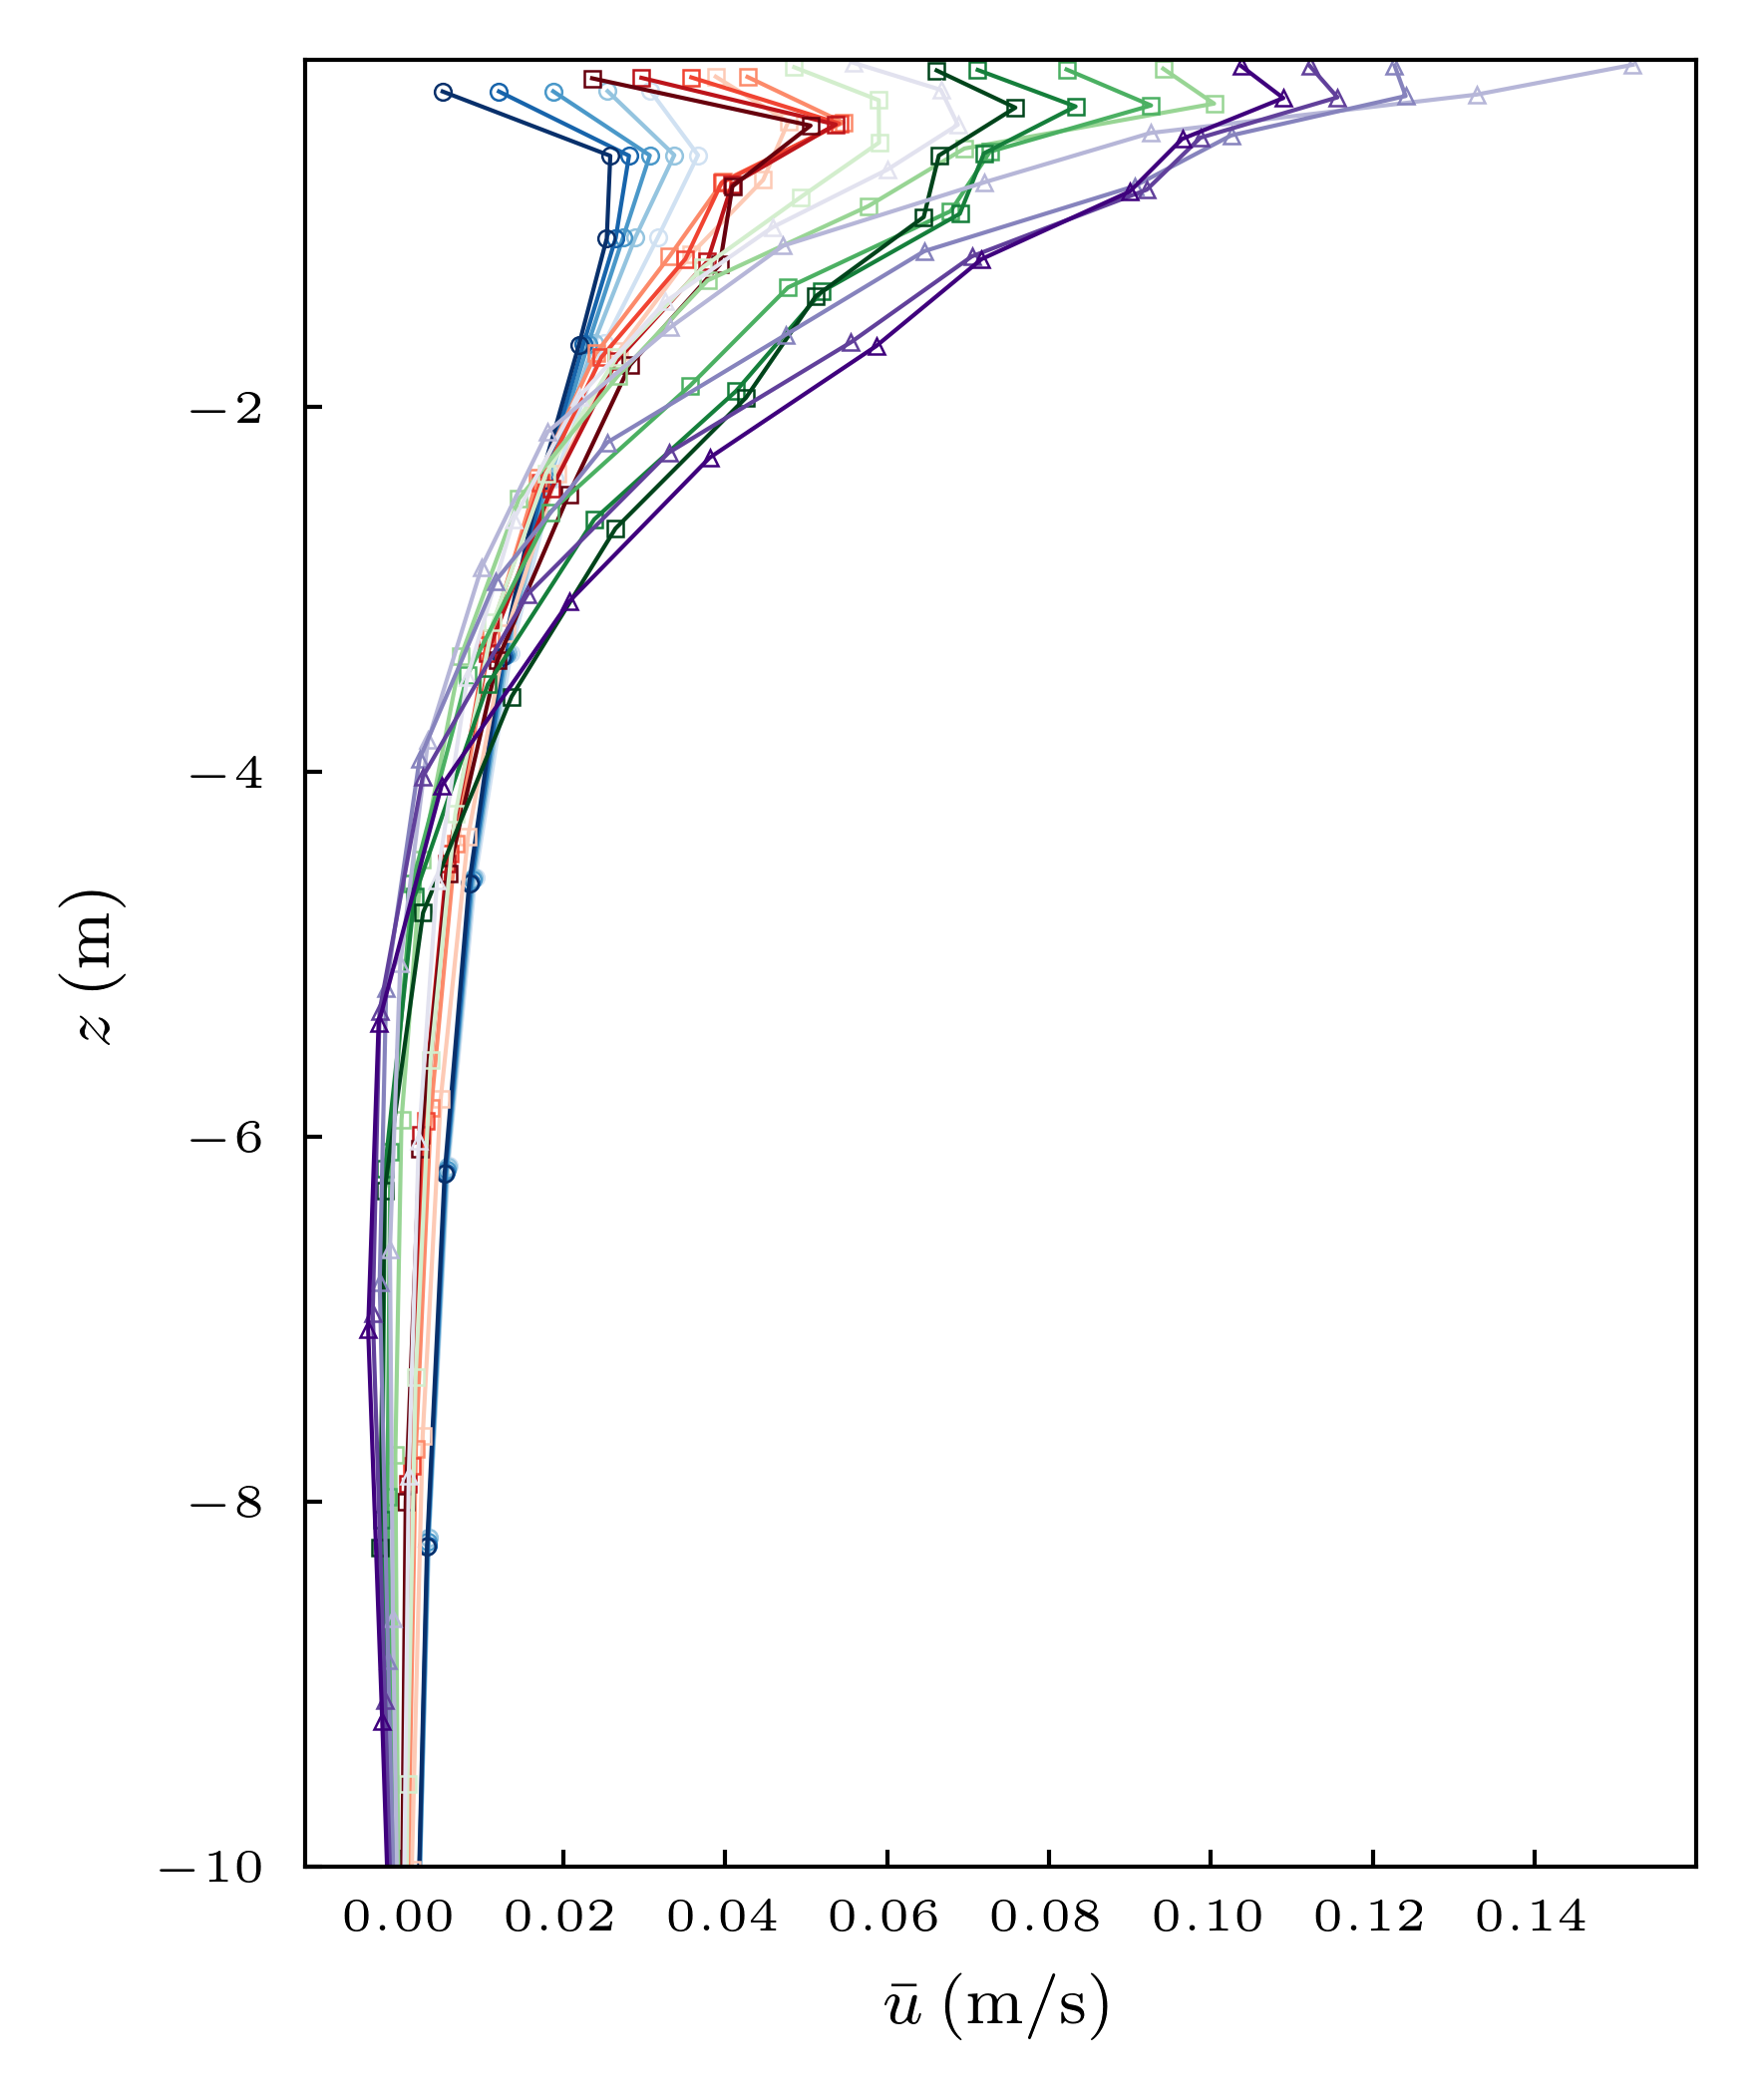

In [25]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
for i in range(0,5):
    case = case_field1
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
    case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
    case.mu_plateau = case.mu[-1]
 
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/(case.cp*case.mu_plateau), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs,
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field2
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
    case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
    case.mu_plateau = case.mu[-1]
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/(case.cp*case.mu_plateau), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-s', c=plt.get_cmap('Reds')((i+1)/5), label='Case4, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field4
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
    case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
    case.mu_plateau = case.mu[-1]
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/(case.cp*case.mu_plateau), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case.tseries[i])

for i in range(0,5):
    case = case_field6
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[i]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=case.L
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
    case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
    case.mu_plateau = case.mu[-1]
    plt.plot(np.average(case.dict['ux_t'][i],axis=(1,2))/(case.cp*case.mu_plateau), np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]/Hs, 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case.tseries[i])

# Lenain = pd.read_csv('data_dissipation/Lenain2023_current.txt', names=['x', 'y'])
# plt.plot(Lenain.x, Lenain.y, '^', c='k', label='D96')

# plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-10,-0.1])
# plt.xlim([-0.005,0.04])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')
# plt.legend()

In [ ]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
for i in range(0,5):
    plt.plot(np.average(case_field1.dict['ux_t'][i],axis=(1,2)), np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case_field1.tseries[i])
for i in range(0,5):
    plt.plot(np.average(case_field4.dict['ux_t'][i],axis=(1,2)), np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case_field4.tseries[i])

for i in range(0,5):
    plt.plot(np.average(case_field6.dict['ux_t'][i],axis=(1,2)), np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case_field6.tseries[i])

Lenain = pd.read_csv('data_dissipation/Lenain2023_current.txt', names=['x', 'y'])
axes[1].plot(Lenain.x, Lenain.y, '^', c='k', label='D96')

plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-100,-0.1])
plt.xlim([-0.05,0.4])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')
# plt.legend()

In [55]:
def spectrum_us(k, F, zarray):   
    """ Given the spectrum and the z coordinate, compute the stokes drift. """  
    
    us = np.zeros(len(zarray))
    dk = np.roll(k, -1) - k # now dk is varying
    dk = np.array(dk); dk[-1]=0    
    g = 9.8
    for i,z in enumerate(zarray):
        us[i] = 2*g**0.5*np.sum(k**1.5*F*dk*np.exp(2*k*z))
        
    return us

(15, 1024, 1024)


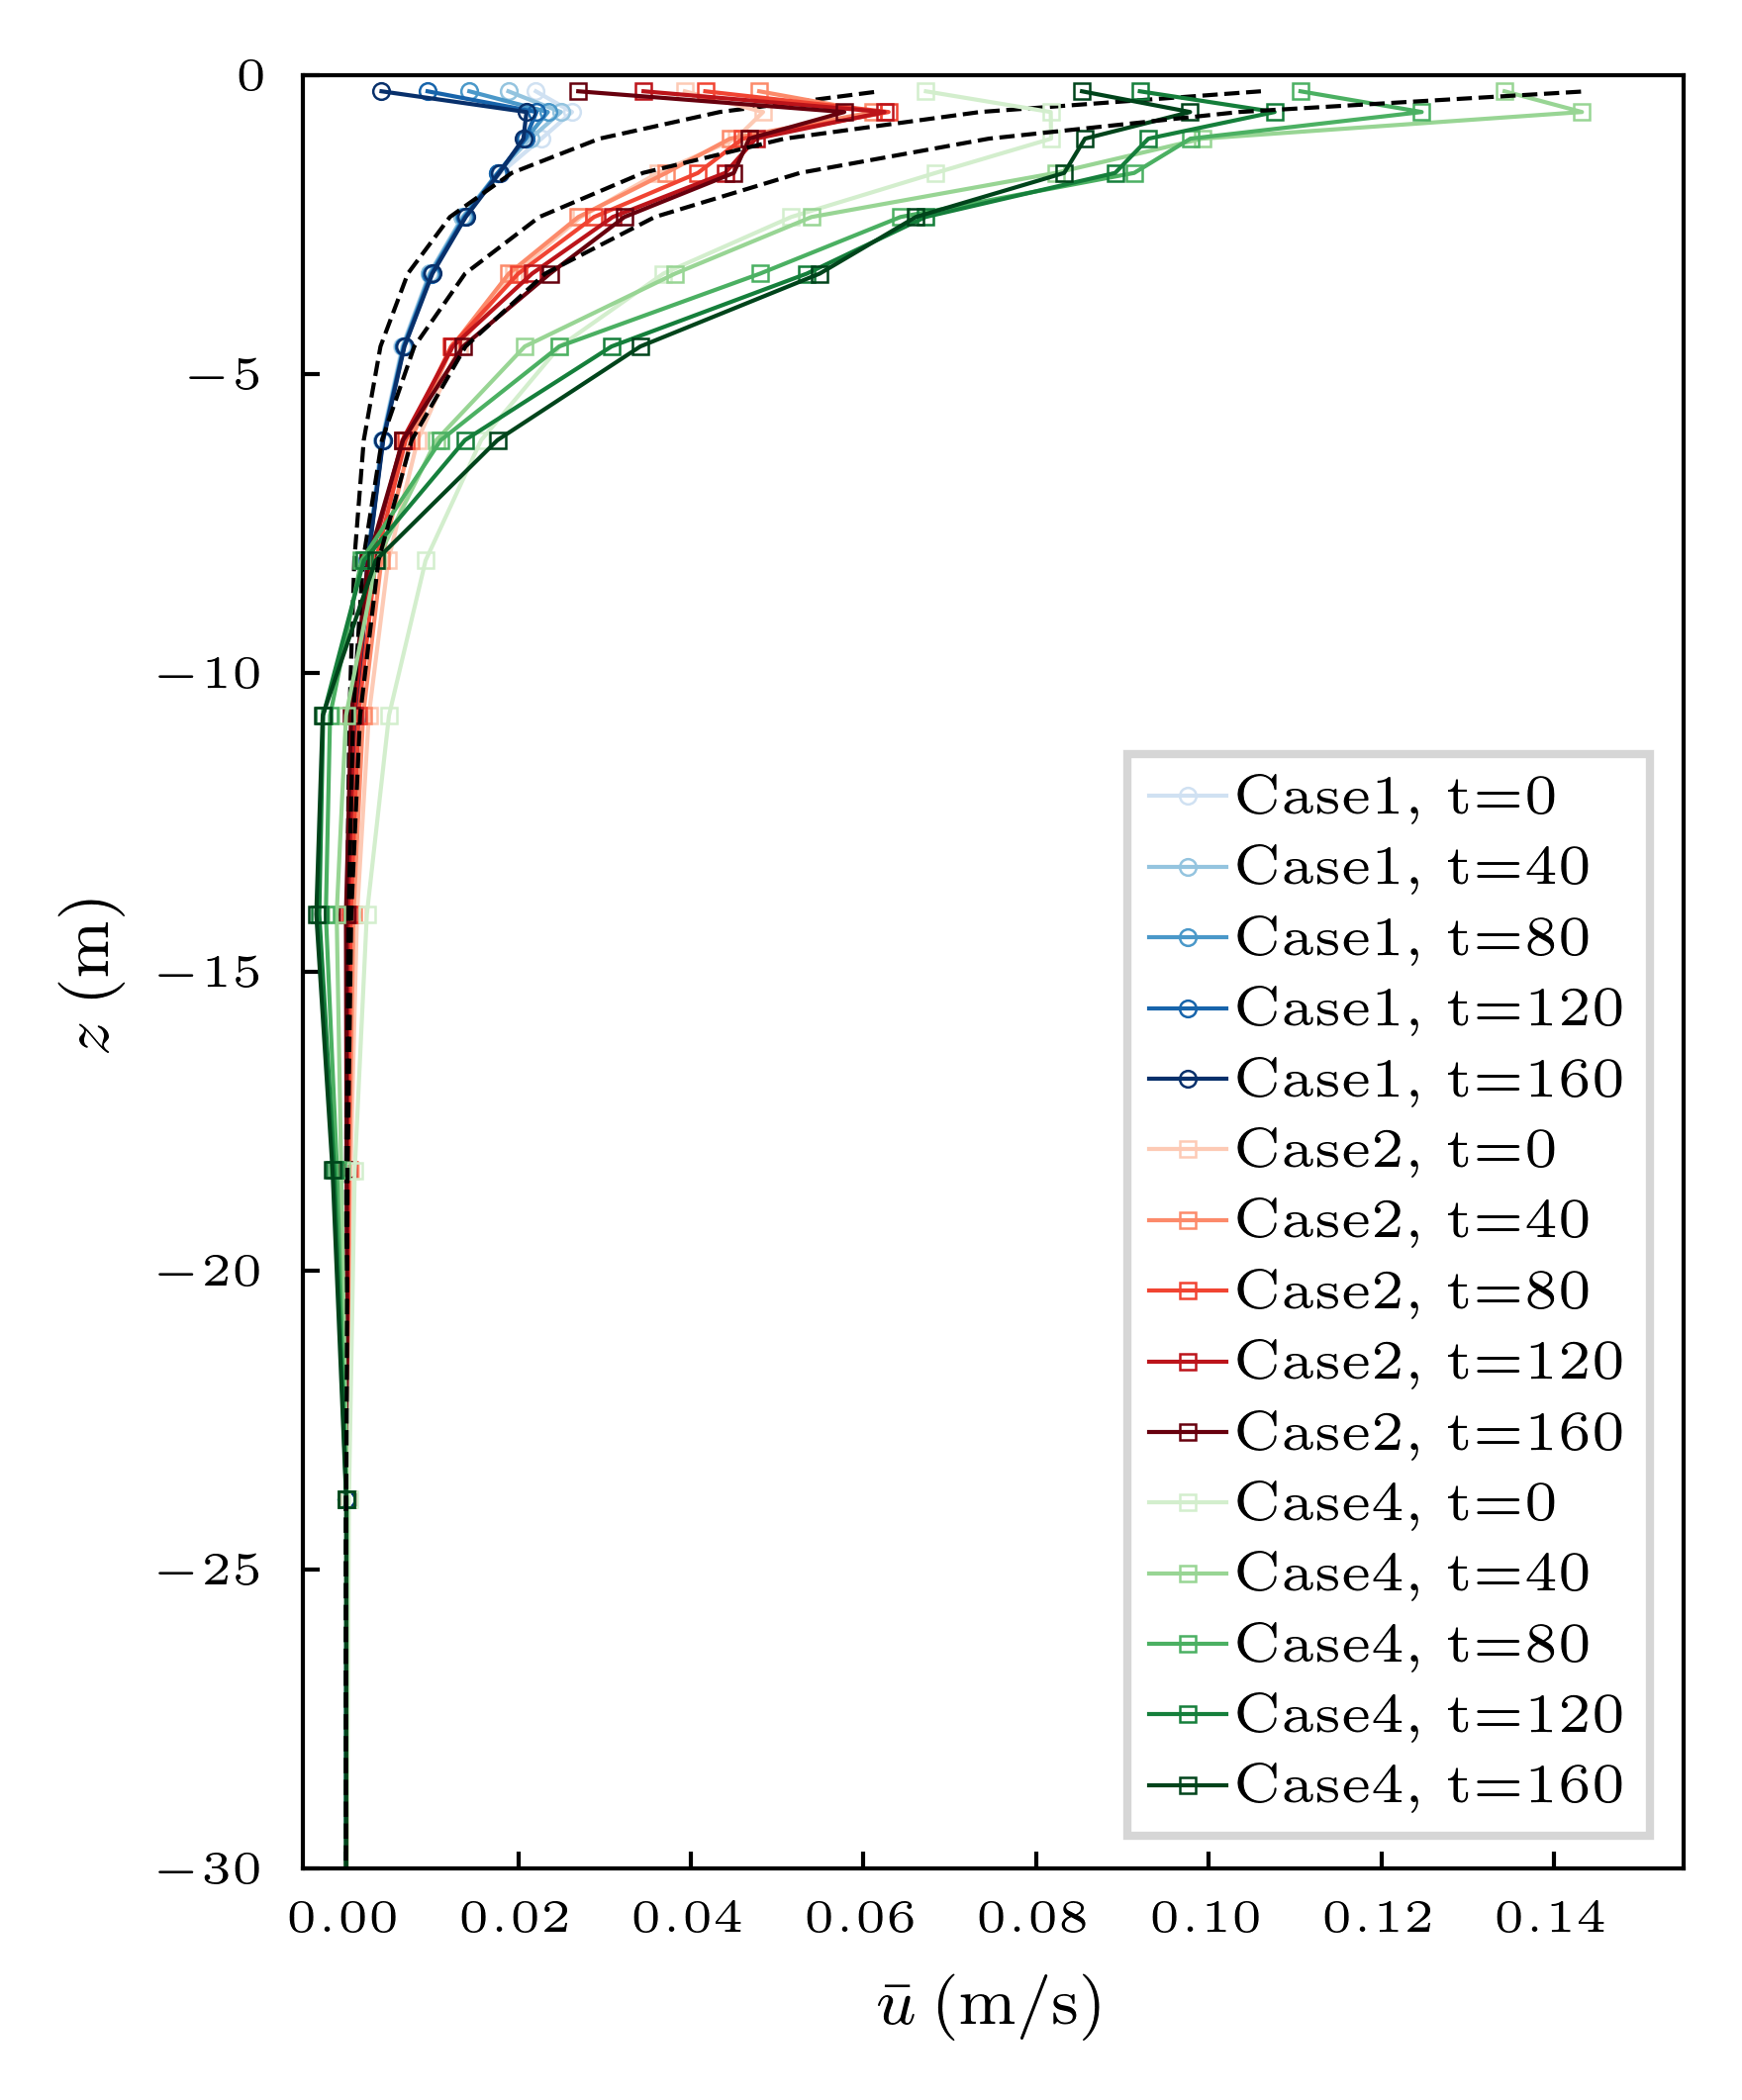

In [64]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])

for i in range(0,5):
    case = case_field1
    plt.plot(np.average(case_field1.dict['ux_t'][i],axis=(1,2)), np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case_field1.tseries[i])

case = case_field1
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')

for i in range(0,5):
    plt.plot(np.average(case_field2.dict['ux_t'][i],axis=(1,2)), np.average(case_field2.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Reds')((i+1)/5), label='Case2, t=%g' %case_field2.tseries[i])
    
case = case_field2
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


for i in range(0,5):
    plt.plot(np.average(case_field4.dict['ux_t'][i],axis=(1,2)), np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case_field4.tseries[i])
    
case = case_field4
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


# for i in range(0,5):
#     plt.plot(np.average(case_field6.dict['ux_t'][i],axis=(1,2)), np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
#              '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case_field6.tseries[i])
    
# case = case_field6
# filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
# eta = np.fromfile(filename, dtype=np.float32)
# N = 1024; L0=case.L
# eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
# Hs = np.std(eta)*4
# case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
# us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
# plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


# plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-30,0])
plt.xlim([-0.005,0.155])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')

plt.legend()

(15, 1024, 1024)


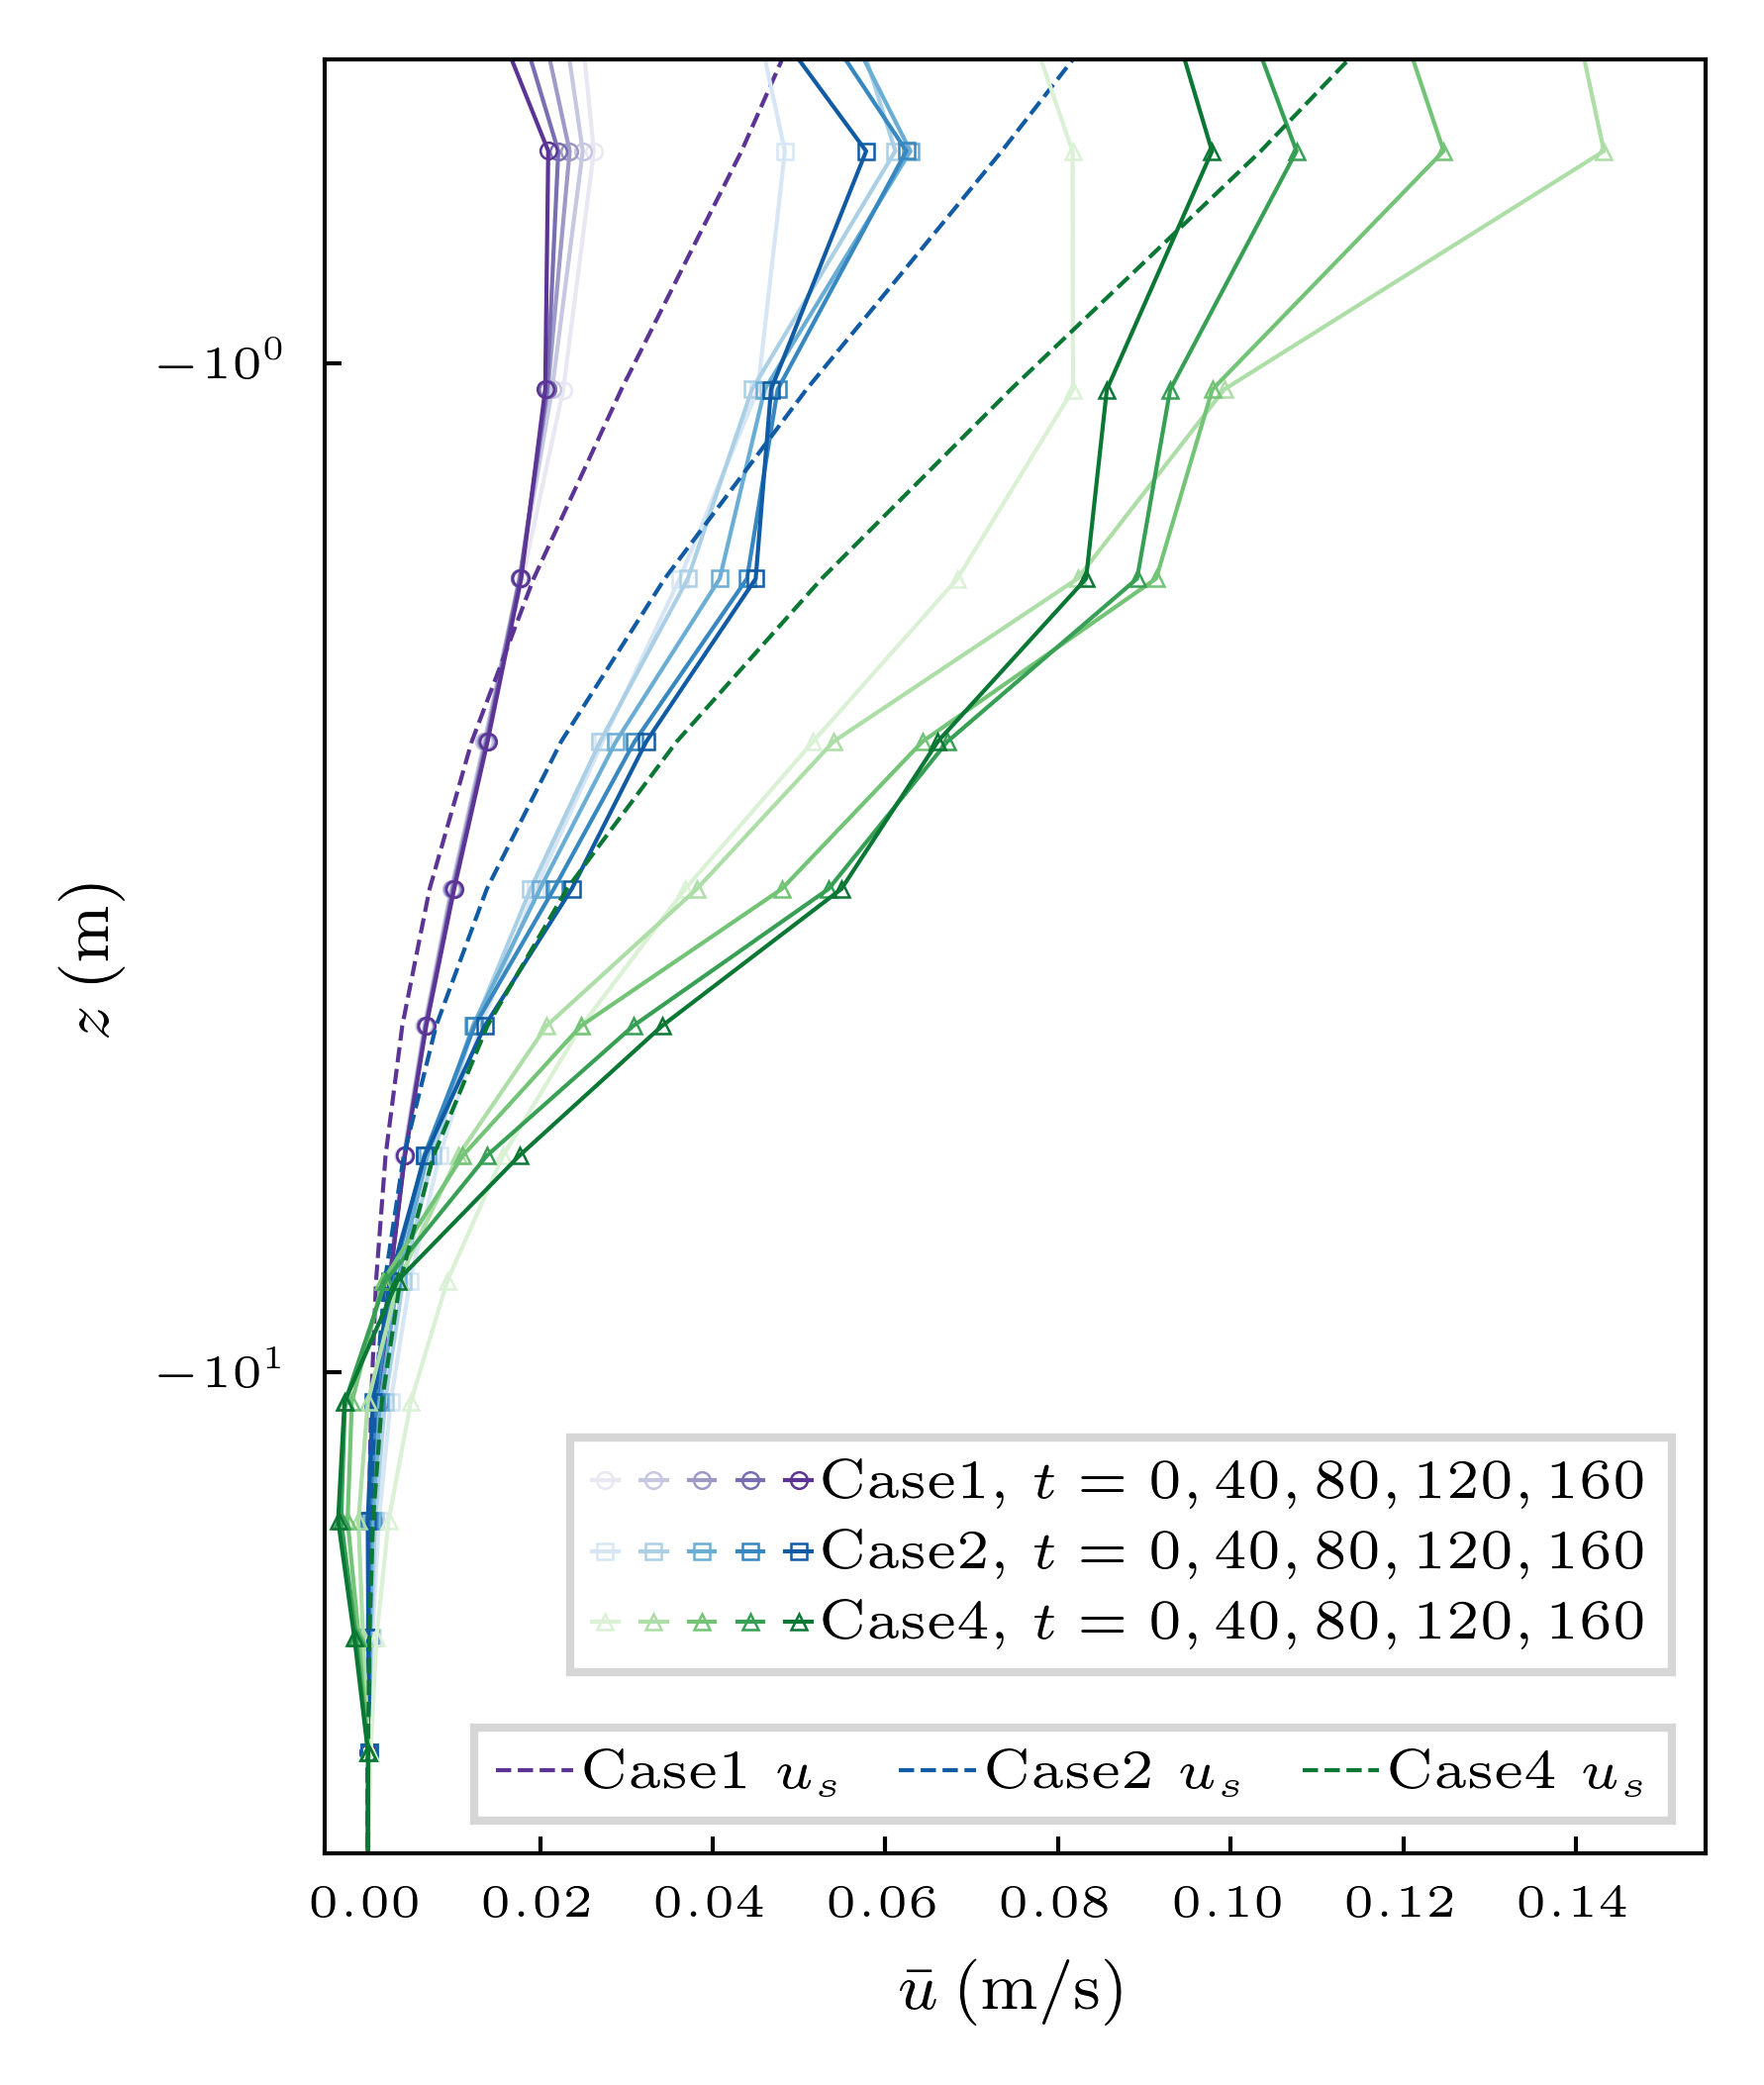

In [102]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])

l1 = []
for i in range(0,5):
    case = case_field1
    l, = plt.plot(np.average(case_field1.dict['ux_t'][i],axis=(1,2)), np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Purples')((i+1)/6))
    l1.append(l)

case = case_field1
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
l1_, =  plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c=plt.get_cmap('Purples')(5/6))

l2 = []
for i in range(0,5):
    l, = plt.plot(np.average(case_field2.dict['ux_t'][i],axis=(1,2)), np.average(case_field2.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Blues')((i+1)/6), label='Case2, t=%g' %case_field2.tseries[i])
    l2.append(l)
    
case = case_field2
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
l2_, = plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c=plt.get_cmap('Blues')(5/6))

l3 = []
for i in range(0,5):
    l, = plt.plot(np.average(case_field4.dict['ux_t'][i],axis=(1,2)), np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-^', c=plt.get_cmap('Greens')((i+1)/6), label='Case4, t=%g' %case_field4.tseries[i])
    l3.append(l)
    
case = case_field4
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
l3_, = plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c=plt.get_cmap('Greens')(5/6))

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
leg1 = plt.legend([(l1[0],l1[1],l1[2],l1[3],l1[4]), (l2[0],l2[1],l2[2],l2[3],l2[4]), (l3[0],l3[1],l3[2],l3[3],l3[4])], 
                  ['Case1, $t=0,40,80,120,160$', 'Case2, $t=0,40,80,120,160$', 'Case4, $t=0,40,80,120,160$'],
                 handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=4, bbox_to_anchor=(1, 0.25))
leg2 = plt.legend([l1_,l2_,l3_], ['Case1 $u_s$', 'Case2 $u_s$', 'Case4 $u_s$'], ncol=3, loc='lower right')
              
# leg3 = legend([p5, p1, p2, p5, p3, p4],
# [r'$D_{etc}$'] + categories + [r'$A_{etc}$'] + categories,
# loc=2, ncol=2)
              
# for i in range(0,5):
#     plt.plot(np.average(case_field6.dict['ux_t'][i],axis=(1,2)), np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
#              '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case_field6.tseries[i])
    
# case = case_field6
# filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
# eta = np.fromfile(filename, dtype=np.float32)
# N = 1024; L0=case.L
# eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
# Hs = np.std(eta)*4
# case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
# us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
# plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-30,-0.5])

# plt.ylim([-20,0])
plt.xlim([-0.005,0.155])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')

plt.gca().add_artist(leg1)

(15, 1024, 1024)


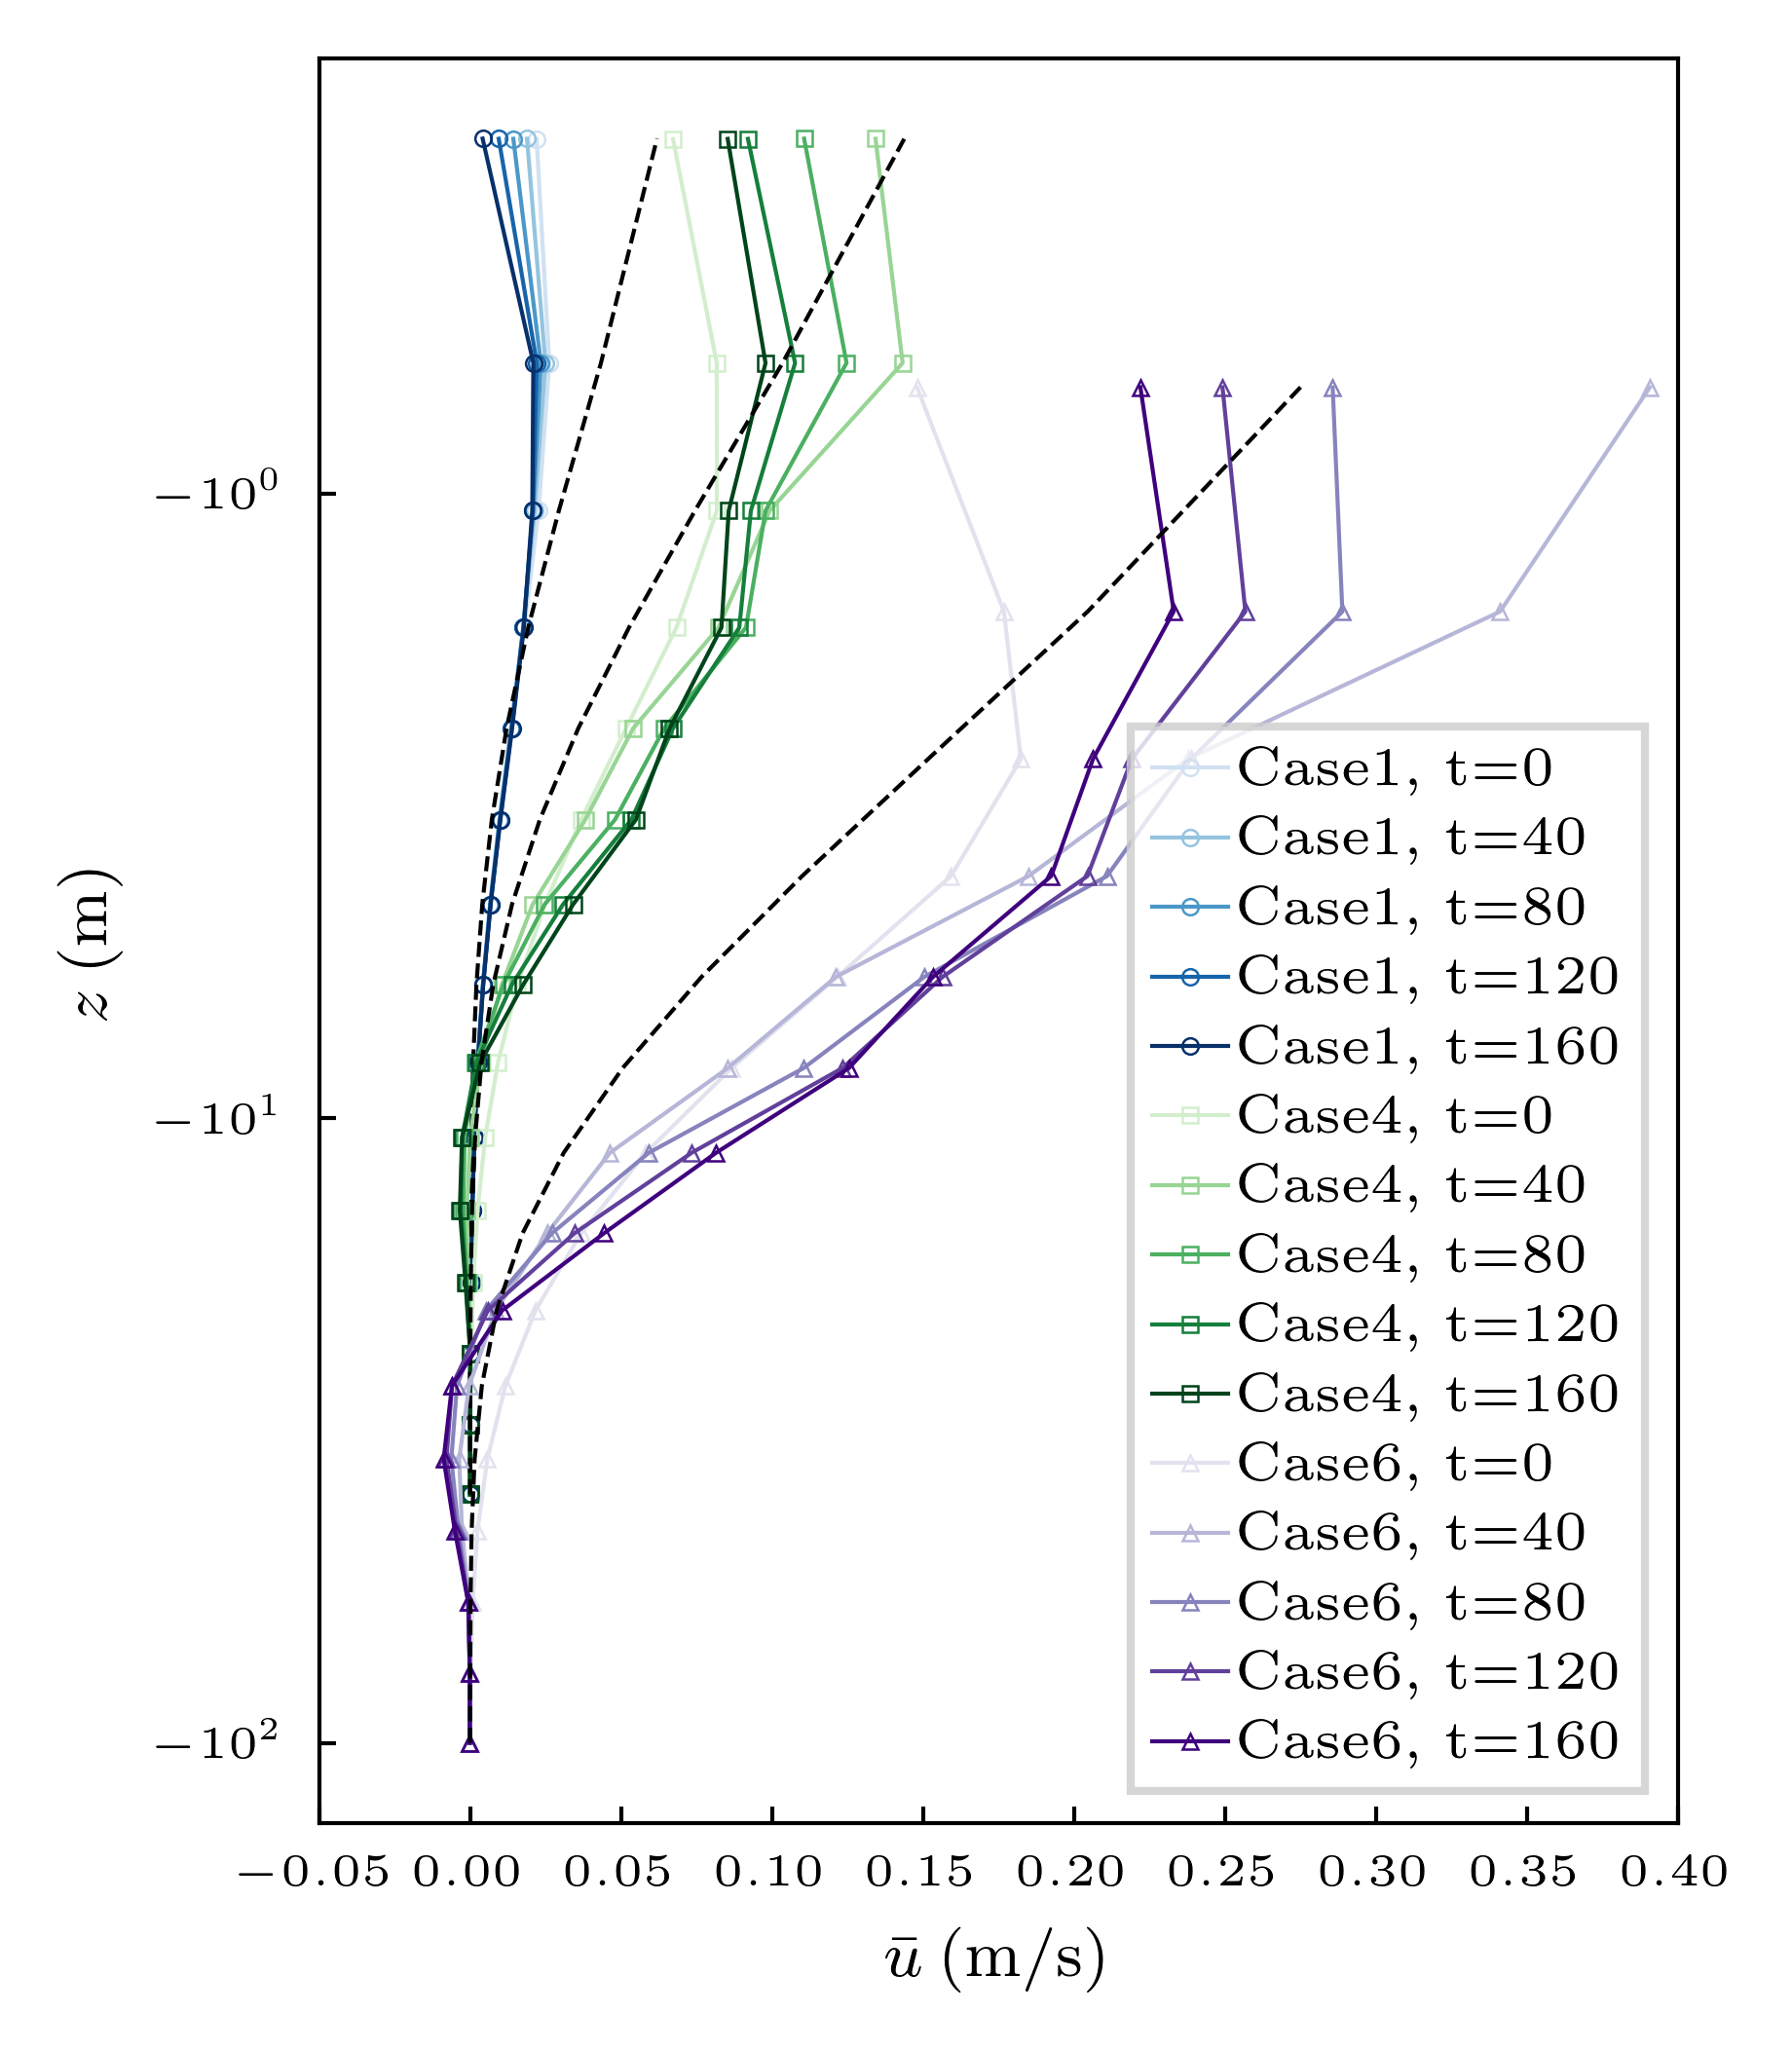

In [59]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])

for i in range(0,5):
    case = case_field1
    plt.plot(np.average(case_field1.dict['ux_t'][i],axis=(1,2)), np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case_field1.tseries[i])

case = case_field1
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')

    
for i in range(0,5):
    plt.plot(np.average(case_field4.dict['ux_t'][i],axis=(1,2)), np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case_field4.tseries[i])
    
case = case_field4
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


for i in range(0,5):
    plt.plot(np.average(case_field6.dict['ux_t'][i],axis=(1,2)), np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case_field6.tseries[i])
    
case = case_field6
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=case.L
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=L0, N=N)
us = spectrum_us(case.kmod, case.Fkmod, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1])
plt.plot(us, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1], '--', c='k')


plt.yscale('symlog', linthresh=1e-2)
# plt.ylim([-60,0])
plt.xlim([-0.05,0.4])
plt.xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')

plt.legend()

(15, 1024, 1024)


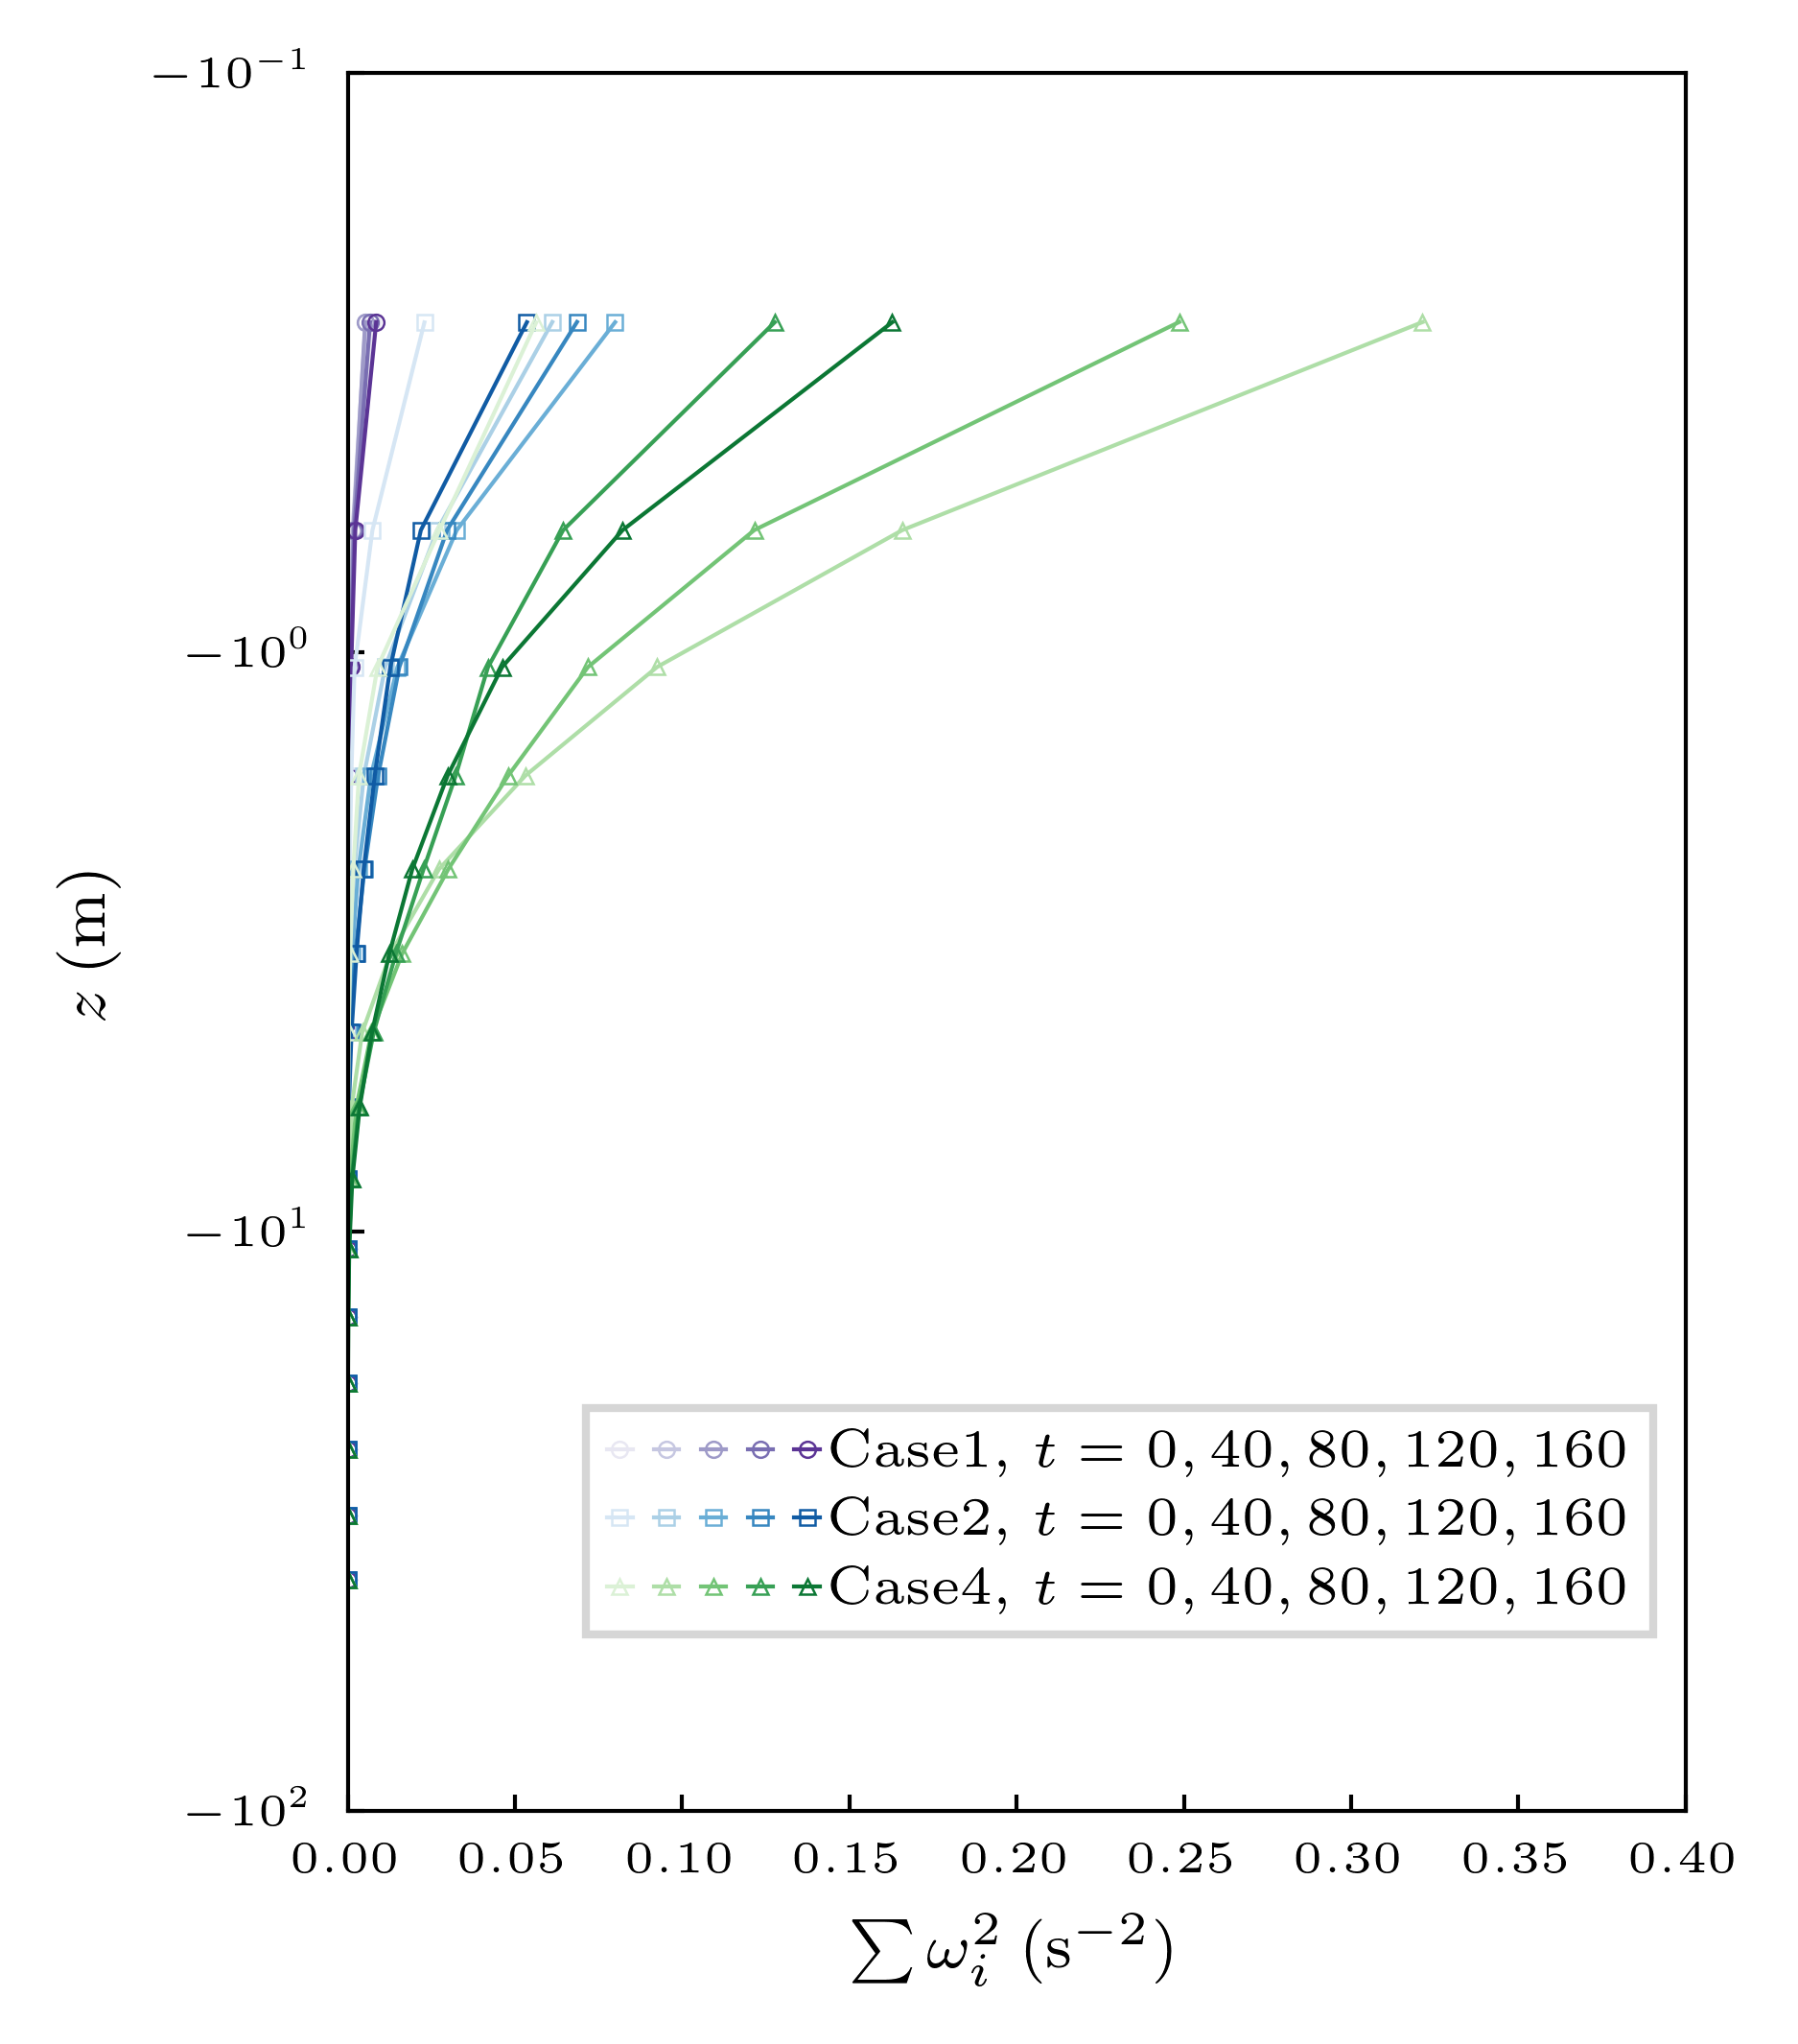

In [106]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])

l1 = []
for i in range(0,5):
    case = case_field1
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    l, = plt.plot(omega2, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Purples')((i+1)/6))
    l1.append(l)

l2 = []
for i in range(0,5):
    case = case_field2
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    l, = plt.plot(omega2, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-s', c=plt.get_cmap('Blues')((i+1)/6))
    l2.append(l)
    
l3 = []
for i in range(0,5):
    case = case_field4
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    l, = plt.plot(omega2, np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-^', c=plt.get_cmap('Greens')((i+1)/6))
    l3.append(l)

plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-100,-0.1])
plt.xlim([0,0.4])
plt.xlabel(r'$\sum \omega_i^2\:\mathrm{ (s^{-2})}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
leg1 = plt.legend([(l1[0],l1[1],l1[2],l1[3],l1[4]), (l2[0],l2[1],l2[2],l2[3],l2[4]), (l3[0],l3[1],l3[2],l3[3],l3[4])], 
                  ['Case1, $t=0,40,80,120,160$', 'Case2, $t=0,40,80,120,160$', 'Case4, $t=0,40,80,120,160$'],
                 handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=4, bbox_to_anchor=(1, 0.25))
# leg2 = plt.legend([l1_,l2_,l3_], ['Case1 $u_s$', 'Case2 $u_s$', 'Case4 $u_s$'], ncol=3, loc='lower right')



(15, 1024, 1024)


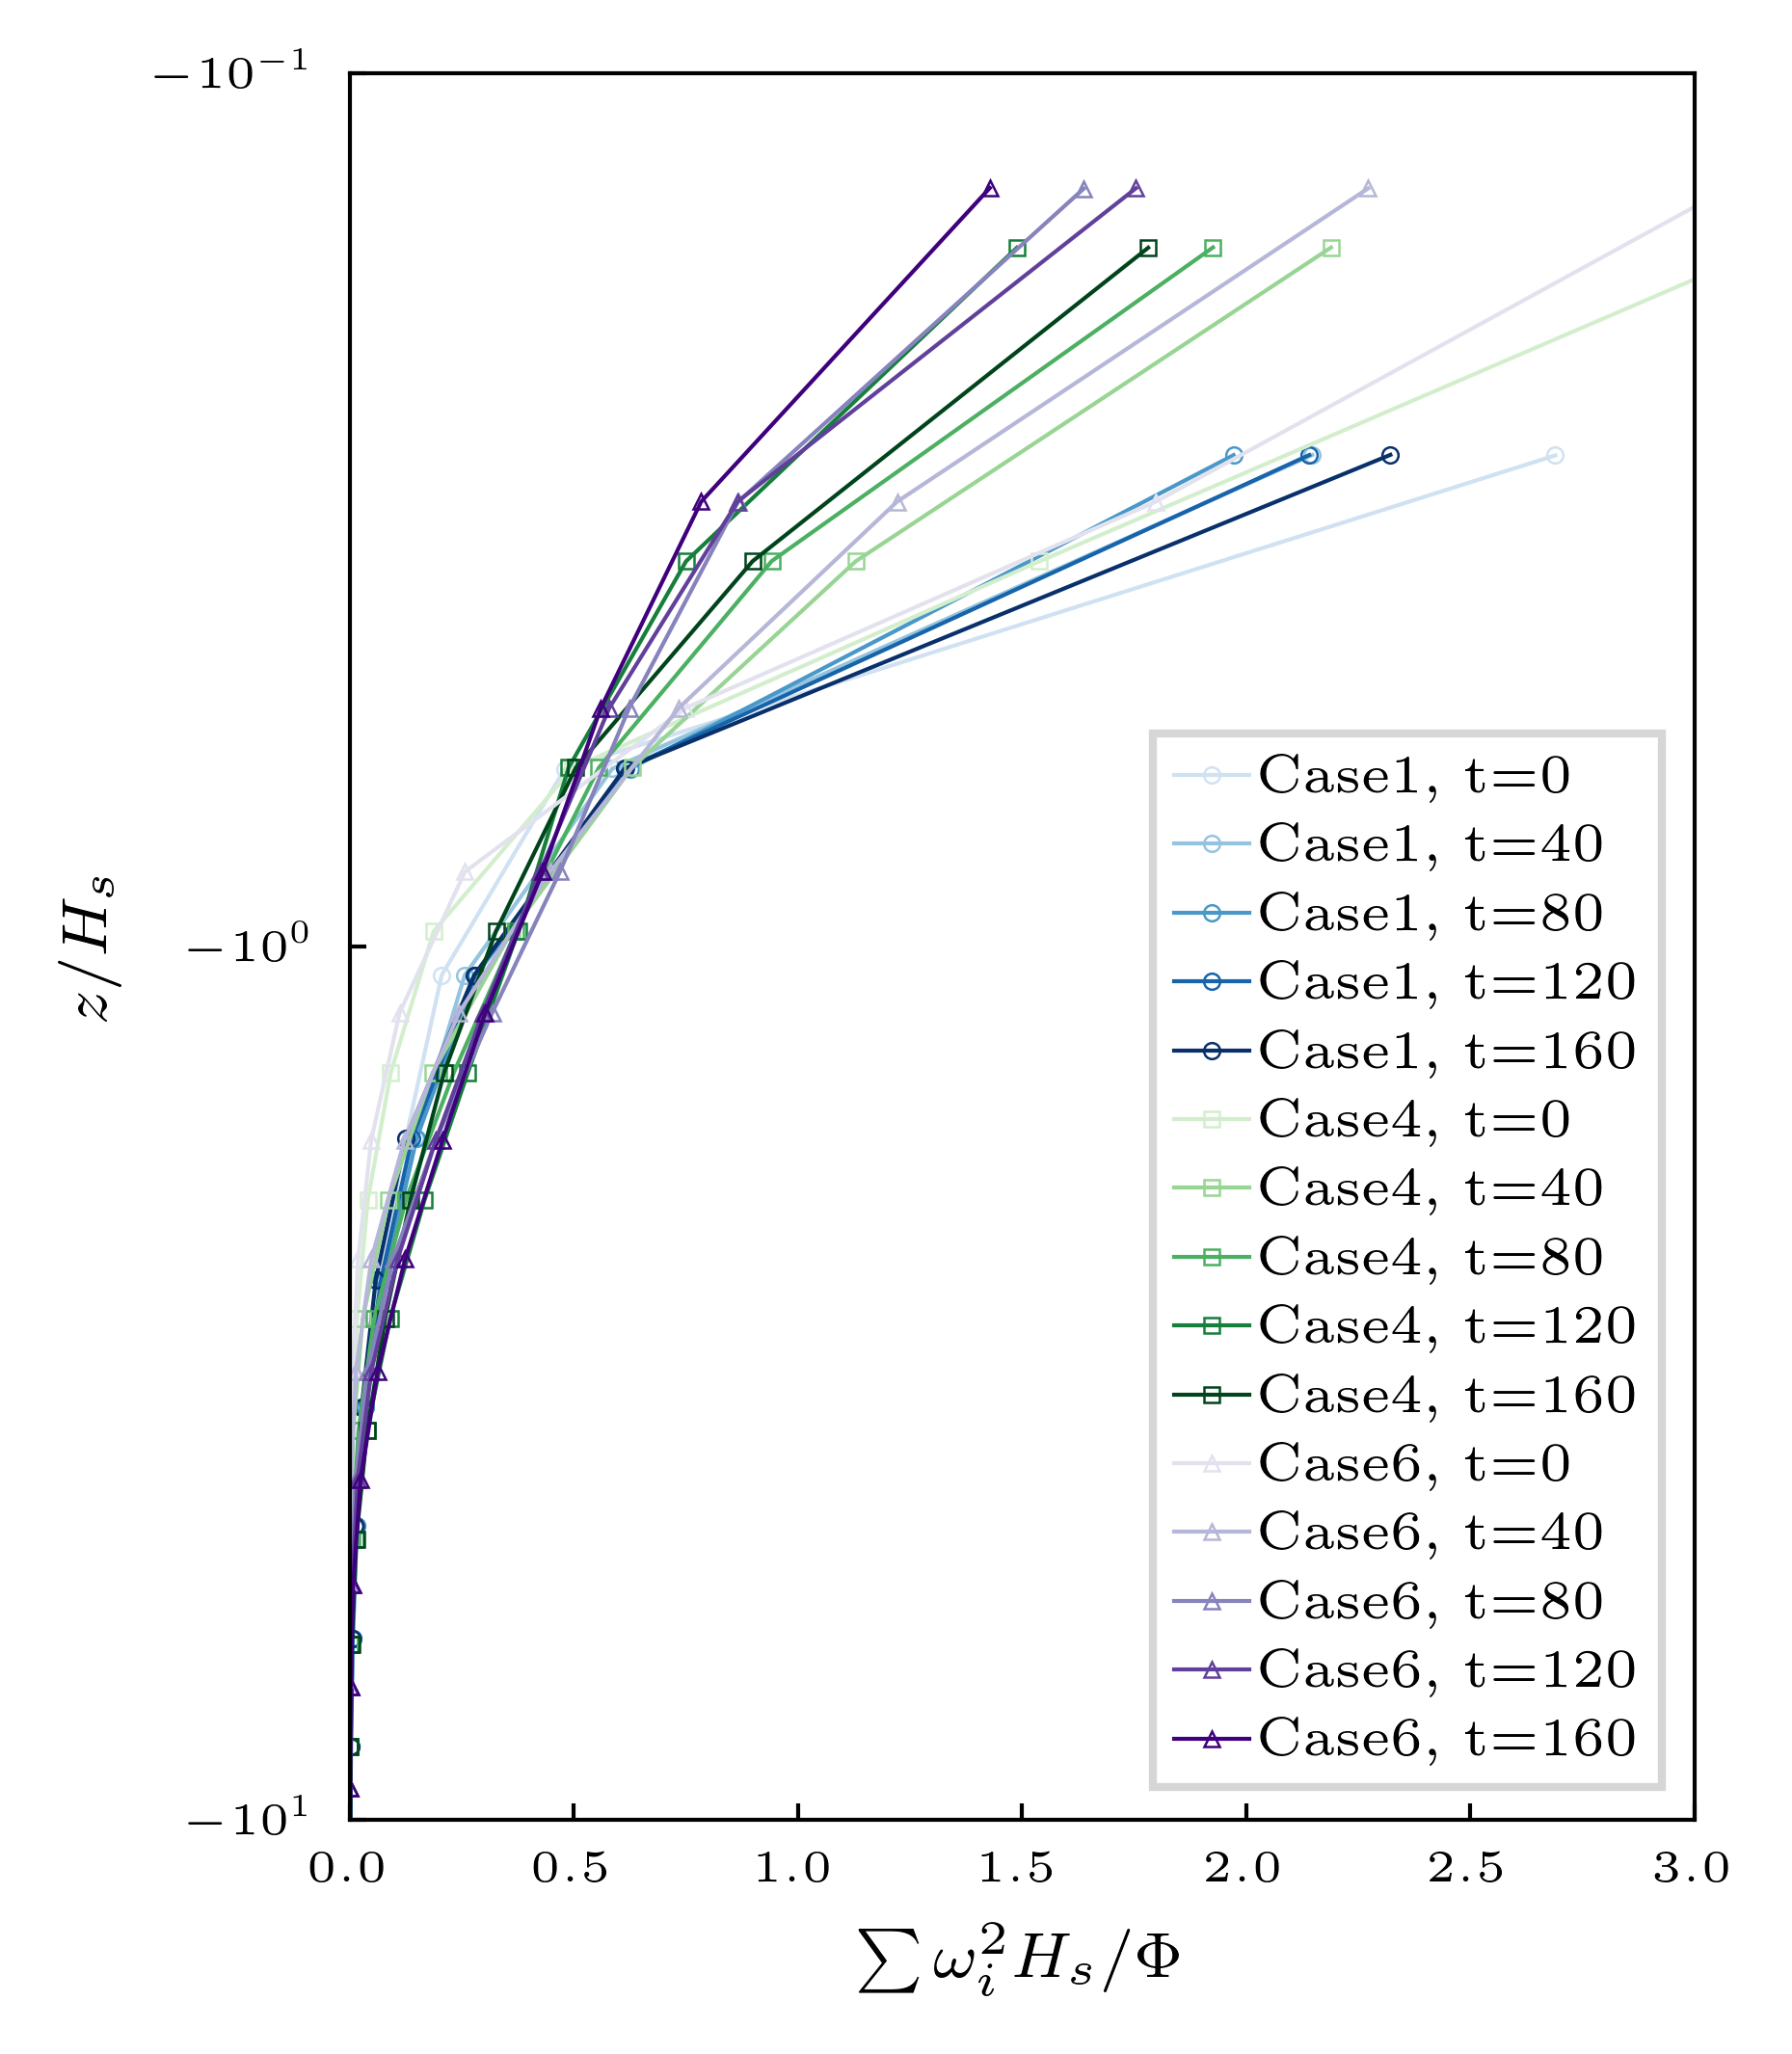

In [192]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
N = 1024
    
for i in range(0,5):
    case = case_field1
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    z = np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]
    phi = np.trapz(omega2, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(omega2*Hs/phi, z/Hs,
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field4
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    z = np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]
    phi = np.trapz(omega2, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(omega2*Hs/phi, z/Hs,
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case.tseries[i])
    
for i in range(0,5):
    case = case_field6
    omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
    z = np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]
    phi = np.trapz(omega2, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    plt.plot(omega2*Hs/phi, z/Hs,
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case.tseries[i])

plt.yscale('symlog', linthresh=1e-2)
plt.ylim([-10,-0.1])
plt.xlim([0,3])
plt.xlabel(r'$\sum \omega_i^2 H_s/\Phi$'); plt.ylabel(r'$z/H_s$')
plt.legend()


In [193]:
for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
    case.phi_t = []; case.Hs_t = []
    for i in range(0,len(case.tseries)):
        omega2 = np.average(case.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case.dict['omegaz_t'][i]**2,axis=(1,2))
        z = np.average(case.dict['z_mesh_t'][i],axis=(1,2))[:-1]
        phi = np.trapz(omega2, x=z)
        filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
        eta = np.fromfile(filename, dtype=np.float32)
        eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
        Hs = np.std(eta)*4
        case.phi_t.append(phi); case.Hs_t.append(Hs)

In [1]:
fig = plt.figure(figsize=[3,2])
for case in (case_field1, case_field2, case_field3, case_field4, case_field5, case_field6):
    case.omegap = (case.kp*9.8)**0.5
    plt.plot(np.array(case.tseries)*case.omegap, case.phi_t, '-o', c=case.cc)
    print(case.phi_t)
plt.xlabel('$\omega_p t$')
plt.ylabel('$\Phi$'); plt.ylim([-0.05,0.85])

NameError: name 'plt' is not defined

(15, 1024, 1024)


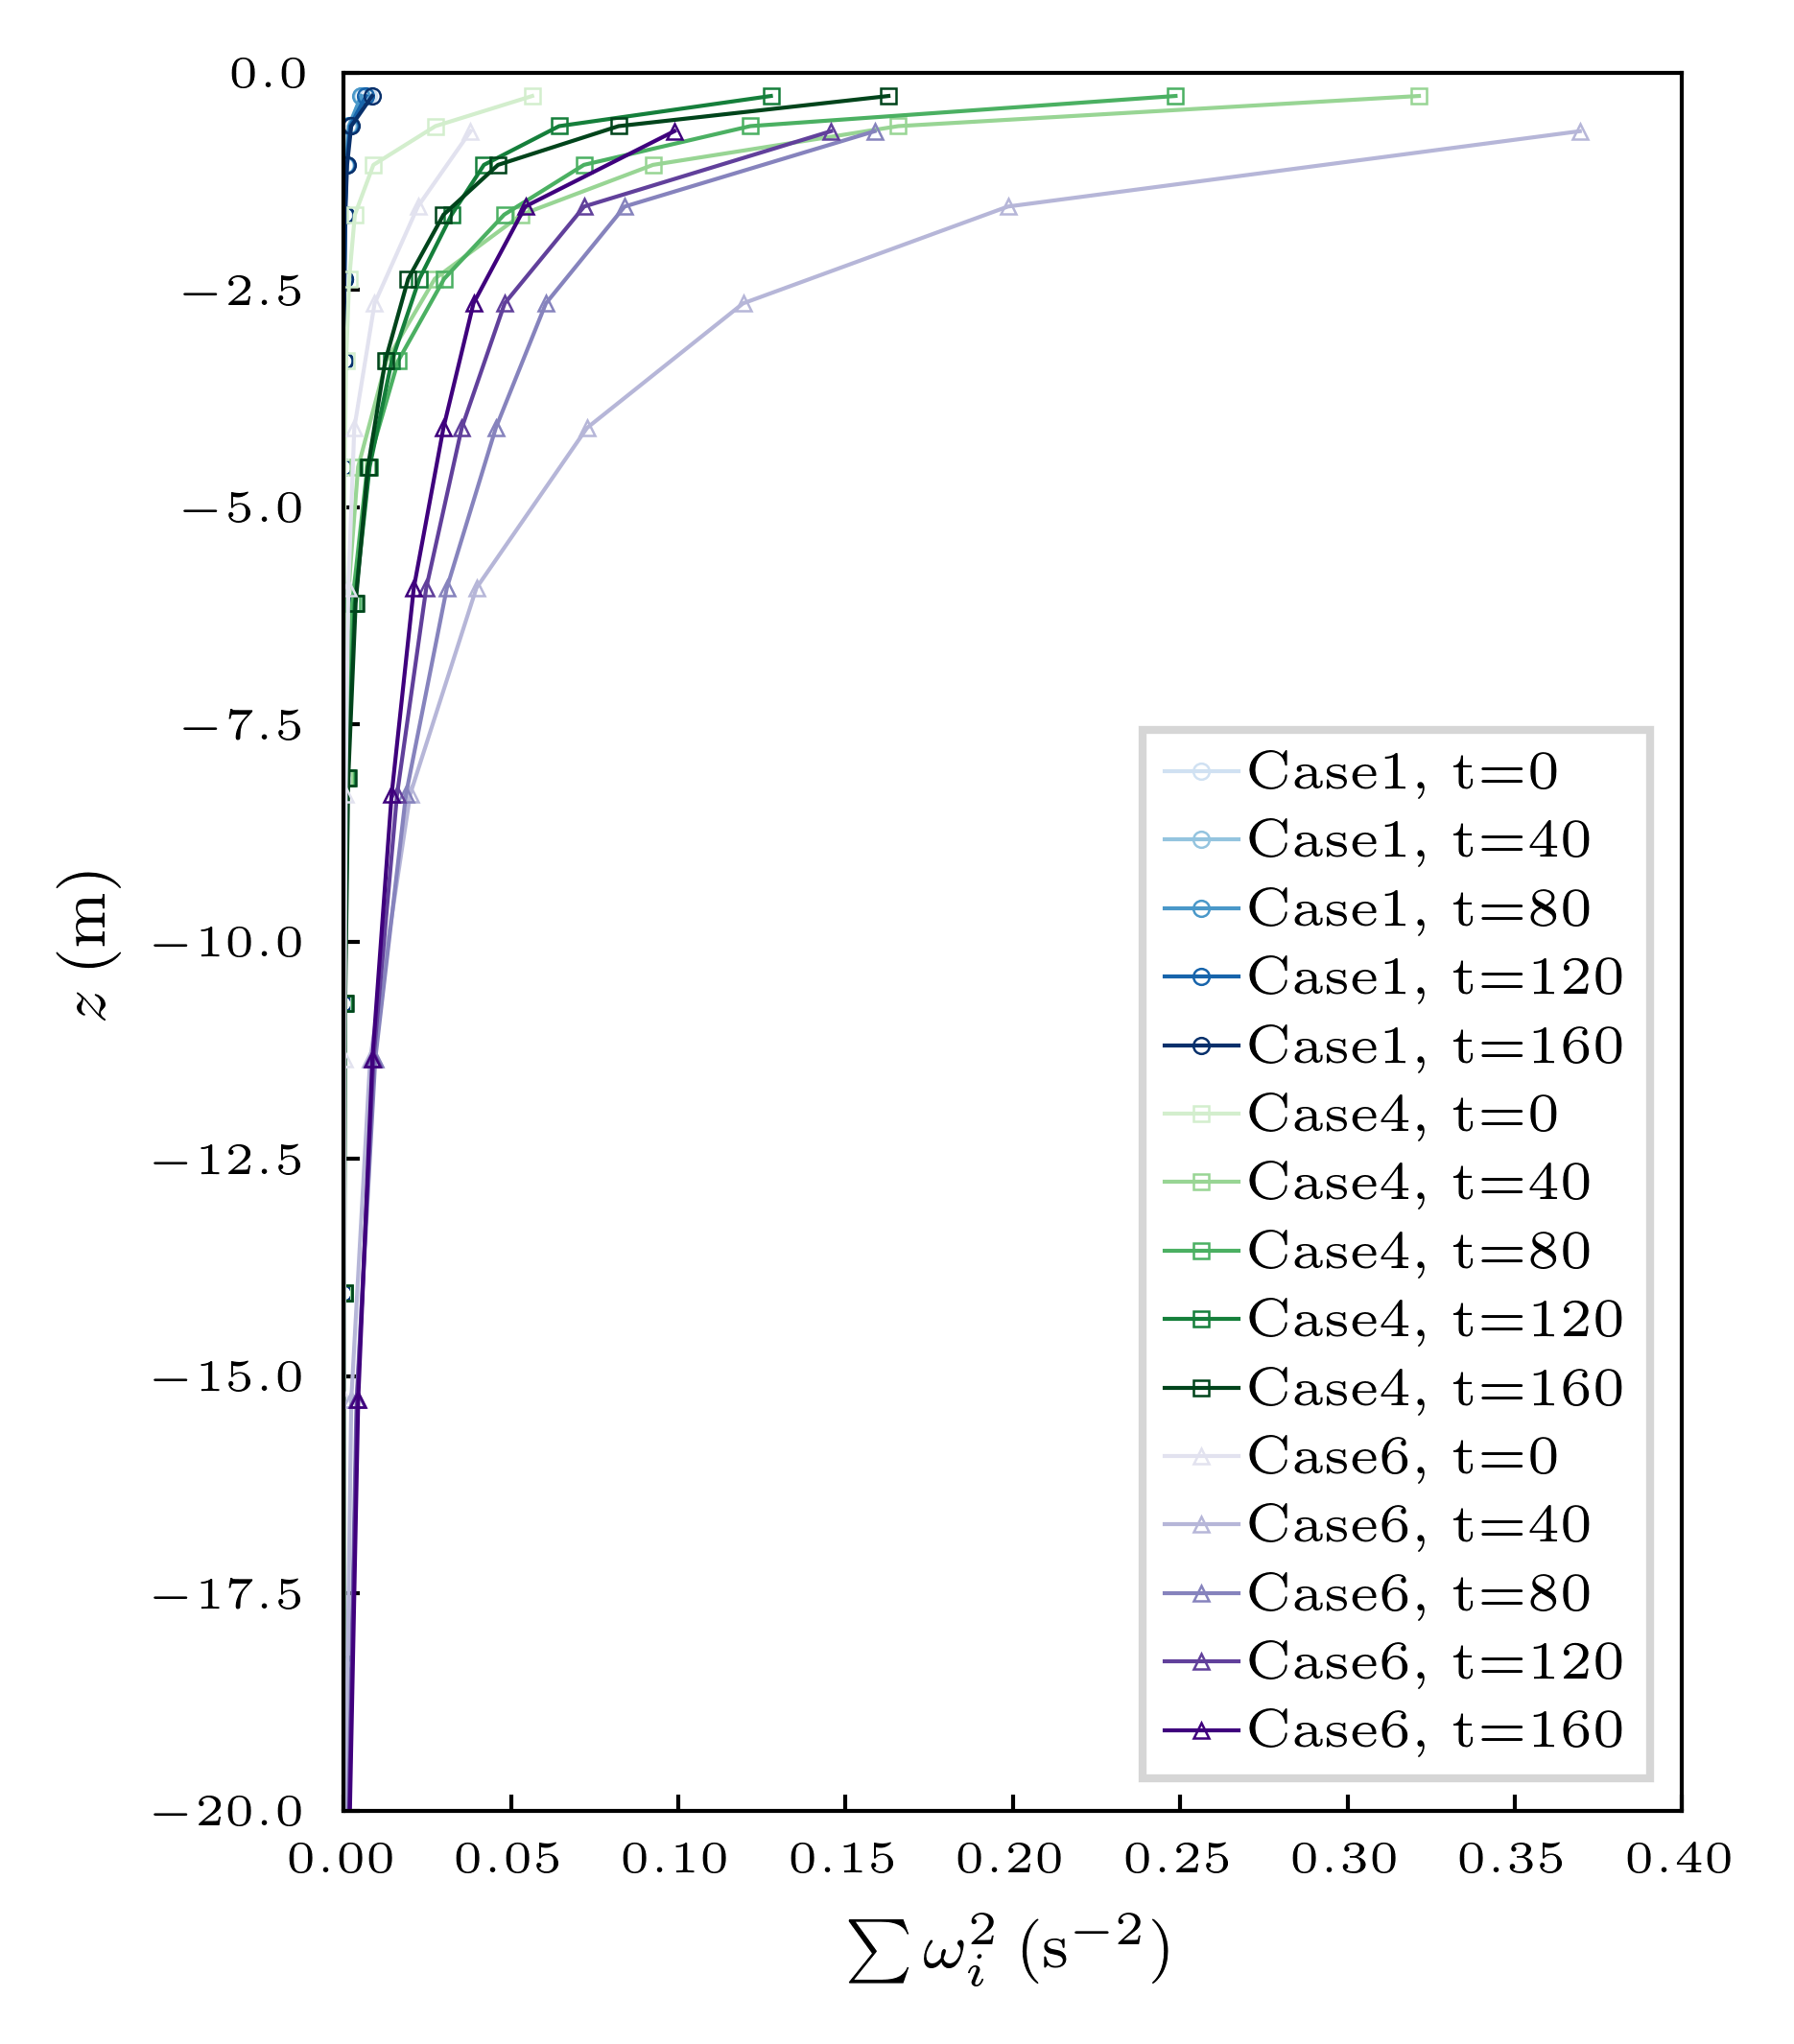

In [168]:
print(case_field1.dict['ux_t'][0].shape)
fig = plt.figure(figsize=[3,4])
for i in range(0,5):
    omega2 = np.average(case_field1.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case_field1.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case_field1.dict['omegaz_t'][i]**2,axis=(1,2))
    plt.plot(omega2, np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case_field1.tseries[i])
for i in range(0,5):
    omega2 = np.average(case_field4.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case_field4.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case_field4.dict['omegaz_t'][i]**2,axis=(1,2))
    plt.plot(omega2, np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case_field4.tseries[i])
for i in range(0,5):
    omega2 = np.average(case_field6.dict['omegax_t'][i]**2,axis=(1,2)) + np.average(case_field6.dict['omegay_t'][i]**2,axis=(1,2)) + np.average(case_field6.dict['omegaz_t'][i]**2,axis=(1,2))
    plt.plot(omega2, np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-^', c=plt.get_cmap('Purples')((i+1)/5), label='Case6, t=%g' %case_field6.tseries[i])


plt.ylim([-20,0])
plt.xlim([0,0.4])
plt.xlabel(r'$\sum \omega_i^2\:\mathrm{ (s^{-2})}$'); plt.ylabel(r'$z\:\mathrm{ (m)}$')

plt.legend()

In [ ]:
print(case_field1.dict['ux_t'][0].shape)
for i in range(0,5):
    plt.plot(np.average(case_field1.dict['ux_t'][i],axis=(1,2)), np.average(case_field1.dict['z_mesh_t'][i],axis=(1,2))[:-1],
             '-o', c=plt.get_cmap('Blues')((i+1)/5), label='Case1, t=%g' %case_field1.tseries[i])
for i in range(0,5):
    plt.plot(np.average(case_field4.dict['ux_t'][i],axis=(1,2)), np.average(case_field4.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Greens')((i+1)/5), label='Case4, t=%g' %case_field4.tseries[i])

for i in range(0,5):
    plt.plot(np.average(case_field6.dict['ux_t'][i],axis=(1,2)), np.average(case_field6.dict['z_mesh_t'][i],axis=(1,2))[:-1], 
             '-s', c=plt.get_cmap('Purples')((i+1)/5), label='Case4, t=%g' %case_field6.tseries[i])

plt.yscale('symlog', linthresh=1e-2)
plt.legend()

In [ ]:
print(case_field1.dict['ux_t'][0].shape)
plt.plot(np.average(case_field1.dict['ux_t'][0],axis=(1,2)), 'o')
plt.plot(np.average(case_field1.dict['ux_t'][1],axis=(1,2)), 'o')
plt.plot(np.average(case_field1.dict['ux_t'][2],axis=(1,2)), 'o')
plt.plot(np.average(case_field1.dict['ux_t'][3],axis=(1,2)), 'o')

Phi=0.0127249, kp*Hs=0.2461, z_top/Hs=-0.172279
Phi=0.0799566, kp*Hs=0.238598, z_top/Hs=-0.177466
Phi=0.0990816, kp*Hs=0.232755, z_top/Hs=-0.181926
Phi=0.0868916, kp*Hs=0.228524, z_top/Hs=-0.185364
Phi=0.0612781, kp*Hs=0.226751, z_top/Hs=-0.186919
Phi=0.0303059, kp*Hs=0.30141, z_top/Hs=-0.140708
Phi=0.249707, kp*Hs=0.284698, z_top/Hs=-0.148756
Phi=0.219593, kp*Hs=0.276493, z_top/Hs=-0.153119
Phi=0.145912, kp*Hs=0.272296, z_top/Hs=-0.155604
Phi=0.155461, kp*Hs=0.267217, z_top/Hs=-0.158569


(0.001, 2)

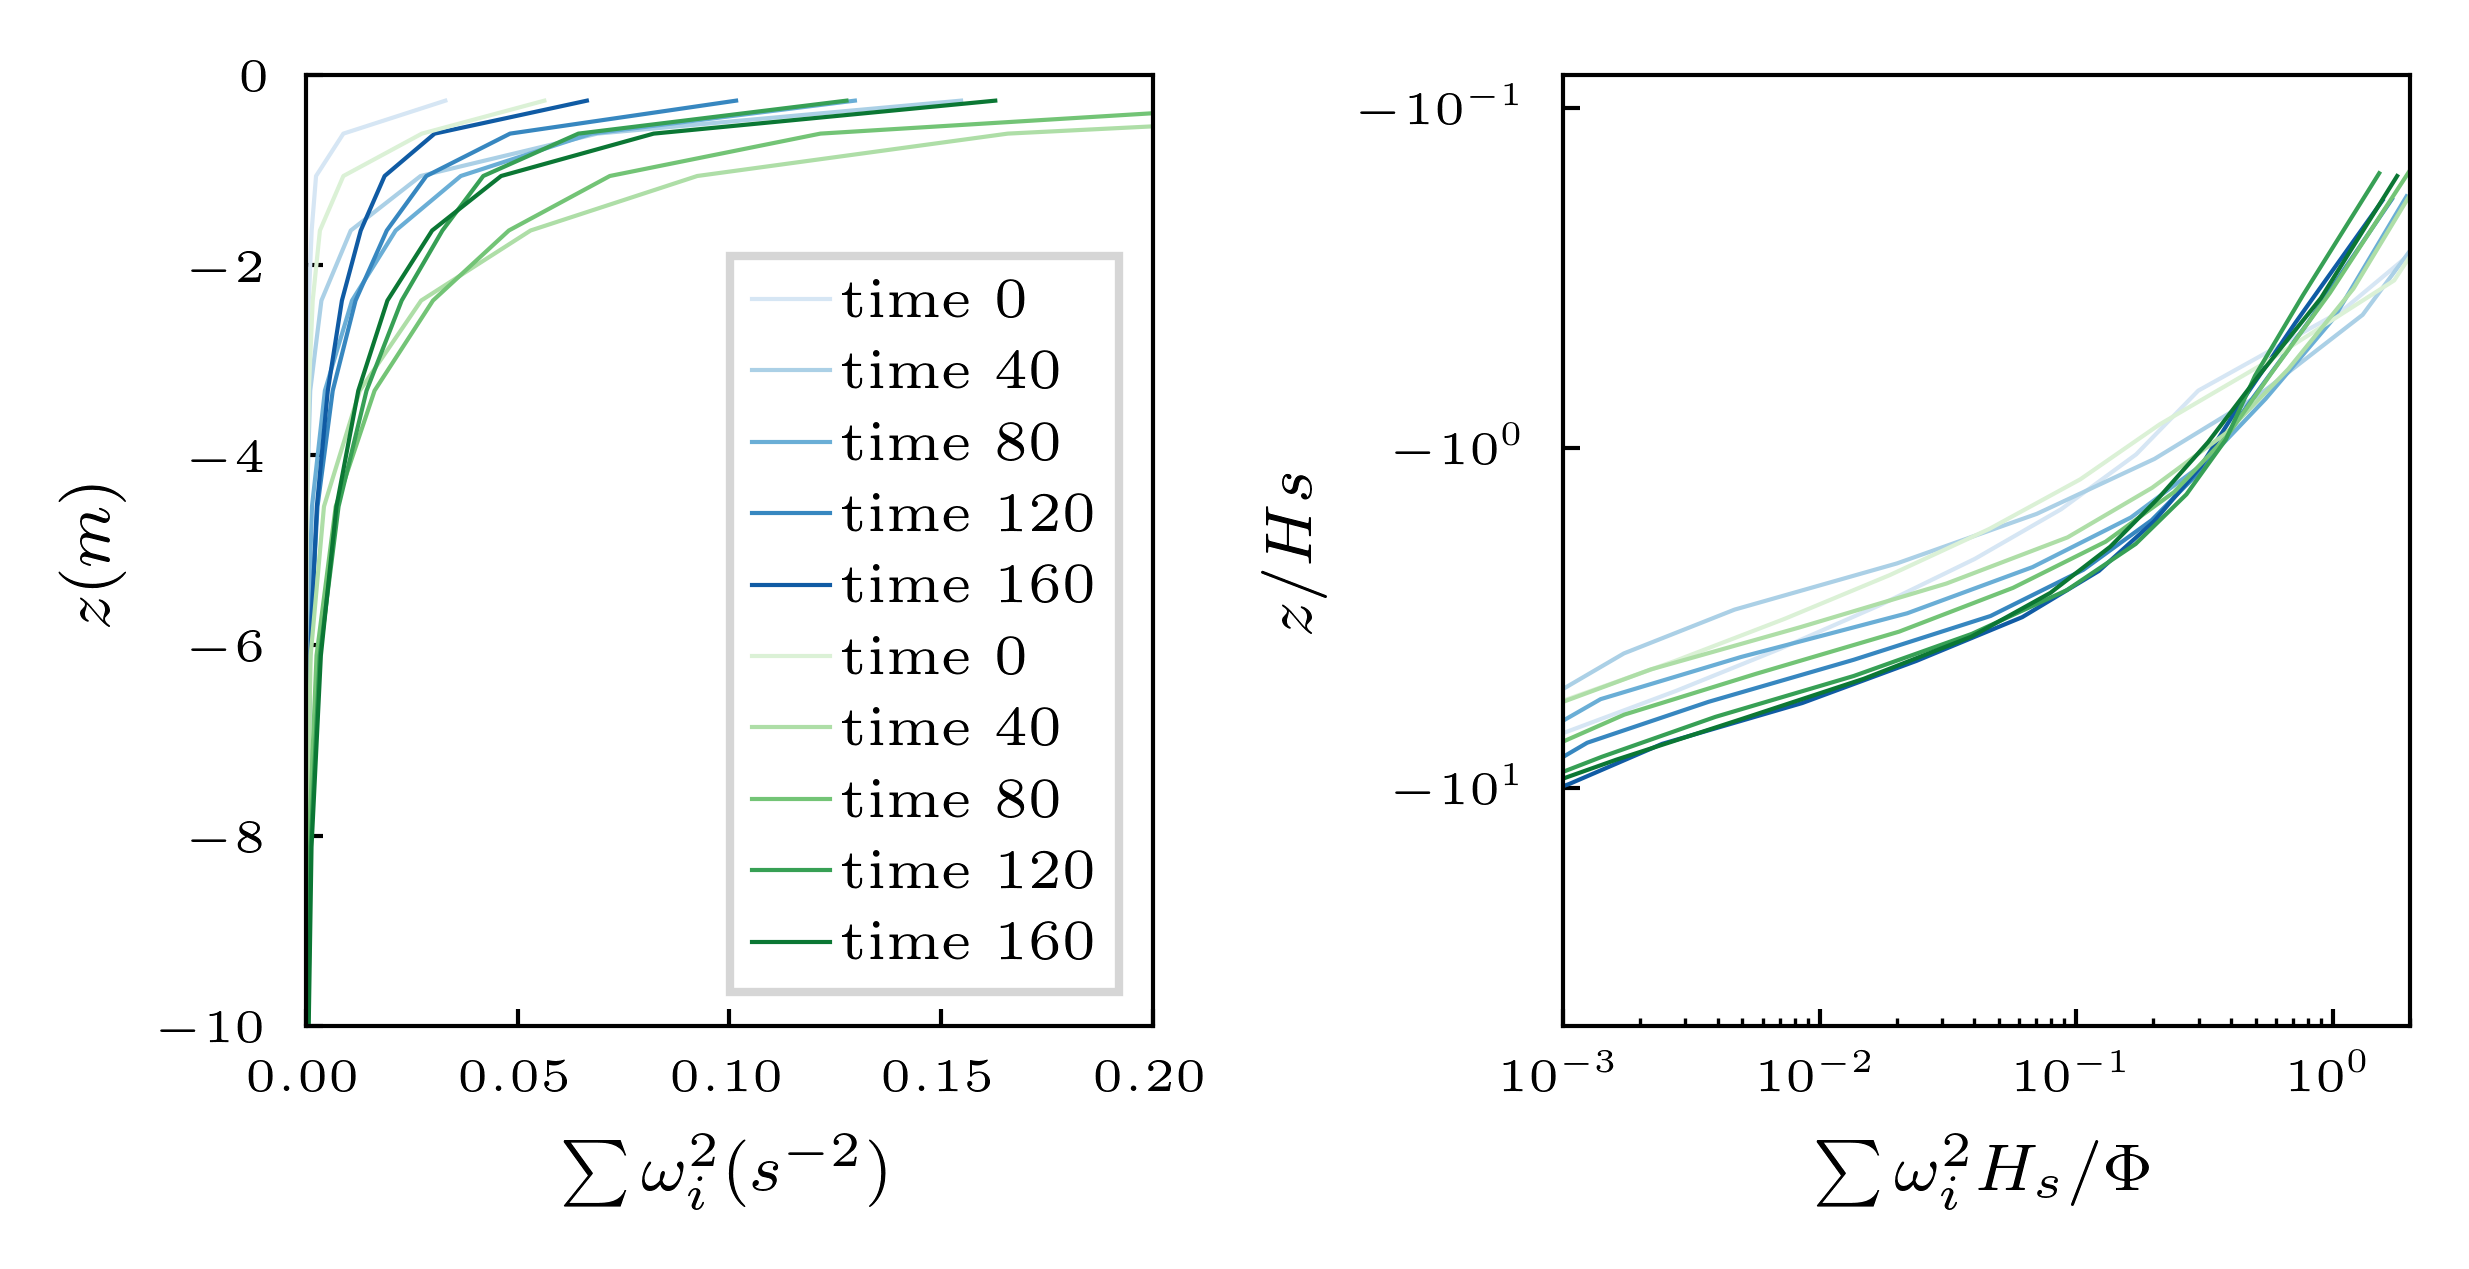

In [135]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize=[4,2])

case = case_field3

for itime in range(0,len(case.tseries)):
    epsilon = np.zeros(15)
    z = np.zeros(15)
    # dx = L/Nh
    # dvdx = np.gradient(uy_mesh_t[itime], axis=1)/dx
    # dudy = np.gradient(ux_mesh_t[itime], axis=2)/dx 
    # omega_z = dvdx - dudy
    for i in range (0,15):
        epsilon[i] = np.average(case.dict['omegax_t'][itime][i]**2 + case.dict['omegay_t'][itime][i]**2 + case.dict['omegaz_t'][itime][i]**2)
        z[i] = np.average(case.dict['z_mesh_t'][itime][i][:])
    phi = np.trapz(epsilon, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=200
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    print('Phi=%g, kp*Hs=%g, z_top/Hs=%g' %(phi,case.kp*Hs,z[-1]/Hs))   
    axes[0].plot(epsilon,z,label='time %g' %case.tseries[itime], c=plt.get_cmap('Blues')((itime+1)/6))
    axes[1].plot(epsilon*Hs/phi,z/Hs,label='time %g' %case.tseries[itime], c=plt.get_cmap('Blues')((itime+1)/6))
    # plt.plot(-z[:10],(-z[:10])**(-2)*0.1,'--',c='gray')
    # plt.plot(-z[8:],(-z[8:])**(-1)*0.02,'--',c='gray')  
    # plt.text(1, 0.05, '$z^{-1}$', c='gray')
    # plt.text(10, 0.01, '$z^{-2}$', c='gray')
# plt.xlim([10**(-8),10**(-1)])    
# plt.ylim([10**(-8),10**(-1)])   

case = case_field4

for itime in range(0,len(case.tseries)):
    epsilon = np.zeros(15)
    z = np.zeros(15)
    for i in range (0,15):
        epsilon[i] = np.average(case.dict['omegax_t'][itime][i]**2 + case.dict['omegay_t'][itime][i]**2 + case.dict['omegaz_t'][itime][i]**2)
        z[i] = np.average(case.dict['z_mesh_t'][itime][i][:])
    phi = np.trapz(epsilon, x=z)
    filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
    eta = np.fromfile(filename, dtype=np.float32)
    N = 1024; L0=200
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
    Hs = np.std(eta)*4
    print('Phi=%g, kp*Hs=%g, z_top/Hs=%g' %(phi,case.kp*Hs,z[-1]/Hs))   
    axes[0].plot(epsilon,z,label='time %g' %case.tseries[itime], c=plt.get_cmap('Greens')((itime+1)/6))
    axes[1].plot(epsilon*Hs/phi,z/Hs,label='time %g' %case.tseries[itime], c=plt.get_cmap('Greens')((itime+1)/6))

axes[0].legend(loc='lower right')
axes[0].set_ylim([-10,0])
axes[0].set_xlim([0,2*10**(-1)])
axes[0].set_xlabel('$\sum \omega_i^2 (s^{-2})$')
axes[0].set_ylabel('$z (m)$')

axes[1].set_xlabel('$\sum \omega_i^2 H_s/\Phi$')
axes[1].set_ylabel('$z/Hs$')
axes[1].set_xscale('log'); axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].set_ylim([-50,-0.08])
axes[1].set_xlim([0.001,2])

/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/surface/eta_matrix_160
0.9822955 -0.9916478 0.984351396560669


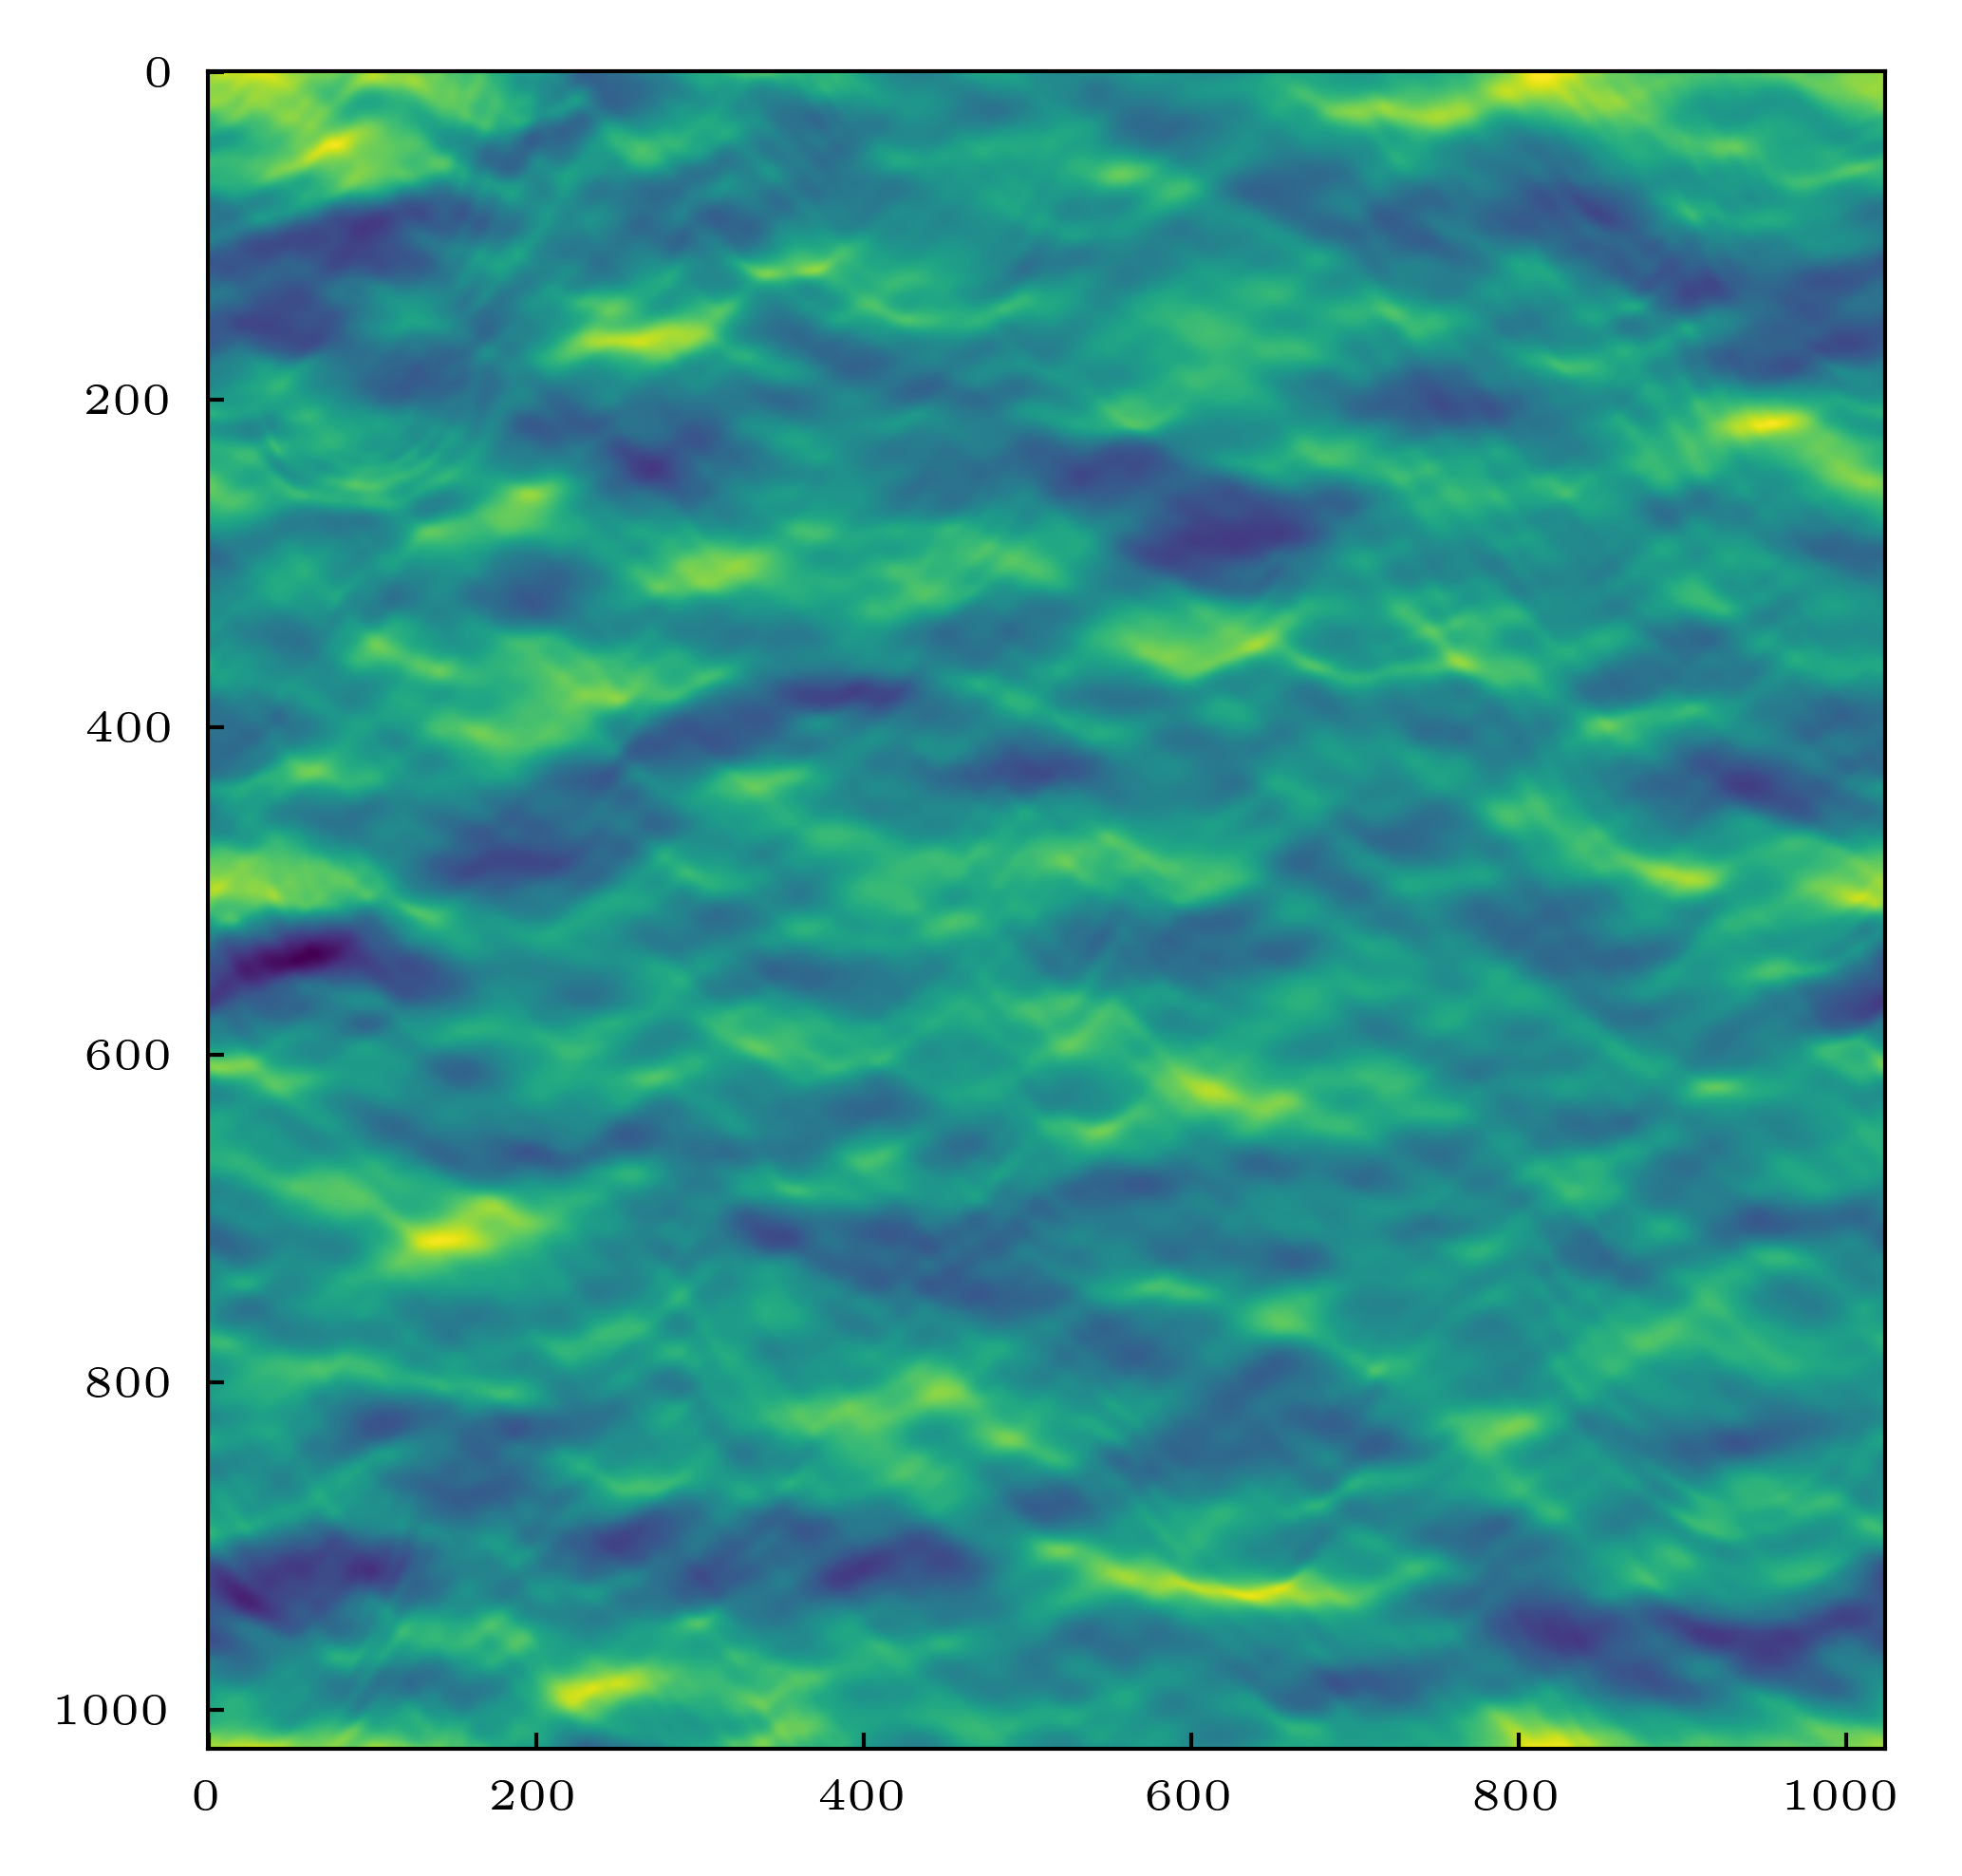

In [75]:
case = case_field1 
filename = case.path[0:-5] + 'surface/eta_matrix_%g' %case.tseries[itime]
print(filename)
eta = np.fromfile(filename, dtype=np.float32)
N = 1024; L0=200
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]    
Hs = np.std(eta)*4
plt.imshow(eta)
print(eta.max(), eta.min(), Hs)

Text(0, 0.5, '$z (m)$')

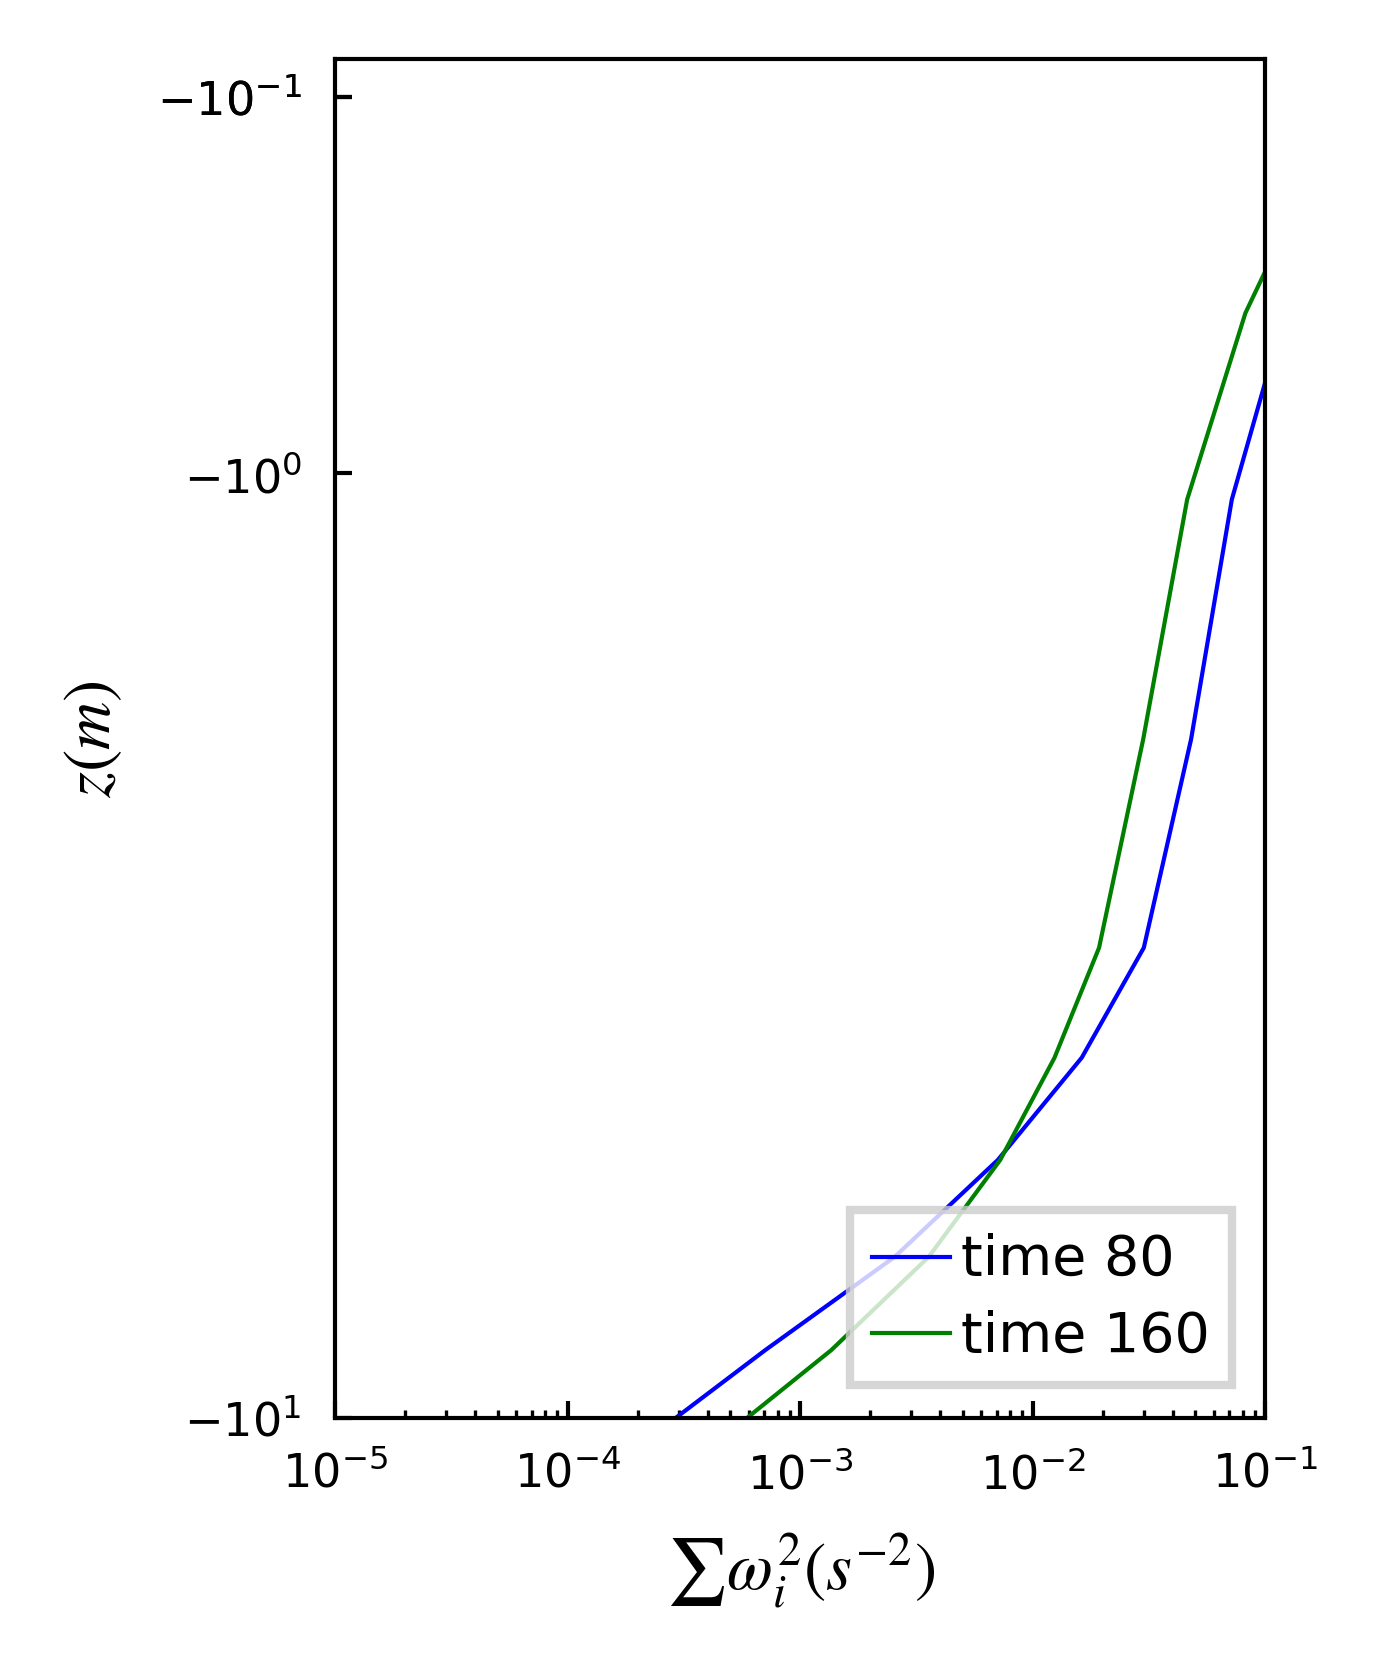

In [38]:
fig = plt.figure(figsize=[2,3])
tseries = (80,160)
for itime in range(0,2):
    epsilon = np.zeros(15)
    z = np.zeros(15)
    # dx = L/Nh
    # dvdx = np.gradient(uy_mesh_t[itime], axis=1)/dx
    # dudy = np.gradient(ux_mesh_t[itime], axis=2)/dx 
    # omega_z = dvdx - dudy
    for i in range (0,15):
        epsilon[i] = np.average(omegax_t2[itime][i]**2+omegay_t2[itime][i]**2+omegaz_t2[itime][i]**2)
        z[i] = np.average(z_mesh_t2[itime][i][:])
    plt.plot(epsilon,np.log(-z),label='time %g' %tseries[itime])
    # plt.plot(-z[:10],(-z[:10])**(-2)*0.1,'--',c='gray')
    # plt.plot(-z[8:],(-z[8:])**(-1)*0.02,'--',c='gray')  
    # plt.text(1, 0.05, '$z^{-1}$', c='gray')
    # plt.text(10, 0.01, '$z^{-2}$', c='gray')
plt.xlim([10**(-5),10**(-1)])    
# plt.ylim([10**(-8),10**(-1)])   
plt.ylim([-10,-0.01])
plt.xscale('log')
plt.yscale('symlog')
plt.yticks([-10,-1,-0.1,-0.1])
plt.legend(loc='lower right')
plt.xlabel('$\sum \omega_i^2 (s^{-2})$')
plt.ylabel('$z (m)$')


Text(0, 0.5, '$z (m)$')

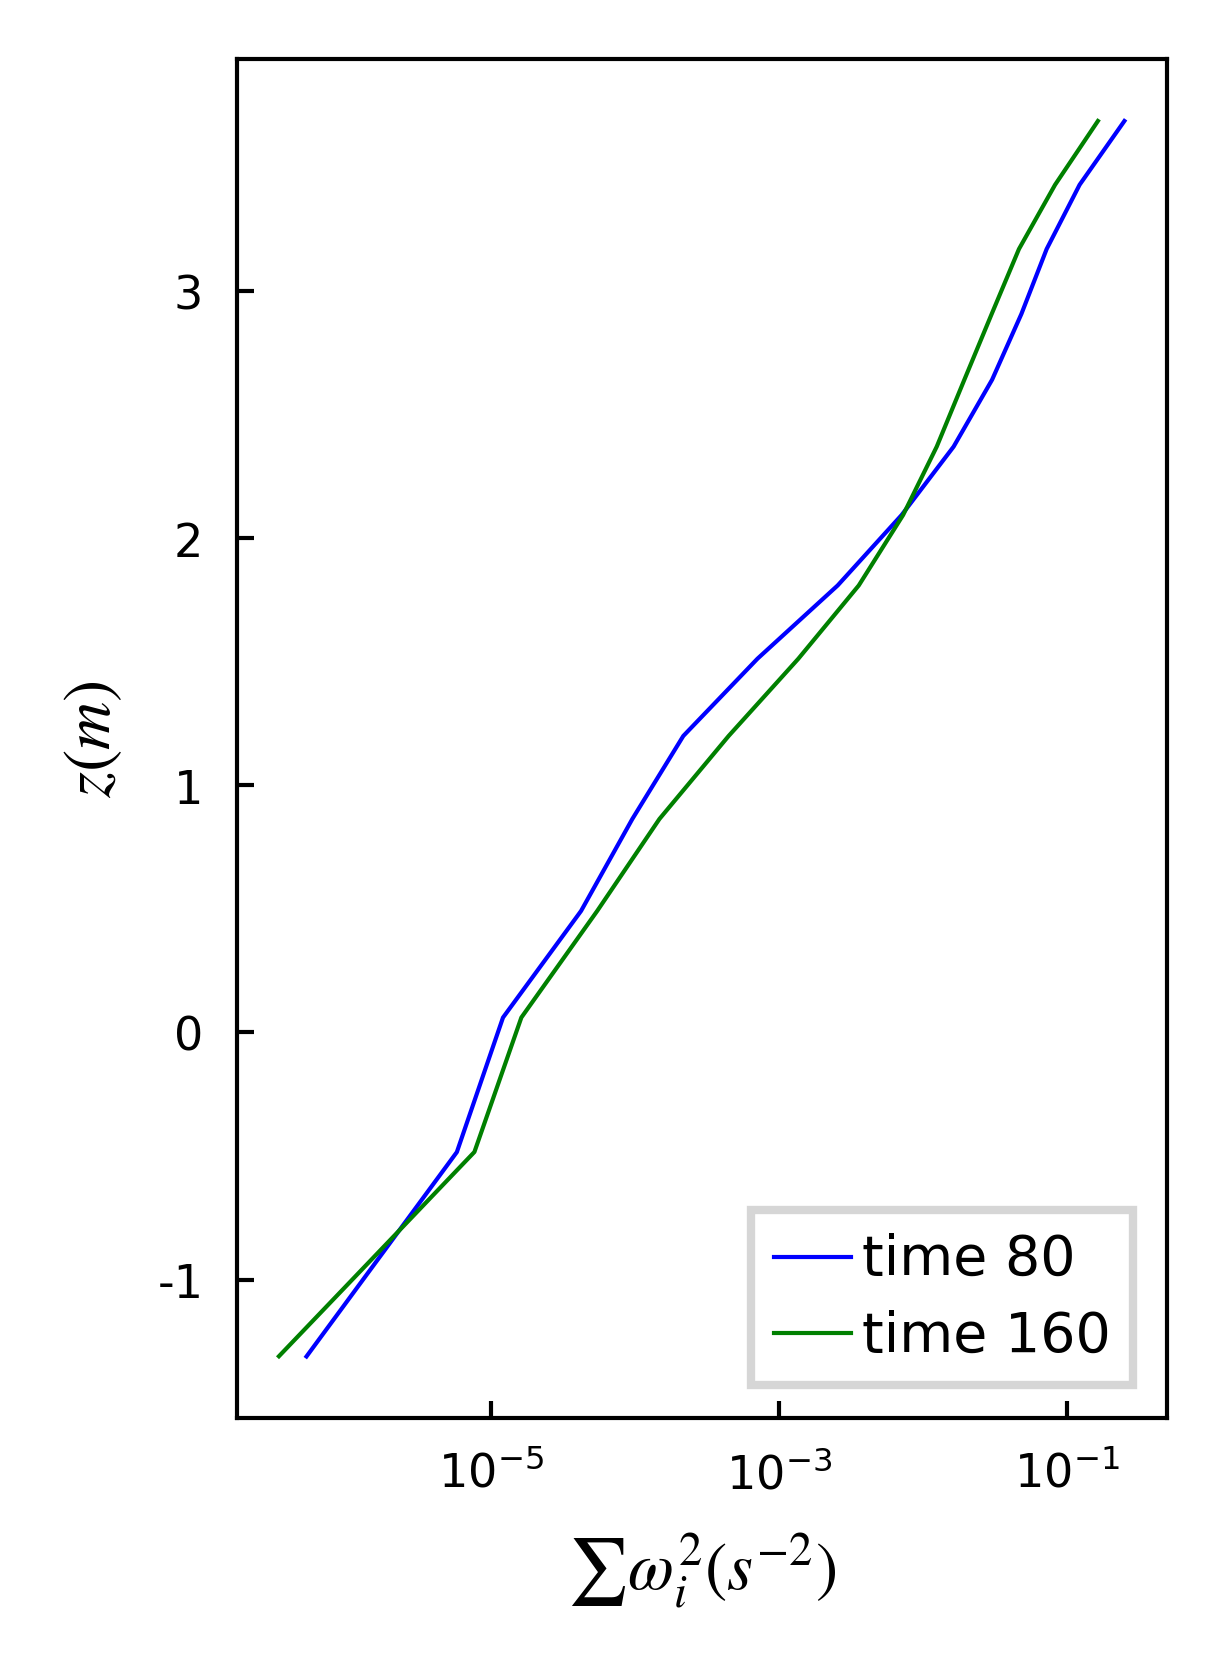

In [48]:
fig = plt.figure(figsize=[2,3])
tseries = (80,160)
for itime in range(0,2):
    epsilon = np.zeros(15)
    z = np.zeros(15)
    # dx = L/Nh
    # dvdx = np.gradient(uy_mesh_t[itime], axis=1)/dx
    # dudy = np.gradient(ux_mesh_t[itime], axis=2)/dx 
    # omega_z = dvdx - dudy
    for i in range (0,15):
        epsilon[i] = np.average(omegax_t2[itime][i]**2+omegay_t2[itime][i]**2+omegaz_t2[itime][i]**2)
        z[i] = np.average(z_mesh_t2[itime][i][:])
    plt.plot(epsilon[::],np.log(-z[::-1]),label='time %g' %tseries[itime])
    # plt.plot(-z[:10],(-z[:10])**(-2)*0.1,'--',c='gray')
    # plt.plot(-z[8:],(-z[8:])**(-1)*0.02,'--',c='gray')  
    # plt.text(1, 0.05, '$z^{-1}$', c='gray')
    # plt.text(10, 0.01, '$z^{-2}$', c='gray')
# plt.xlim([10**(-5),10**(-1)])    
# plt.ylim([10**(-8),10**(-1)])   
# plt.ylim([-,-0.01])
plt.xscale('log')
# plt.yticks([-10,-1,-0.1,-0.1])
plt.legend(loc='lower right')
plt.xlabel('$\sum \omega_i^2 (s^{-2})$')
plt.ylabel('$z (m)$')


### Plotting 

In [12]:
def plot_yslice(x_mesh, y_mesh, z_mesh, field_mesh, yslice, ax):
    global case
    Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], field_mesh[:,:,yslice], shading='flat', cmap='RdBu_r')
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
    ax.set_ylim([-L/5, L/10])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,z_mesh[-1,:-1,yslice],lw=0.5,c='k')
    
def plot_zslice(x_mesh, y_mesh, z_mesh, field_mesh, zslice, ax):
    global case
    Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
    image = ax.pcolormesh(x_mesh[zslice,:,:], y_mesh[zslice,:,:], field_mesh[zslice,:,:], shading='flat', cmap='RdBu_r')
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
    ax.set_ylim([-L/2, L/2]); ax.set_xlim([-L/2, L/2]);

Text(0.5, 1.1, '$\\omega_y(s^{-1})$')

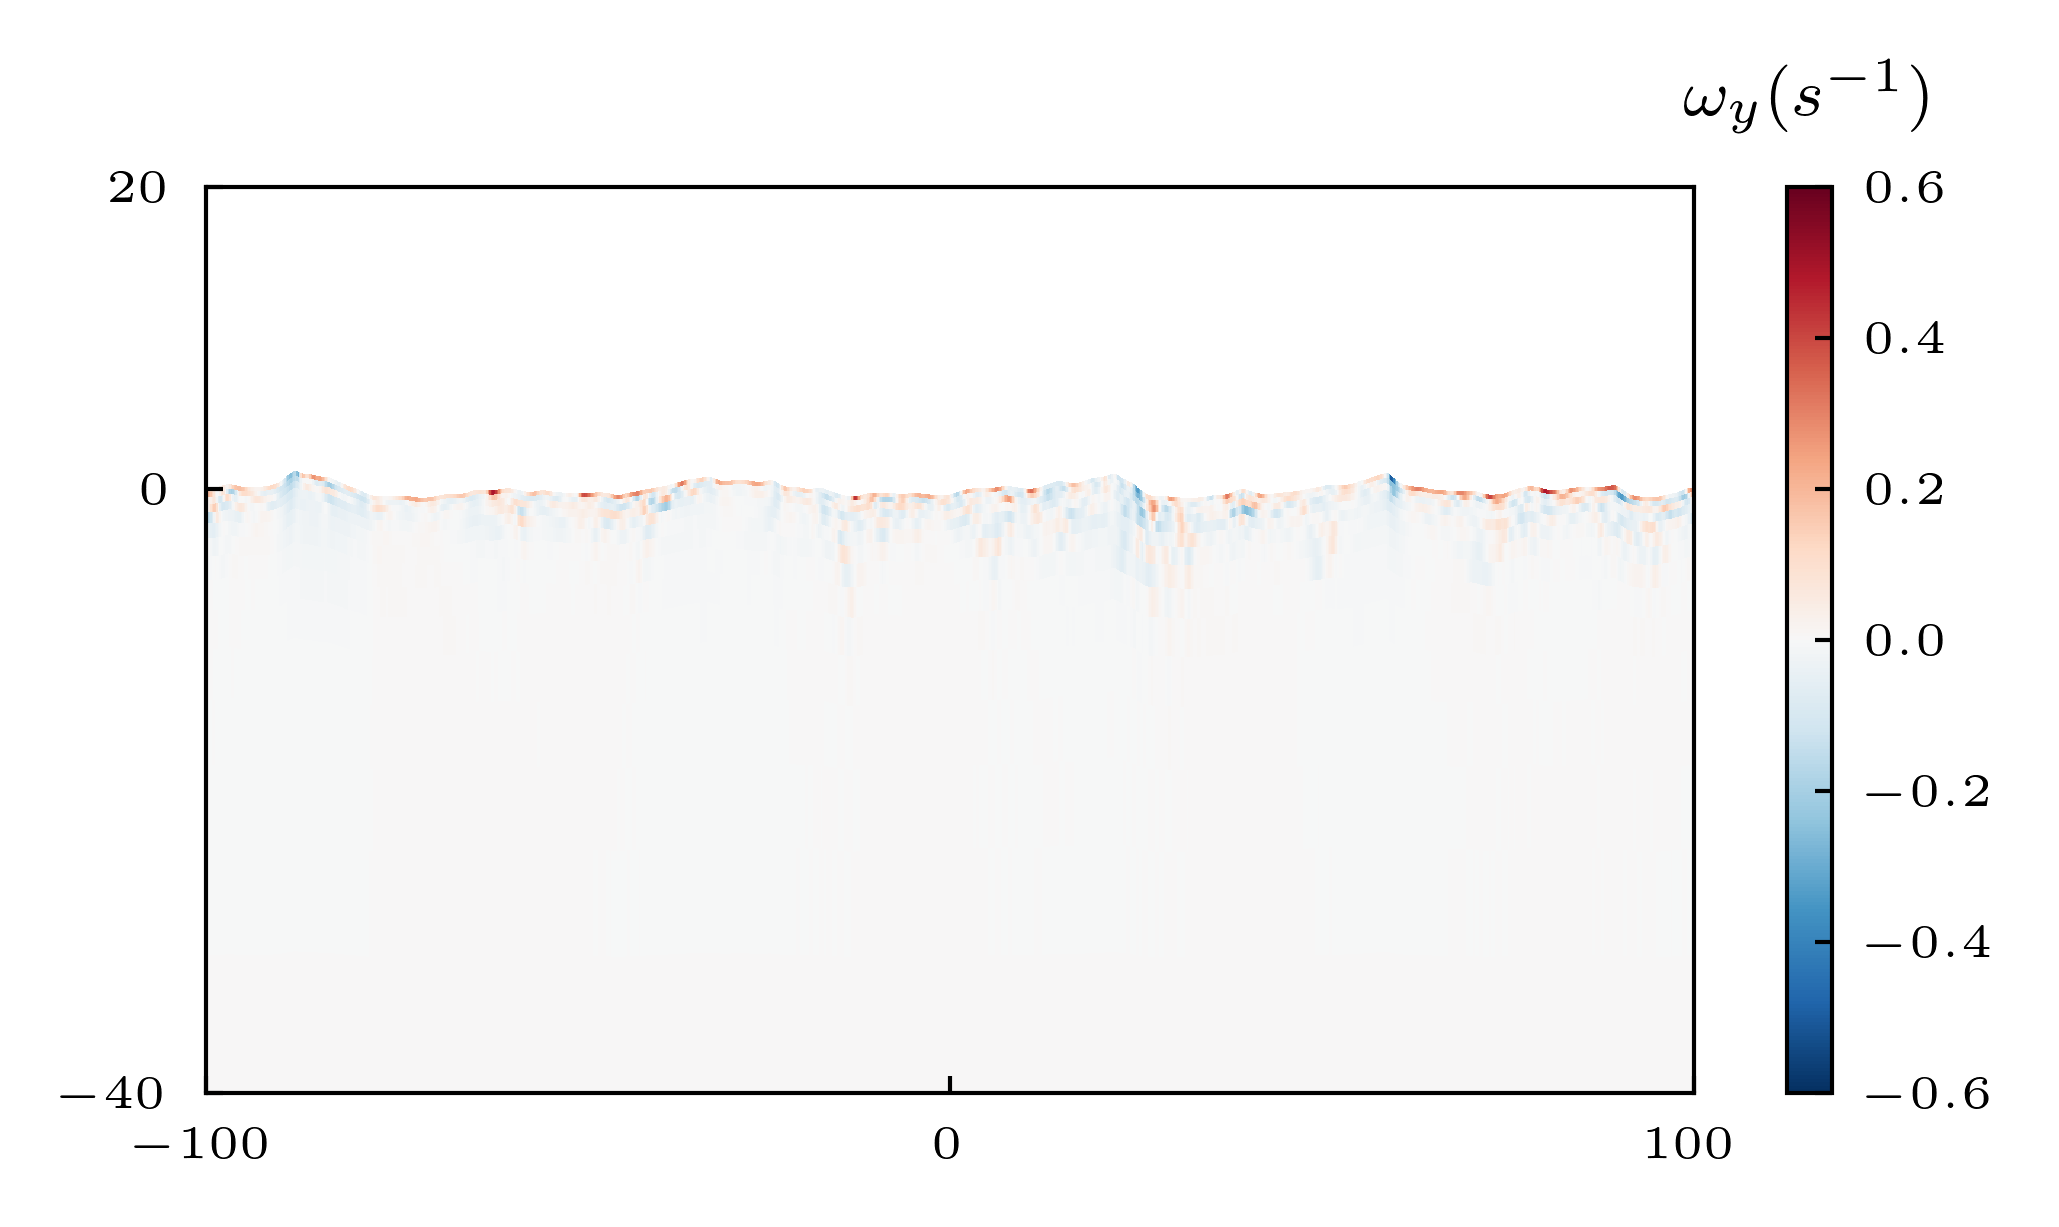

In [100]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
itime = 4
yslice = 128

case = case_field3

Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
image = ax.pcolormesh(case.dict['x_mesh'][:,:,yslice], case.dict['z_mesh_t'][itime][:,:,yslice], case.dict['omegay_t'][itime][:,:,yslice],
                      shading='flat', cmap='RdBu_r', vmax=0.6, vmin=-0.6)
ax.set_xticks([-L/2,0,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])

cbar = plt.colorbar(image)
cbar.ax.text(0.5, 1.1, r'$\omega_y(s^{-1})$', ha='center', va='center', transform=cbar.ax.transAxes)


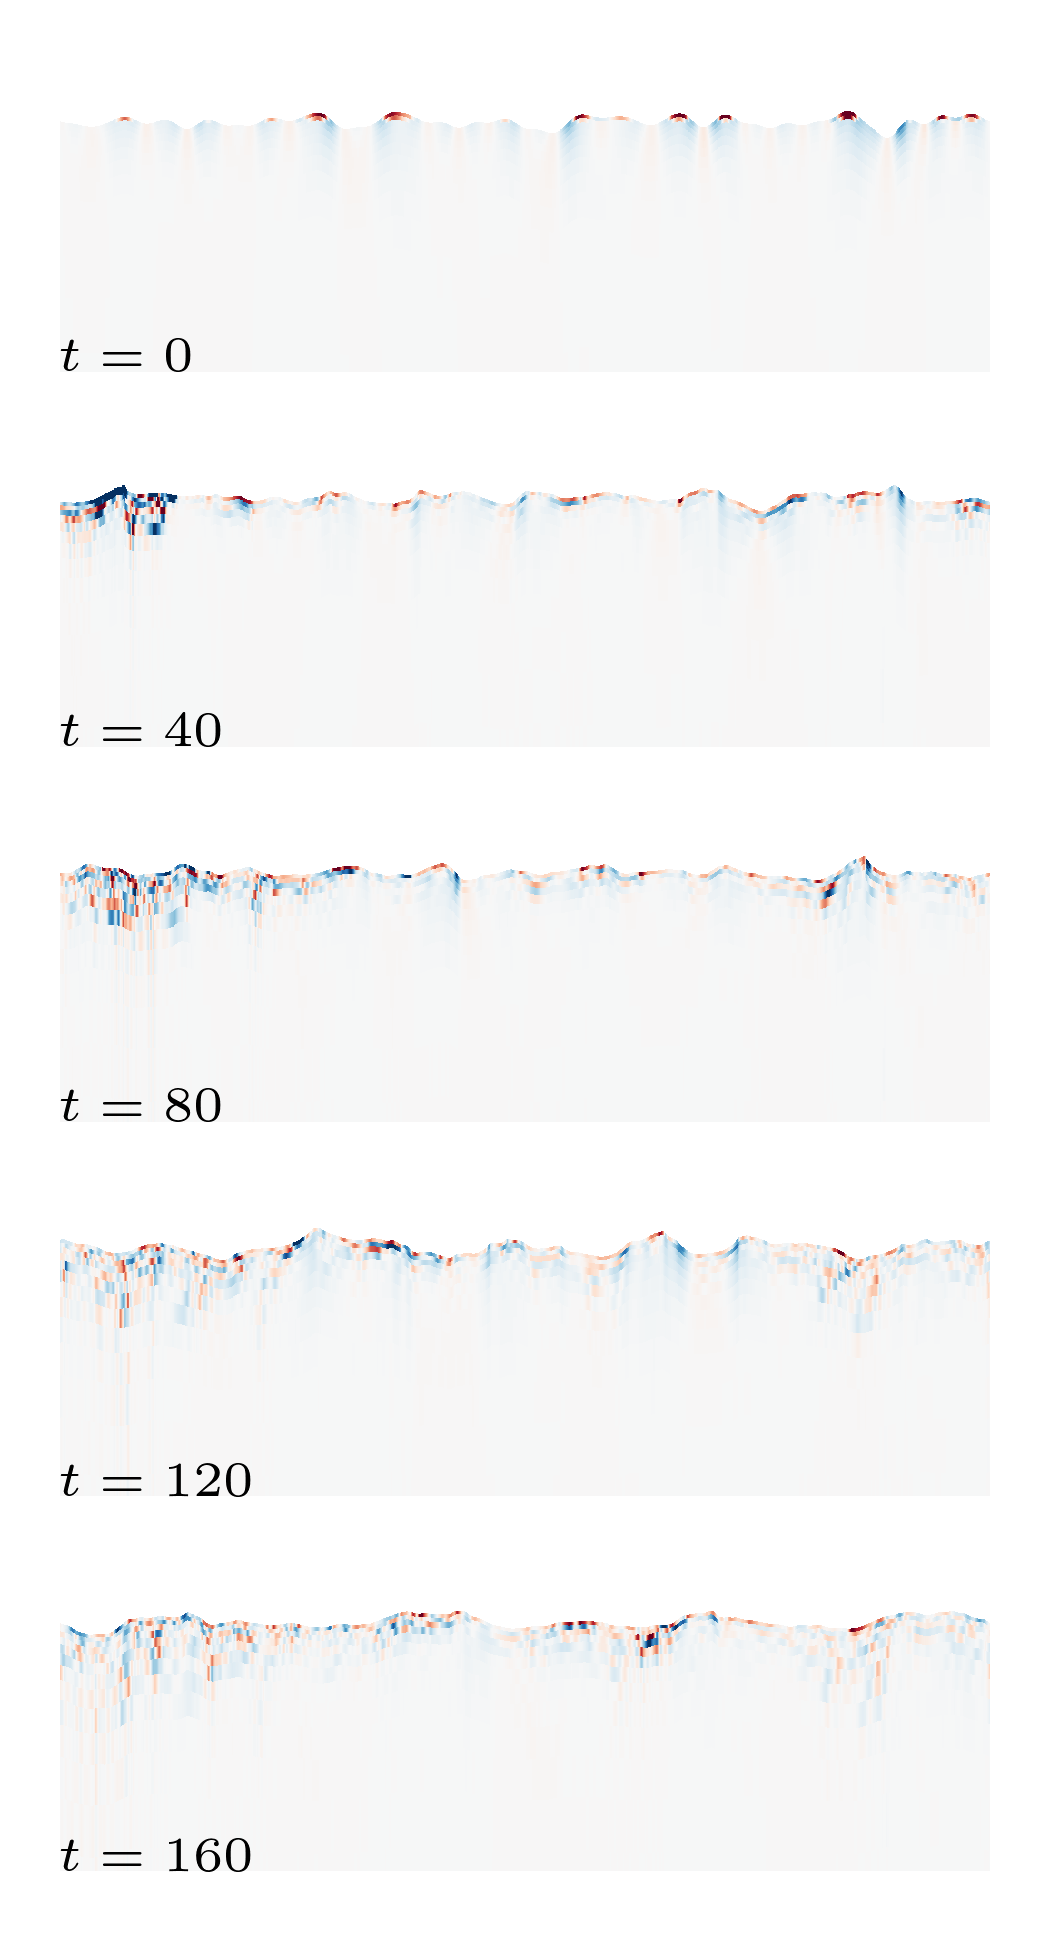

In [140]:


fig, axes = plt.subplots(5, 1, figsize=[2,4])

case = case_field5
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
for itime in range(0,5):
    ax = axes[itime]
    image = ax.pcolormesh(case.dict['x_mesh'][:,:,yslice], case.dict['z_mesh_t'][itime][:,:,yslice], case.dict['omegay_t'][itime][:,:,yslice],
                          shading='flat', cmap='RdBu_r', vmax=0.5*case.cp*case.kp, vmin=-0.5*case.cp*case.kp)
    ax.set_xticks([-L/2,0,L/2])
#     ax.set_yticks([-L/10,0,L/10])
    ax.set_ylim([-L/10, L/40])
    ax.axis('off')
    ax.annotate('$t=%g$' %case.tseries[itime], (-L/2,-L/10), fontsize=6)

# cbar = plt.colorbar(image, location='bottom')
# ax.text(1.15, 0.5, r'$\omega_y/\omega_p$', ha='center', va='center', transform=cbar.ax.transAxes)


In [138]:
print(case.kp*case.cp)

0.7846987702957101


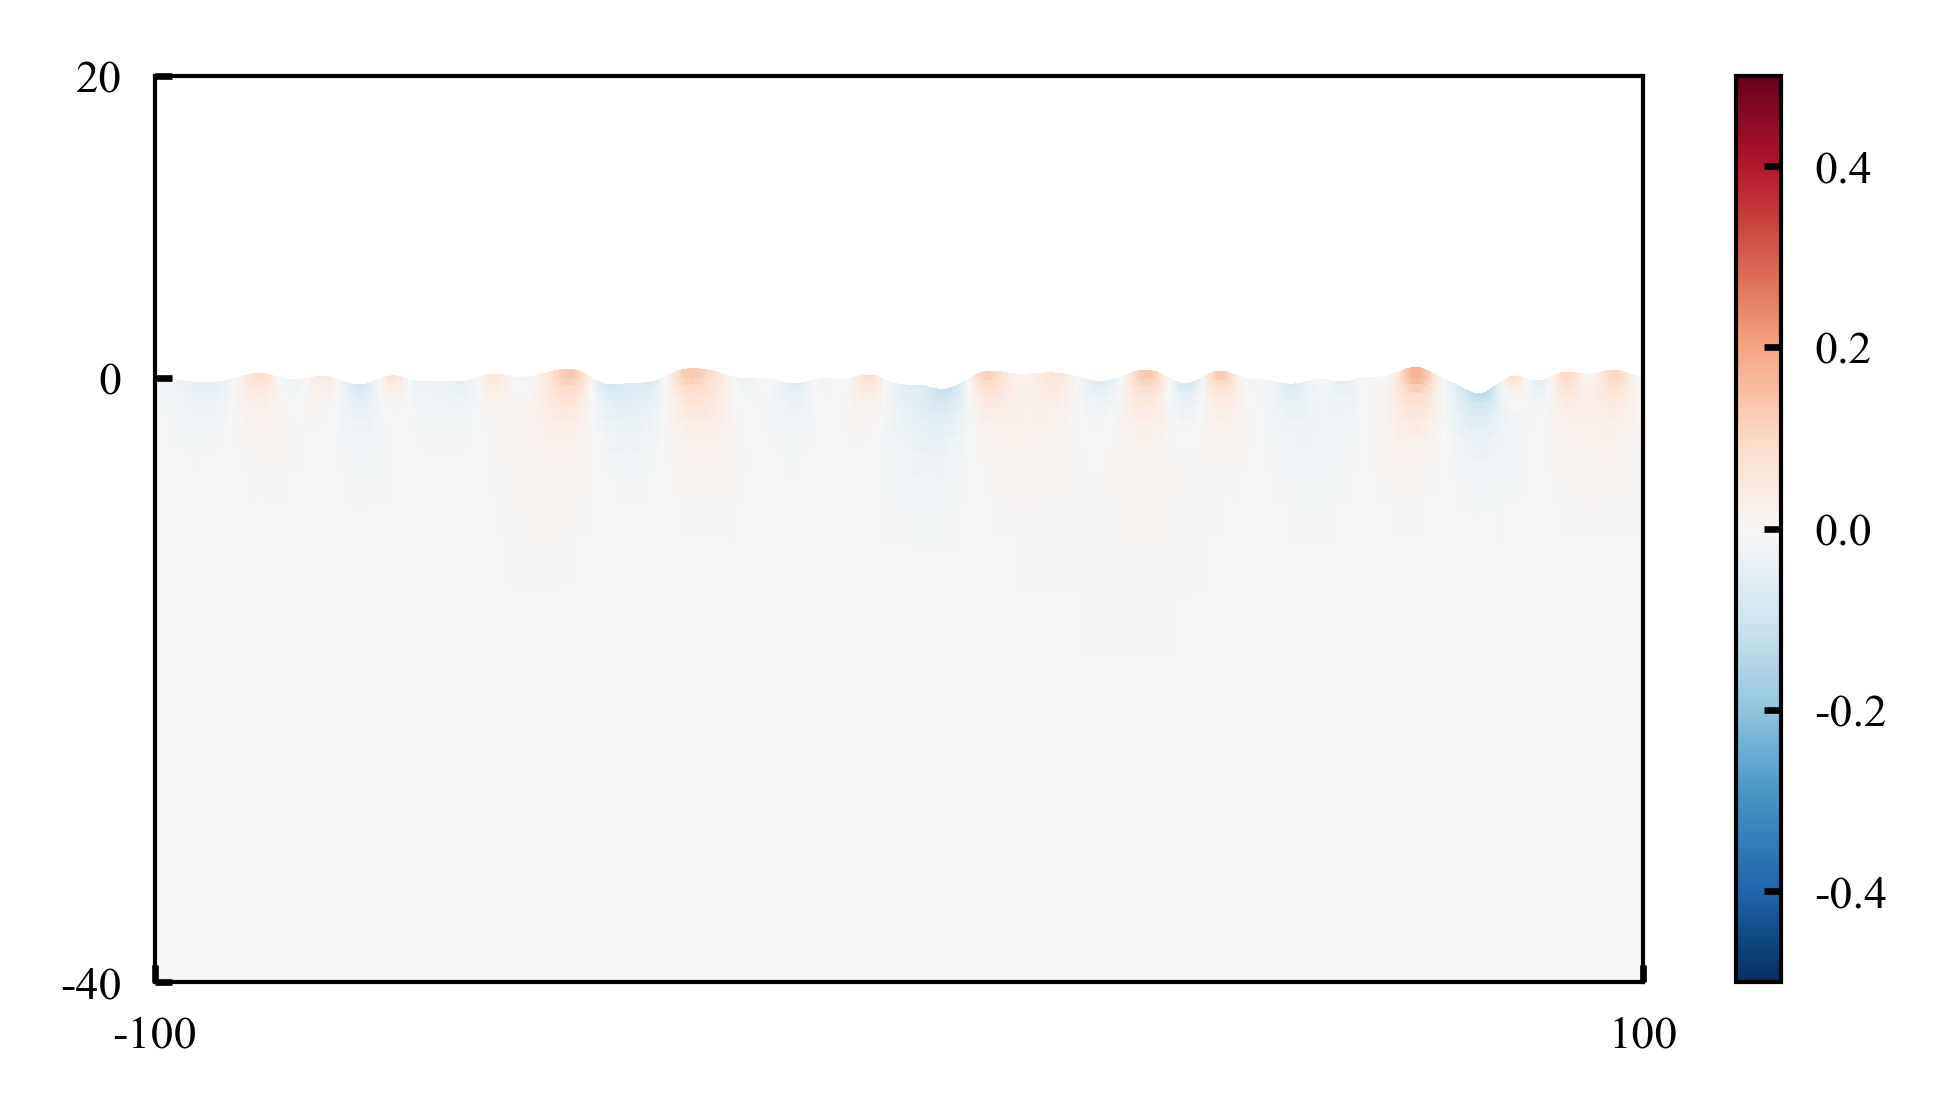

In [29]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
i = 0
yslice = 128
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
image = ax.pcolormesh(x_mesh4[:,:,yslice], z_mesh_t4[i][:,:,yslice], ux_t4[i][:,:,yslice]/cp,
                      shading='flat', cmap='RdBu_r', vmax=0.5, vmin=-0.5)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
plt.colorbar(image)
# 0.17117248 -0.2046054
# 0.17087948 -0.13110258

(-100.0, 100.0, -40.0, 4.0)

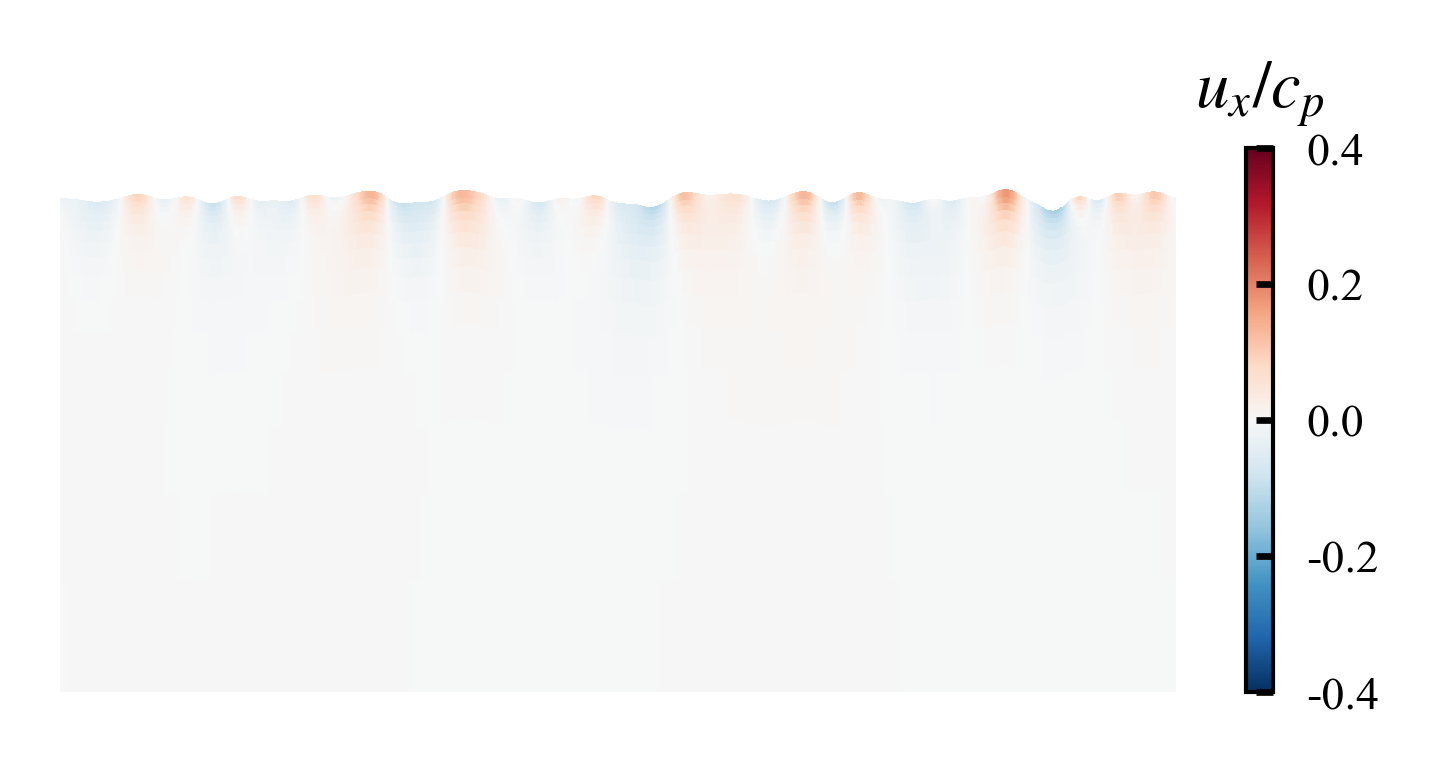

In [37]:
fig = plt.figure (figsize=[3,1.2]); ax = plt.gca()
i = 0
yslice = 128
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
image = ax.pcolormesh(x_mesh4[:,:,yslice], z_mesh_t4[i][:,:,yslice], ux_t4[i][:,:,yslice]/cp,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/50])
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
cbar = plt.colorbar(image)
cbar.ax.text(0.5, 1.1, r'$u_x/c_p$', ha='center', va='center', transform=cbar.ax.transAxes)
ax.axis('off')
# 0.17117248 -0.2046054
# 0.17087948 -0.13110258

(-100.0, 100.0, -40.0, 4.0)

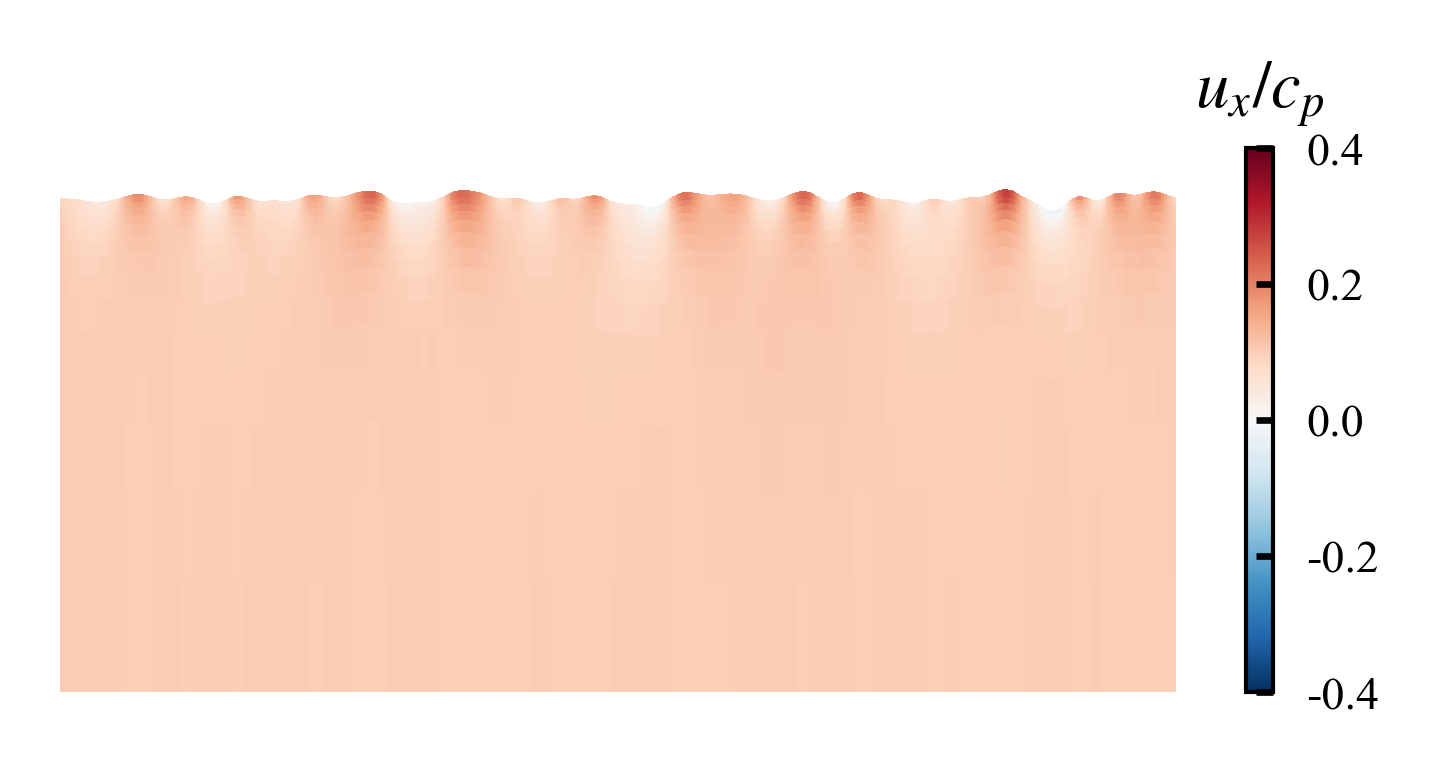

In [35]:
fig = plt.figure (figsize=[3,1.2]); ax = plt.gca()
i = 0
yslice = 128
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
image = ax.pcolormesh(x_mesh5[:,:,yslice], z_mesh_t5[i][:,:,yslice], ux_t5[i][:,:,yslice]/cp,
                      shading='flat', cmap='RdBu_r', vmax=0.4, vmin=-0.4)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/50])
# print(dzdx_t[i].max(), dzdx_t[i].min())
# print(dzdy_t[i].max(), dzdy_t[i].min())
cbar = plt.colorbar(image)
cbar.ax.text(0.5, 1.1, r'$u_x/c_p$', ha='center', va='center', transform=cbar.ax.transAxes)
ax.axis('off')
# 0.17117248 -0.2046054
# 0.17087948 -0.13110258

0.13525663 -0.15642715
0.16027567 -0.10626928


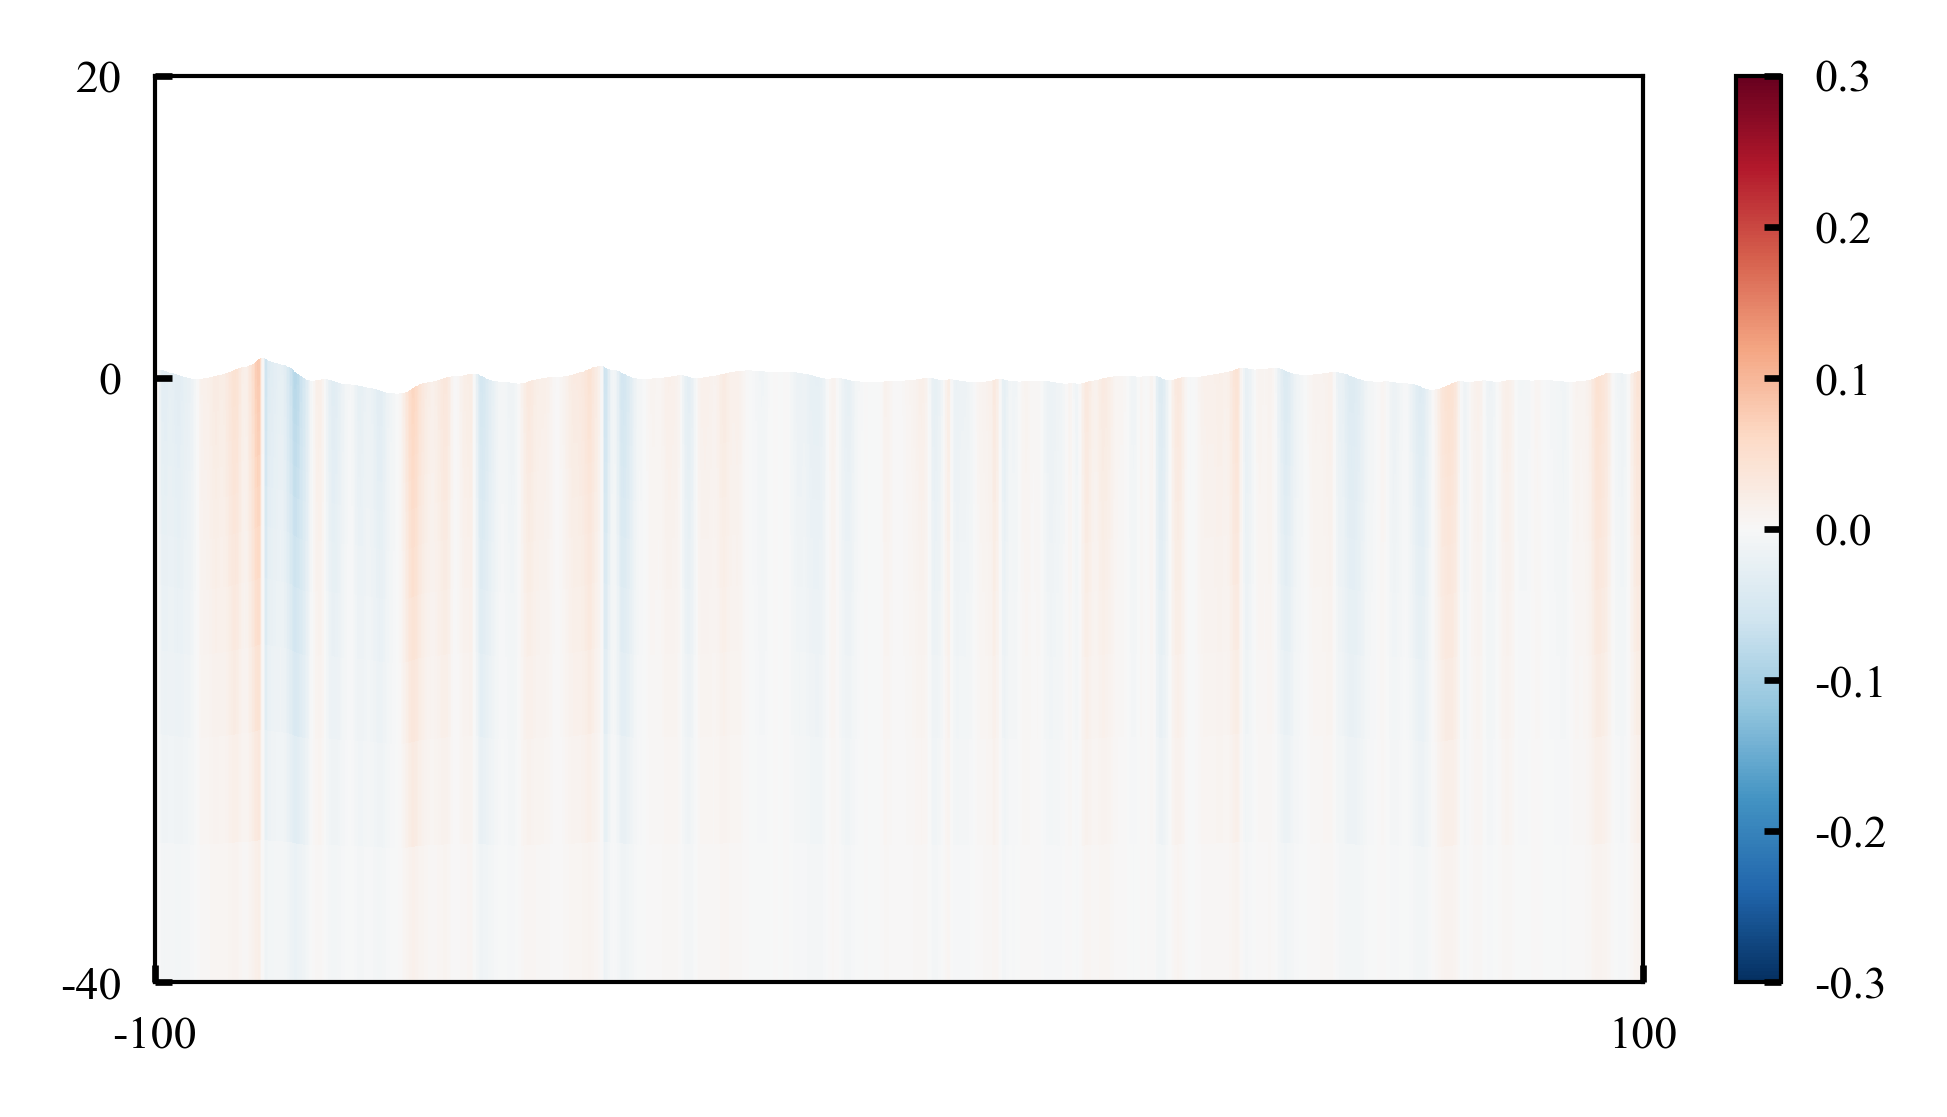

In [17]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
i = 4
yslice = 128
Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp    
image = ax.pcolormesh(x_mesh4[:,:,yslice], z_mesh_t4[i][:,:,yslice], dzdxc_t4[i][:,:,yslice],
                      shading='flat', cmap='RdBu_r', vmax=0.3, vmin=-0.3)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
print(dzdx_t4[i].max(), dzdx_t4[i].min())
print(dzdy_t4[i].max(), dzdy_t4[i].min())
plt.colorbar(image)
# 0.13793927 -0.19599065
# 0.18509738 -0.16394144

In [86]:
len(dzdx_t[1])

15

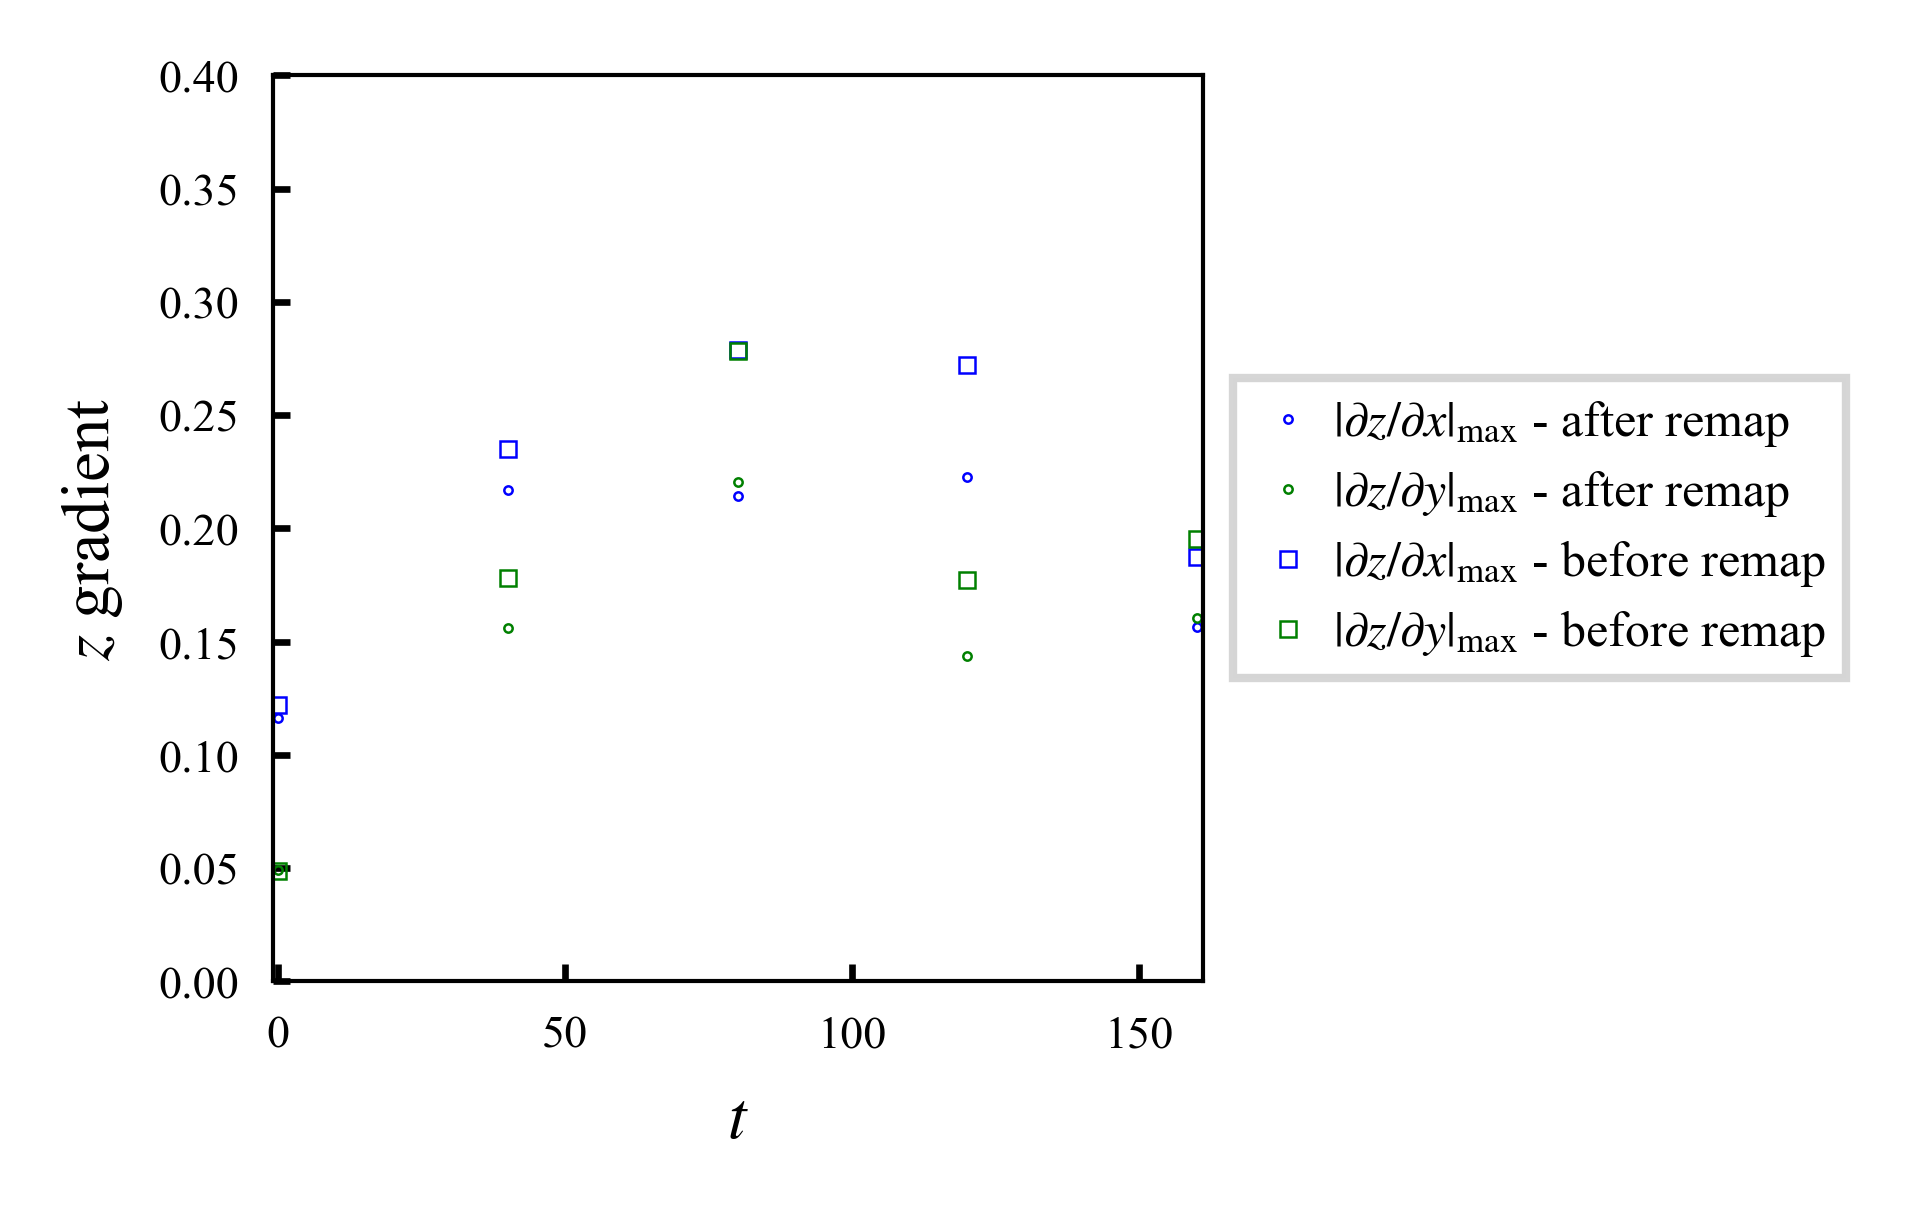

In [13]:
plt.figure(figsize=[2,2])
tseries = (0,40,80,120,160,200)
dzdx_max = [np.max(np.abs(dzdx_t4[i])) for i in range(0,5)]
dzdy_max = [np.max(np.abs(dzdy_t4[i])) for i in range(0,5)]
dzdxc_max = [np.max(np.abs(dzdxc_t4[i])) for i in range(0,5)]
dzdyc_max = [np.max(np.abs(dzdyc_t4[i])) for i in range(0,5)]
plt.plot(tseries[:-1], dzdx_max, '.', label='$|\partial z/\partial x|_\mathrm{max}$ - after remap')
plt.plot(tseries[:-1], dzdy_max, '.', label='$|\partial z/\partial y|_\mathrm{max}$ - after remap')
plt.plot(tseries[:-1], dzdxc_max, 's', c='C0', label='$|\partial z/\partial x|_\mathrm{max}$ - before remap')
plt.plot(tseries[:-1], dzdyc_max, 's', c='C1', label='$|\partial z/\partial y|_\mathrm{max}$ - before remap')
plt.xlim([-1,161])
plt.ylim([0,0.4])
plt.xlabel('$t$'); plt.ylabel('$z$ gradient')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6)

NameError: name 'plot_zslice' is not defined

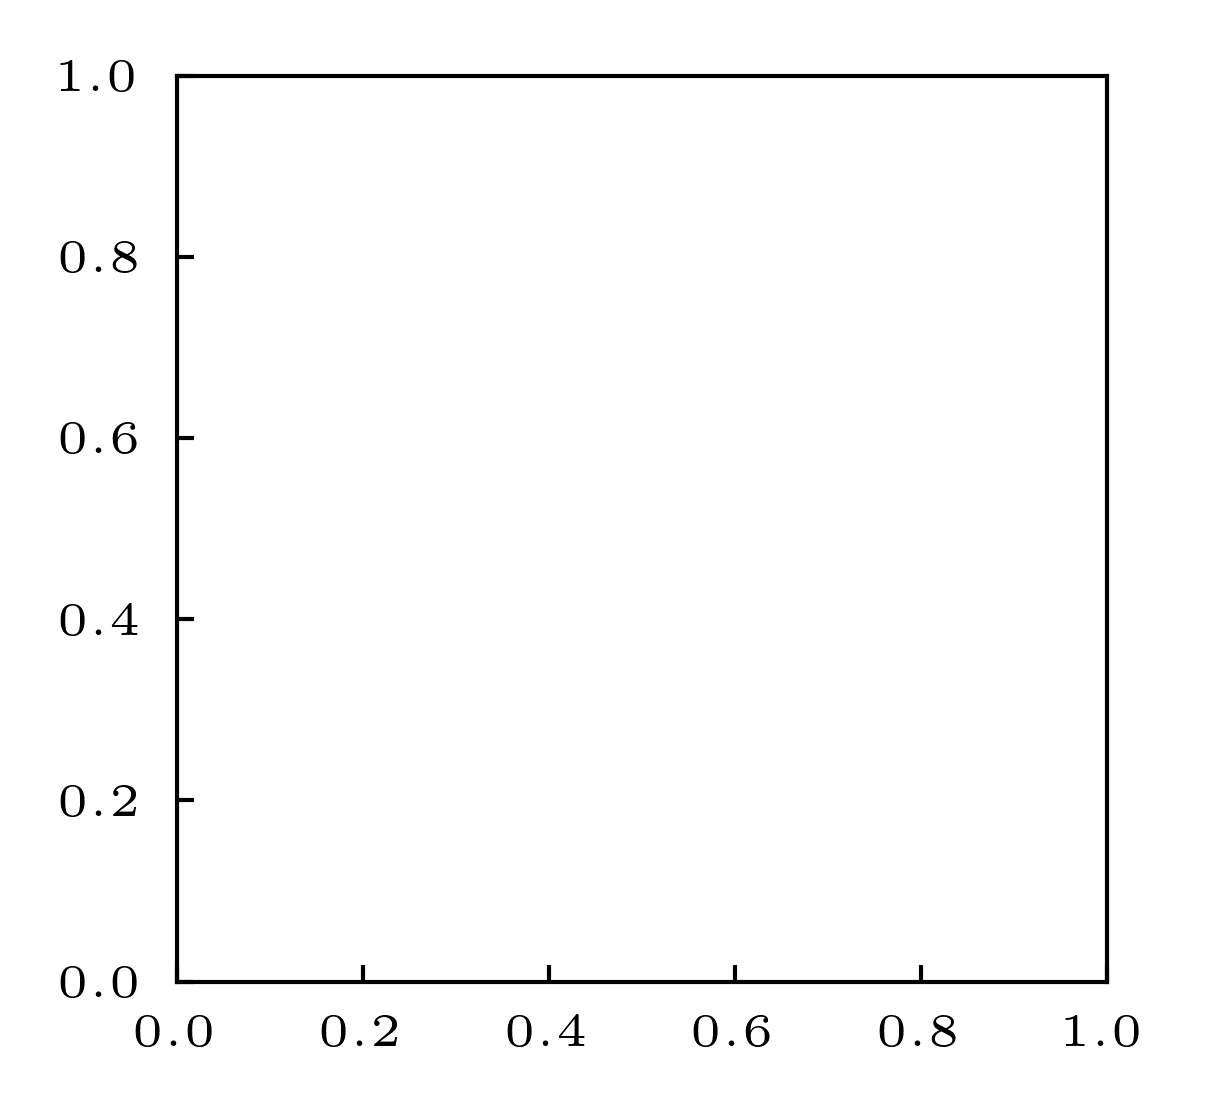

In [7]:
fig = plt.figure (figsize=[2,2]); ax = plt.gca()
i = 1
plot_zslice(x_mesh, y_mesh, z_mesh[i], dzdxc_t[i], zslice=-1, ax=ax)
print(dzdxc_t[i].max(), dzdxc_t[i].min())
print(dzdxc_t[i].max(), dzdxc_t[i].min())

In [52]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
i = 0
plot_yslice(x_mesh, y_mesh, z_mesh_t[i], dzdx_t[i], yslice=128, ax=ax)
print(dzdx_t[i].max(), dzdx_t[i].min())
print(dzdx_t[i].max(), dzdx_t[i].min())

0.1405027 -0.1553723
0.1405027 -0.1553723


In [ ]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
yslice = 80; L = 200; Nh = 1024

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
# ax.plot(xarray,z_mesh[-1,1:,128],lw=0.5,c='k')

image = plt.pcolormesh(x_mesh1[:,:,yslice], z_mesh1[:,:,yslice], omegay_mesh1[:,:,yslice], shading='flat', 
                       cmap='RdBu_r', vmax=0.4, vmin=-0.4)
# image = plt.pcolormesh(x_mesh2[:,:,yslice], z_mesh2[:,:,yslice], omegay_mesh2[:,:,yslice], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\omega_y (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

In [ ]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
yslice = 128; L = 200; Nh = 1024

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
# ax.plot(xarray,z_mesh[-1,1:,128],lw=0.5,c='k')

# image = plt.pcolormesh(x_mesh1[:,:,yslice], z_mesh1[:,:,yslice], omegax_mesh1[:,:,yslice], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)
image = plt.pcolormesh(x_mesh2[:,:,yslice], z_mesh2[:,:,yslice], omegax_mesh2[:,:,yslice], shading='flat', 
                       cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\omega_x (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

In [ ]:
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
yslice = 128; L = 200; Nh = 1024

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
ax.set_ylim([-L/5, L/10])
# xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
# ax.plot(xarray,z_mesh[-1,1:,128],lw=0.5,c='k')

# image = plt.pcolormesh(x_mesh1[:,:,yslice], z_mesh1[:,:,yslice], omegax_mesh1[:,:,yslice], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)
image = plt.pcolormesh(x_mesh2[:,:,yslice], z_mesh2[:,:,yslice], omegaz_mesh2[:,:,yslice], shading='flat', 
                       cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\omega_z (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

In [ ]:
dvdx = np.gradient(uy_mesh2, axis=1)/dx
dudy = np.gradient(ux_mesh2, axis=2)/dx 
omega_z = dvdx - dudy

In [ ]:
fig = plt.figure (figsize=[2.5,2]); ax = plt.gca()
yslice = 128; L = 200; Nh = 1024

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
ax.set_ylim([-L/2, L/2])
image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], z_mesh2[-1,:-1,:-1], shading='flat', 
                       cmap='RdBu_r', vmax=2, vmin=-2)
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], omegax_mesh2[-1,:,:], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], omegaz_mesh2[-1,:,:], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\eta (m)$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-2,-1,0,1,2])
# cbar.ax.text(-0.5, 1.05, r'$\omega_x (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
# cbar.ax.text(-0.5, 1.05, r'$\omega_z (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])

plt.axis('off')
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

In [ ]:
fig = plt.figure(figsize=[2,3])
plt.plot(np.average(omegax_mesh2**2, axis=(1,2)), np.average(z_mesh2, axis=(1,2))[:-1], 'o', mfc='none', ms=3, mew=0.5, label=r'$\langle\omega_x^2\rangle$')
plt.plot(np.average(omegay_mesh2**2, axis=(1,2)), np.average(z_mesh2, axis=(1,2))[:-1], 'o', mfc='none', ms=3, mew=0.5, label=r'$\langle\omega_y^2\rangle$')
plt.plot(np.average(omegaz_mesh2**2, axis=(1,2)), np.average(z_mesh2, axis=(1,2))[:-1], 'o', mfc='none', ms=3, mew=0.5, label=r'$\langle\omega_z^2\rangle$')
plt.ylim([-6,0])
plt.xlim([0,0.1])
plt.xlabel(r'$\langle\omega_i^2\rangle$(s$^{-2}$)')
plt.ylabel(r'$\langle z \rangle$ (m)')
plt.legend(loc='lower right', fancybox=False)

In [ ]:
# TODO: migration to xarray


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=[5,4])
i = 3
# axis 0 is z; axis 1 is x; axis 2 is y (span-wise)
dx = L/Nh
dvdx = np.gradient(uy_mesh_t[i], axis=1)/dx
dudy = np.gradient(ux_mesh_t[i], axis=2)/dx 
omega_z = dvdx - dudy

fig1 = axs[0,0].imshow(omega_z[-1], cmap=plt.get_cmap('coolwarm'), vmax=0.1, vmin=-0.1)
axs[0,0].set_title('$\omega_z | _{z=\eta}$'); axs[0,0].axis('off'); plt.colorbar(fig1, ax=axs[0,0])

fig2 = axs[0,1].imshow(z_mesh_t[i][-1], cmap=plt.get_cmap('coolwarm'), vmax=1.5, vmin=-1.5)
axs[0,1].set_title('$\eta$'); axs[0,1].axis('off'); plt.colorbar(fig2, ax=axs[0,1])

fig3 = axs[1,0].imshow(dvdx[-1], cmap=plt.get_cmap('coolwarm'), vmax=0.4, vmin=-0.4)
axs[1,0].set_title('$\partial v/\partial x | _{z=\eta} $'); axs[1,0].axis('off'); plt.colorbar(fig3, ax=axs[1,0])

fig4 = axs[1,1].imshow(dudy[-1], cmap=plt.get_cmap('coolwarm'), vmax=0.4, vmin=-0.4)
axs[1,1].set_title('$\partial u/\partial y | _{z=\eta} $'); axs[1,1].axis('off'); plt.colorbar(fig4, ax=axs[1,1])




In [ ]:
fig, axs = plt.subplots(1, 5, figsize=[8,2])

itime = 3
# axis 0 is z; axis 1 is x; axis 2 is y (span-wise)
dx = L/Nh
dvdx = np.gradient(uy_mesh_t[itime], axis=1)/dx
dudy = np.gradient(ux_mesh_t[itime], axis=2)/dx 
omega_z = dvdx - dudy

for i in range (0,5):
    contour = axs[i].imshow(omega_z[2+i*3], cmap=plt.get_cmap('coolwarm'), vmax=0.1, vmin=-0.1)
    axs[i].set_title('layer %d' %(3+i*3)); axs[i].axis('off'); 
    
#     plt.colorbar(contour, ax=axs[i])



In [ ]:
for itime in range(0,4):
    epsilon = np.zeros(15)
    z = np.zeros(15)
    dx = L/Nh
    dvdx = np.gradient(uy_mesh_t[itime], axis=1)/dx
    dudy = np.gradient(ux_mesh_t[itime], axis=2)/dx 
    omega_z = dvdx - dudy
    for i in range (0,15):
        epsilon[i] = np.average(omega_z[i]*omega_z[i])
        z[i] = np.average(z_mesh_t[itime][i][:])
    plt.plot(-z,epsilon,label='time %g' %itime)
    plt.plot(-z[:10],(-z[:10])**(-2)*0.1,'--',c='gray')
    plt.plot(-z[8:],(-z[8:])**(-1)*0.02,'--',c='gray')  
    plt.text(1, 0.05, '$z^{-1}$', c='gray')
    plt.text(10, 0.01, '$z^{-2}$', c='gray')
plt.ylim([10**(-8),10**(-1)])    
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [ ]:
for i,t in enumerate((0, 50, 100, 150)):
    ux_mean = np.average(ux_mesh_t[i], axis=(1,2))
    ux_rms = np.average((ux_mesh_t[i] - ux_mean[:,np.newaxis,np.newaxis])**2, axis=(1,2))**0.5
    plt.plot(np.average(z_mesh_t[i][:-1], axis=(1,2)), ux_mean, c=plt.get_cmap('tab20')(i), label='t=%g' %t)
    plt.plot(np.average(z_mesh_t[i][:-1], axis=(1,2)), ux_rms, '--', c=plt.get_cmap('tab20')(i), label='t=%g' %t)
plt.legend()
plt.xlim([-20,0])

In [ ]:
case1 = Case(NL=15, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_9_slope0.577/restart/')
case = case1
# case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5

def plot_func(t, ax):
    global case
    Nh = 256; Nl = 15; L = 1; H = 1/2
#     cp = case.cp; kp = case.kp
    h_ensem, phi_ensem, ux_ensem, uy_ensem, uz_ensem = read_t_with_phi(t=t, Nh=Nh, Nl=Nl, path=case.path)    
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh, phi_mesh = array_to_mesh_with_phi (h_ensem, ux_ensem, uy_ensem, uz_ensem, phi_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = 128
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], ux_mesh[:,:,yslice], shading='flat', cmap='RdBu_r', vmax=0.5, vmin=-0.5)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
    ax.set_ylim([-L/2,L/2])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,128],axis=0)-H,lw=0.5,c='k')
    return image, ux_mesh, uy_mesh, uz_mesh, phi_mesh

t = 2.1
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
image, ux_mesh1, uy_mesh1, uz_mesh1, phi_mesh1 = plot_func(t, ax)

In [ ]:
case1 = Case(NL=15, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_9_slope0.577/restart_from0/')
case = case1
# case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5

def plot_func(t, ax):
    global case
    Nh = 256; Nl = 15; L = 1; H = 1/2
#     cp = case.cp; kp = case.kp
    h_ensem, phi_ensem, ux_ensem, uy_ensem, uz_ensem = read_t_with_phi(t=t, Nh=Nh, Nl=Nl, path=case.path)    
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh, phi_mesh = array_to_mesh_with_phi (h_ensem, ux_ensem, uy_ensem, uz_ensem, phi_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = 128
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], ux_mesh[:,:,yslice], shading='flat', cmap='RdBu_r', vmax=0.5, vmin=-0.5)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
    ax.set_ylim([-L/2,L/2])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,128],axis=0)-H,lw=0.5,c='k')
    return image, ux_mesh, uy_mesh, uz_mesh, phi_mesh

t = 2.1
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
image, ux_mesh2, uy_mesh2, uz_mesh2, phi_mesh2 = plot_func(t, ax)

In [ ]:
case_field1 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_GaussianG0.15S0.5_RE40000_10_15_rand2_Htheta0.503/restart/')
case = case_field1
case.L = 200; case.H = 40; case.kp = 2*np.pi/case.L*5; case.cp = (9.8/case.kp)**0.5

def plot_func(t, ax):
    global case
    Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
    # Additional filtering due to wrong outputs
    h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
    ux_ensem[0,:,:] = ux_ensem[0,:,:]*0; uy_ensem[0,:,:] = uy_ensem[0,:,:]*0; uz_ensem[0,:,:] = uz_ensem[0,:,:]*0
    
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = 128
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], ux_mesh[:,:,yslice]/cp, shading='flat', cmap='RdBu_r', vmax=0.5, vmin=-0.5)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-H,0,L/10])
    ax.set_ylim([-H, L/10])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,128],axis=0)-H,lw=0.5,c='k')
    return image, ux_mesh, uy_mesh, uz_mesh

t = 0
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
image, ux_mesh2, uy_mesh2, uz_mesh2 = plot_func(t, ax)

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
uy_ensem[0,:,:] = uy_ensem[0,:,:]*0
image = ax.imshow(case_field1.uy_ensem[::-1,30,:]/cp, extent=[-L/2,L/2,-50,0], vmax=0.1, vmin=-0.1, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
case_field1 = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N2/')
h_ensem, ux_ensem, uy_ensem, uz_ensem = case_field1.read_t_other(t=100)
h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(case_field1.ux_ensem[::-1,:,100]/cp, extent=[-L/2,L/2,-50,1], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(case_field1.uz_ensem[::-1,:,100]/cp, extent=[-L/2,L/2,-50,1], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_z/c_p$')

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(case_field1.uy_ensem[::-1,:,100]/cp, extent=[-L/2,L/2,-50,1], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
# axis are z, x, y
ux_ensem[0,:,:] = ux_ensem[0,:,:]*0
uy_ensem[0,:,:] = uy_ensem[0,:,:]*0
uz_ensem[0,:,:] = uz_ensem[0,:,:]*0

z_ensem = uz_ensem*0 # Assembe the vertical coordinate array
NL = 15
for i in range (0,NL):
    z_ensem[i,:,:] = np.sum(h_ensem[:i,:,:], axis=0) + h_ensem[i,:,:]/2

dx = 200/1024; dy = dx
dh = (h_ensem + np.roll(h_ensem,1,axis=0))/2 # last layer is not accurate but it's fine 
dzdx = (z_ensem - np.roll(z_ensem,1,axis=1))/dx # the slope
dzdy = (z_ensem - np.roll(z_ensem,1,axis=2))/dy

duxdz = (ux_ensem - np.roll(ux_ensem,1,axis=0))/dh
duydz = (uy_ensem - np.roll(uy_ensem,1,axis=0))/dh
duzdz = (uz_ensem - np.roll(uz_ensem,1,axis=0))/dh

duzdx = (uz_ensem - np.roll(uz_ensem,1,axis=1))/dx - duzdz*dzdx # what about sign
duzdy = (uz_ensem - np.roll(uz_ensem,1,axis=2))/dy - duzdz*dzdy # what about sign

# duxdx = (ux_ensem - np.roll(ux_ensem,1,axis=1))/dx  # what about sign
duxdx = (ux_ensem - np.roll(ux_ensem,1,axis=1))/dx - duxdz*dzdx # what about sign
# duxdy = (ux_ensem - np.roll(ux_ensem,1,axis=2))/dy  # what about sign
duxdy = (ux_ensem - np.roll(ux_ensem,1,axis=2))/dy - duxdz*dzdy # what about sign


# duydx = (uy_ensem - np.roll(uy_ensem,1,axis=1))/dx
duydx = (uy_ensem - np.roll(uy_ensem,1,axis=1))/dx - duydz*dzdx # what about sign
# duydy = (uy_ensem - np.roll(uy_ensem,1,axis=2))/dy  # what about sign
duydy = (uy_ensem - np.roll(uy_ensem,1,axis=2))/dy - duydz*dzdy # what about sign

In [ ]:
fig = plt.figure(figsize=[4,3]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 

residual = duxdx + duydy + duzdz
image = ax.imshow(np.rot90(residual[-2,:,:]), extent=[-L/2,L/2,-L/2,L/2], vmax=1, vmin=-1, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,L/2])
cbar = plt.colorbar(image)
ax.set_xlabel(r'$x$',labelpad=-2); ax.set_ylabel(r'$y$',labelpad=-2)
cbar.set_label(r'$\nabla\cdot u$')

In [ ]:
omegaz = duydx[1:,:,:] - duxdy[1:,:,:] # ignore bottom layer
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(omegaz[::-1,:,100], extent=[-L/2,L/2,-50,0], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$\Omega_z = \partial u_y/\partial x - \partial u_x/\partial y$')

In [ ]:
omegax = duzdy[1:,:,:] - duydz[1:,:,:] # ignore bottom layer
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(omegax[::-1,:,100], extent=[-L/2,L/2,-50,0], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$\Omega_x = \partial u_z/\partial y - \partial u_y/\partial z$')
# cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(ux_ensem[::-1,:,100]/cp, extent=[-L/2,L/2,-50,0], vmax=0.2, vmin=-0.2, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(duydx[::-1,:,100], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(duxdy[::-1,:,100], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
omegax = duzdy[1:,:,:] - duydz[1:,:,:] # ignore bottom layer
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
slopeterm = duzdz*dzdx
image = ax.imshow(slopeterm[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
omegax = duzdy[1:,:,:] + duydz[1:,:,:] # ignore bottom layer
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], vmax=1, vmin=-1, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(duydz[::-1,100,:], extent=[-L/2,L/2,-50,0], vmax=1, vmin=-1, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
omegax = duzdy[1:,:,:] - duydz[1:,:,:] # ignore bottom layer
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(omegax[::-1,100,:], extent=[-L/2,L/2,-50,0], vmax=1, vmin=-1, cmap='RdBu', alpha=0.9)
# image = ax.imshow(duzdy[::-1,100,:], extent=[-L/2,L/2,-50,0], cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(duydz[::-1,100,:], extent=[-L/2,L/2,-50,0], vmax=1, vmin=-1, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])
cbar = plt.colorbar(image)
# cbar.set_label(r'$u_x/c_p$')

In [ ]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global case
    fig = plt.figure(figsize=[4,2]); ax = plt.gca()

    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax)
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    global case
    L = 200; kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5; Nh = 1024; Nl = 15
    t = 110+i*0.2
    h_ensem, ux_ensem, uy_ensem, uz_ensem = case.read_t_other(t=t)
    h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
    ax.clear()
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=200, H=40, Nh=1024, Nl=15)
    ux_mesh[0,:,:] = ux_mesh[0,:,:]*0
    uy_mesh[0,:,:] = uy_mesh[0,:,:]*0
    uz_mesh[0,:,:] = uz_mesh[0,:,:]*0
    xslice = 669
    yslice = 758
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, shading='flat', cmap='RdBu_r', vmax=0.2, vmin=-0.2)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-40,0])
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    print(i)
    return image

case = Case(NL=15, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/')

anim = plot_animation(plot_func, frame_number = 20, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

In [ ]:
""" Assemble the 3D array of vertice for pcolormesh. """

def array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=200, H=40, Nh=512, Nl=15):
    fieldnames = ['x', 'y', 'z', 'ux', 'uy', 'uz', 'f']
 
    x_mesh = np.zeros([Nl+1,Nh+1,Nh+1]) # Different from the vtk format
    y_mesh = np.zeros([Nl+1,Nh+1,Nh+1])
    z_mesh = np.zeros([Nl+1,Nh+1,Nh+1])
    f_mesh = np.zeros([Nl,Nh,Nh])
    ux_mesh = np.zeros([Nl,Nh,Nh])
    uy_mesh = np.zeros([Nl,Nh,Nh])
    uz_mesh = np.zeros([Nl,Nh,Nh])

    h_ensem_expand = np.zeros([Nl,Nh+1,Nh+1]) # Need to go from centered to grid, pad the array
    h_ensem_expand[:,:Nh,:Nh] = np.copy(h_ensem) # Need to go from centered to grid
    h_ensem_expand[:,Nh,:Nh] = np.copy(h_ensem[:,Nh-1,:Nh])
    h_ensem_expand[:,:Nh,Nh] = np.copy(h_ensem[:,:Nh,Nh-1])
    h_ensem_expand[:,Nh,Nh] = np.copy(h_ensem[:,Nh-1,Nh-1])
    h_ensem_expand = np.array(h_ensem_expand)

    xarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)
    yarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)

    for k in range(Nl+1):
        for i in range(Nh+1):
            for j in range(Nh+1):
                z_mesh[k,i,j] = np.sum(h_ensem_expand[:k,i,j]) - H
                x_mesh[k,i,j] = xarray[i]
                y_mesh[k,i,j] = yarray[j]

    for k in range(Nl):
        for i in range(Nh):
            for j in range(Nh):
                ux_mesh[k,i,j] = ux_ensem[k,i,j]
                uy_mesh[k,i,j] = uy_ensem[k,i,j]
                uz_mesh[k,i,j] = uz_ensem[k,i,j]
                if k == Nl-1: # surface layer
                    f_mesh[k,i,j] = 0
                else:
                    f_mesh[k,i,j] = 1

    return x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh

In [ ]:
""" Ridge detection """
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
def detect_ridges(gray, sigma=1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

In [ ]:
fig = plt.figure(figsize=[2,2]); ax = plt.gca()
eta = z_mesh[14,:,:]
L = 200; Nh = 1024; kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5
threshold = -3*kp

# image = ax.imshow(eta, cmap='gray', alpha=1, vmax=1, vmin=-1, extent=[0,L,0,L])
# # image = ax.imshow(ux[256:,256:]/case.config.cp, vmax=-0.2, vmin=0.6, cmap='RdBu_r', alpha=1, extent=[0,case.config.L0/2,-case.config.L0/2,0])
# cbar = plt.colorbar(image, shrink=0.5, pad=0.05)

image = ax.imshow(ux_mesh[13,:,:]/cp, vmax=-1, vmin=1, cmap='RdBu_r', alpha=1, extent=[0,L,0,L])
cbar = plt.colorbar(image, shrink=0.5, pad=0.05)
# image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[0,L,0,L])

a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
delta = L/Nh # Normalize the curvature by grid size
b_norm = b/delta**2                
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
b_ = b_*height_filter
a_ = np.zeros(b_.shape) 
for i in range(0,Nh-1):
    for j in range(1,Nh-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1
#             print (i,j)

In [ ]:
fig = plt.figure(figsize=[2,2]); ax = plt.gca()
eta = z_mesh[14,:,:]
L = 200; Nh = 1024; kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5
threshold = -3*kp

# image = ax.imshow(eta, cmap='gray', alpha=1, vmax=1, vmin=-1, extent=[0,L,0,L])
# # image = ax.imshow(ux[256:,256:]/case.config.cp, vmax=-0.2, vmin=0.6, cmap='RdBu_r', alpha=1, extent=[0,case.config.L0/2,-case.config.L0/2,0])
# cbar = plt.colorbar(image, shrink=0.5, pad=0.05)

image = ax.imshow(uz_mesh[13,:,:]/cp, vmax=-0.5, vmin=0.5, cmap='RdBu_r', alpha=1, extent=[0,L,0,L])
cbar = plt.colorbar(image, shrink=0.5, pad=0.05)
# image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[0,L,0,L])

a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
delta = L/Nh # Normalize the curvature by grid size
b_norm = b/delta**2                
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
b_ = b_*height_filter
a_ = np.zeros(b_.shape) 
for i in range(0,Nh-1):
    for j in range(1,Nh-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1
#             print (i,j)

In [ ]:
x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=200, H=40, Nh=1024, Nl=15)
ux_mesh[0,:,:] = ux_mesh[0,:,:]*0
uy_mesh[0,:,:] = uy_mesh[0,:,:]*0
uz_mesh[0,:,:] = uz_mesh[0,:,:]*0
L = 200; kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5

In [ ]:
fig = plt.figure(figsize=[4,1]); ax = plt.gca()
xslice = 669
yslice = 758
plt.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, shading='flat', cmap='RdBu_r', vmax=0.3, vmin=-0.3)
plt.axvline(xslice/Nh*L-L/2, lw=0.5, c='gray')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [ ]:
fig = plt.figure(figsize=[4,1]); ax = plt.gca()
ux_mesh[0,:,:] = ux_mesh[0,:,:]*0
uy_mesh[0,:,:] = uy_mesh[0,:,:]*0
uz_mesh[0,:,:] = uz_mesh[0,:,:]*0
L = 200; kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5
xslice = 669
yslice = 758
plt.pcolormesh(y_mesh[:,xslice,:], z_mesh[:,xslice,:], uz_mesh[:,yslice,:]/cp, shading='flat', cmap='RdBu_r', vmax=0.3, vmin=-0.3)
plt.axvline(yslice/Nh*L-L/2, lw=0.5, c='gray')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [ ]:
fig = plt.figure(figsize=[5,4]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 

image = ax.imshow(np.rot90(case_field1.ux_ensem[-1,:,:])/cp, extent=[-L/2,L/2,-L/2,L/2], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
# image = ax.imshow(case_field1.ux_ensem[-1,:,:]/cp, extent=[-L/2,L/2,-L/2,L/2], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,L/2])

v1 = np.linspace(-0.4, 0.4, 3, endpoint=True)
cbar = fig.colorbar(image, orientation="vertical", ticks=v1)

# x_ = np.linspace(-100,100,100)
# y_ = np.ones(100)*(220/Nh)*200-100
# plt.plot(x_, y_, c='gray')
x_ = np.linspace(-100,100,100)
y_ = np.ones(100)*(85/Nh)*200-100
plt.plot(x_, y_, '--', lw=1, c='gray')

cbar.set_label(r'$u_x/c_p$')
plt.xlabel('$x(m)$', labelpad=-5)
plt.ylabel('$z(m)$', labelpad=-10)
fig.savefig('figures_backup/bulk_velocity_topdown_pof.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
x_ = np.linspace(-100,100,1024)
sl = 85
h_bottom = case.h_ensem[1,:,sl]*case.h_ensem[1,:,sl]/case.h_ensem[2,:,sl]
# eta = np.sum(case_field1.h_ensem[:,:,sl],axis=0)+h_bottom-40
# plt.plot(x_, eta)

plt.plot(x_, np.sum(case_field1.h_ensem[1:-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-2,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-3,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-4,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-5,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-6,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-7,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-8,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-9,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-10,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-11,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-12,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-13,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom*0-40, lw=0.5, c='k')
plt.ylim([-54,10])
plt.xlim([-105,130])


ax.fill_between(x_, h_bottom*0-50, h_bottom*0-40, color='gray', alpha=0.9)

# Move the left and bottom spines to x = 0 and y = 0, respectively.
# ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False, markersize=2)
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False, markersize=2)
# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.text(1.02, -0.02, '$x$', transform=ax.transAxes, clip_on=False)
ax.text(-0.01, 1.05, '$z$', transform=ax.transAxes, clip_on=False)
ax.text(0.3, 0.12, 'Bottom topology', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.83, r'$\eta(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.2, r'$z_{b}(\mathbf{x})$', transform=ax.transAxes, clip_on=False, fontsize=8)

ax.text(0.Nl, 0.27, r'$h_0(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.27, r'$\mathbf{u_{0}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.27, r'$w_{0}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.27, r'$p_{nh0}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.4, r'$h_1(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.4, r'$\mathbf{u_{1}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.4, r'$w_{1}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.4, r'$p_{nh1}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.5, r'$h_2(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.5, r'$\mathbf{u_{2}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.5, r'$w_{2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.5, r'$p_{nh2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.6, r'...', transform=ax.transAxes, clip_on=False, fontsize=8)

ax.text(0.9, 0.55, r'$z_{5/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.45, r'$z_{3/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.35, r'$z_{1/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)


ax.set_xticks([]); ax.set_yticks([])


In [ ]:
fig = plt.figure(figsize=[4,3]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
L = 1
image = ax.imshow(np.rot90(ux_ensem[19])/cp, extent=[-L/2,L/2,-L/2,L/2], vmax=1, vmin=-0.2, cmap='viridis', alpha=0.9)
ax.set_xticks([-L/2,0,L/2]); ax.set_yticks([-L/2,0,L/2])
cbar = plt.colorbar(image)
# nx = 4Nl; ny = 30
# ax.plot((nx-N/2)/N*L,(ny-N/2)/N*L,marker='o',markersize=1,c='r')
cbar.set_label(r'$u_x/c_p$')
plt.xlabel('$x$(m)')
plt.ylabel('$y$(m)', labelpad=-10)
# fig.savefig('figures/ux_500m.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
L = 1
image = ax.imshow(case1.ux_ensem[::-1,:,30]/cp, extent=[-L/2,L/2,-0.5,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-0.5,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(case2.ux_ensem[::-1,:,30]/cp, extent=[-L/2,L/2,-0.5,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-0.5,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow(case3.uz_ensem[::-1,:,30]/cp, extent=[-L/2,L/2,-0.5,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-0.5,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [ ]:
fig = plt.figure(figsize=[5,4]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 

image = ax.imshow(np.rot90(case_field1.ux_ensem[-1,:,:])/cp, extent=[-L/2,L/2,-L/2,L/2], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
# image = ax.imshow(case_field1.ux_ensem[-1,:,:]/cp, extent=[-L/2,L/2,-L/2,L/2], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,L/2])

v1 = np.linspace(-0.4, 0.4, 3, endpoint=True)
cbar = fig.colorbar(image, orientation="vertical", ticks=v1)

# x_ = np.linspace(-100,100,100)
# y_ = np.ones(100)*(220/Nh)*200-100
# plt.plot(x_, y_, c='gray')
x_ = np.linspace(-100,100,100)
y_ = np.ones(100)*(85/Nh)*200-100
plt.plot(x_, y_, '--', lw=1, c='gray')

cbar.set_label(r'$u_x/c_p$')
plt.xlabel('$x(m)$', labelpad=-5)
plt.ylabel('$z(m)$', labelpad=-10)
fig.savefig('figures_backup/bulk_velocity_topdown_pof.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=[5,1]); ax = plt.gca()
L = 200
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 

case_field1.ux_ensem[0,:,:] = case_field1.ux_ensem[0,:,:]*0 # THIS IS NOT GOOD BUT WE REMOVED THE BOTTOM LINE ANOMALY
image = ax.imshow(case_field1.ux_ensem[::-1,:,85]/cp, extent=[-L/2,L/2,-50,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-50,0])

v1 = np.linspace(-0.4, 0.4, 3, endpoint=True)
cbar = fig.colorbar(image, orientation="vertical", ticks=v1)

cbar.set_label(r'$u_x/c_p$')
plt.xlabel('$x(m)$', labelpad=-5)
plt.ylabel('$z(m)$', labelpad=-10)
fig.savefig('figures_backup/bulk_velocity_pof.pdf', bbox_inches='tight')

### <a class="anchor" id="1">Draw an illustration of the layers</a>

In [ ]:
case_field1 = Case(NL=Nl, LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_Nl_rand2_Htheta0.503/')
h_ensem, ux_ensem, uy_ensem, uz_ensem = case_field1.read_t(t=120)

In [ ]:
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
x_ = np.linspace(-100,100,Nh)
sl = 85
h_bottom = case_field1.h_ensem[1,:,sl]*case_field1.h_ensem[1,:,sl]/case_field1.h_ensem[2,:,sl]
# eta = np.sum(case_field1.h_ensem[:,:,sl],axis=0)+h_bottom-40
# plt.plot(x_, eta)

plt.plot(x_, np.sum(case_field1.h_ensem[1:-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-2,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-3,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-4,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-5,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-6,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-7,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-8,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-9,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-10,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-11,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-12,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-13,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom*0-40, lw=0.5, c='k')
plt.ylim([-54,10])
plt.xlim([-105,130])


ax.fill_between(x_, h_bottom*0-50, h_bottom*0-40, color='gray', alpha=0.9)

# Move the left and bottom spines to x = 0 and y = 0, respectively.
# ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False, markersize=2)
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False, markersize=2)
# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.text(1.02, -0.02, '$x$', transform=ax.transAxes, clip_on=False)
ax.text(-0.01, 1.05, '$z$', transform=ax.transAxes, clip_on=False)
ax.text(0.3, 0.12, 'Bottom topology', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.83, r'$\eta(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.2, r'$z_{b}(\mathbf{x})$', transform=ax.transAxes, clip_on=False, fontsize=8)

ax.text(0.Nl, 0.27, r'$h_0(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.27, r'$\mathbf{u_{0}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.27, r'$w_{0}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.27, r'$p_{nh0}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.4, r'$h_1(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.4, r'$\mathbf{u_{1}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.4, r'$w_{1}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.4, r'$p_{nh1}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.5, r'$h_2(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.28, 0.5, r'$\mathbf{u_{2}}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.41, 0.5, r'$w_{2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.55, 0.5, r'$p_{nh2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.Nl, 0.6, r'...', transform=ax.transAxes, clip_on=False, fontsize=8)

ax.text(0.9, 0.55, r'$z_{5/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.45, r'$z_{3/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)
ax.text(0.9, 0.35, r'$z_{1/2}(\mathbf{x},t)$', transform=ax.transAxes, clip_on=False, fontsize=8)


ax.set_xticks([]); ax.set_yticks([])

fig.savefig('figures/sketch_ml.pdf', bbox_inches='tight')
fig.savefig('figures_vector/sketch_ml.eps', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=[2,3])
case = case_field1
# h_aver = np.average(case.h_ensem, axis=(1,2))
h_aver = case.h_ensem[:,85,85]
h_aver[0] = h_aver[1]*h_aver[1]/h_aver[2] # Because of the first layer not detected...
z_aver = np.zeros(len(h_aver))
for i in range(len(z_aver)):
    z_aver[i] = np.sum(h_aver[0:i+1]) 

plt.plot(z_aver-40,'.',markersize=3)

h_aver = case.h_ensem[:,400,85]
h_aver[0] = h_aver[1]*h_aver[1]/h_aver[2] # Because of the first layer not detected...
z_aver = np.zeros(len(h_aver))
for i in range(len(z_aver)):
    z_aver[i] = np.sum(h_aver[0:i+1]) 
plt.plot(z_aver-40,'.',markersize=3)

# plt.plot(np.var(h_ensem, axis=(1,2))**0.5,'.')
# plt.plot(np.average(ux_ensem, axis=(1,2)),'.')
# plt.xlim([0,30])
plt.ylim([-40,0])
plt.xlabel('# of layer')
plt.ylabel(r'$z$')

In [ ]:
h_bottom = case_field1.h_ensem[1,:,sl]*case_field1.h_ensem[1,:,sl]/case_field1.h_ensem[2,:,sl]
# eta = np.sum(case_field1.h_ensem[:,:,sl],axis=0)+h_bottom-40
# plt.plot(x_, eta)

plt.plot(x_, np.sum(case_field1.h_ensem[1:-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-2,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-3,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-4,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-5,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-6,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-7,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-8,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-9,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-10,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-11,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-12,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-13,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl-1,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, np.sum(case_field1.h_ensem[1:-Nl,:,sl],axis=0)+h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom-40, lw=0.5, c='k')
plt.plot(x_, h_bottom*0-40, lw=0.5, c='k')
plt.ylim([-54,10])
plt.xlim([-105,130])

In [ ]:
case_field1.h_ensem[0,:,:] = case_field1.h_ensem[1,:,:]*case_field1.h_ensem[1,:,:]/case_field1.h_ensem[2,:,:]
h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
# field_new_200m_P0.03_RE40000_9_Nl_rand2_Htheta0.503
case_field1.L0 = 200 # Box size
case_field1.H = 40 # Depth

In [ ]:
""" Writing to csv """
import csv
file = open("multilayer.csv", "w")
fieldnames = ['x', 'y', 'z', 'ux', 'uy', 'uz', 'f']
writer = csv.writer(file)
writer.writerow(fieldnames) 

z_ensem = h_ensem*0
f_ensem = h_ensem*0

case = case_field1

xarray = np.linspace(-case.L0/2, case.L0/2, Nh)
yarray = np.linspace(-case.L0/2, case.L0/2, Nh)

for k in range(Nl):
    for i in range(Nh):
        for j in range(Nh):
            z_ensem[k,i,j] = np.sum(h_ensem[:k,i,j]) + 0.5*h_ensem[k,i,j] - case.H
            if k == Nl-1: # surface layer
                f_ensem[k,i,j] = 0
            else:
                f_ensem[k,i,j] = 1
            writer.writerow([xarray[i], yarray[j], z_ensem[k,i,j], ux_ensem[k,i,j], uy_ensem[k,i,j], uz_ensem[k,i,j], f_ensem[k,i,j]])     

file.close()

### Output to Paraview
Reading from the directory of `/projects/DEIKE/jiarongw/multilayer/paraview/field/` and there are about 200 frames 0.2 apart from 100 to Nl-10

In [ ]:
from pyevtk.hl import gridToVTK
from tqdm import tqdm

In [ ]:
def read (pre='eta_matrix_', t=100, index=0, N=Nh, filepath='/projects/DEIKE/jiarongw/multilayer/paraview/'):
    filename = filepath + pre + 't%g_' %t + 'l%g' %index
    f = np.fromfile(filename, dtype=np.float32)
    f = f.reshape(N+1,N+1); f = f[1:,1:]
    return f

def read_t (t=100, filepath='/projects/DEIKE/jiarongw/multilayer/paraview/', N=Nh):
    h_ensem = []; ux_ensem = []; uy_ensem = []; uz_ensem = []
    for l in range (0,Nl):
        h = read(pre='h_matrix_', t=t, index=l, N=N, filepath=filepath)
        ux = read(pre='ux_matrix_', t=t, index=l, N=N, filepath=filepath)
        uy = read(pre='uy_matrix_', t=t, index=l, N=N, filepath=filepath)
        uz = read(pre='uz_matrix_', t=t, index=l, N=N, filepath=filepath)
        h_ensem.append(h)
        ux_ensem.append(ux)
        uy_ensem.append(uy)
        uz_ensem.append(uz)

    h_ensem = np.array (h_ensem)
    ux_ensem = np.array (ux_ensem)
    uy_ensem = np.array (uy_ensem)
    uz_ensem = np.array (uz_ensem)
    
    return (h_ensem, ux_ensem, uy_ensem, uz_ensem)

In [ ]:
""" convert the 3D array to vtk file for paraview. Need to specify L0 and H """

def array_to_vtk (h_ensem, ux_ensem, uy_ensem, uz_ensem, ichoice, filepath='/projects/DEIKE/jiarongw/multilayer/paraview/vtk/', L0=200, H=40):
    fieldnames = ['x', 'y', 'z', 'ux', 'uy', 'uz', 'f']

    x_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    y_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    z_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    f_vtk = np.zeros([Nh,Nh,Nl])
    ux_vtk = np.zeros([Nh,Nh,Nl])
    uy_vtk = np.zeros([Nh,Nh,Nl])
    uz_vtk = np.zeros([Nh,Nh,Nl])

    h_ensem_expand = np.zeros([Nl,Nh+1,Nh+1]) # Need to go from centered to grid, pad the array
    h_ensem_expand[:,:Nh,:Nh] = np.copy(h_ensem) # Need to go from centered to grid
    h_ensem_expand[:,Nh,:Nh] = np.copy(h_ensem[:,Nh-1,:Nh])
    h_ensem_expand[:,:Nh,Nh] = np.copy(h_ensem[:,:Nh,Nh-1])
    h_ensem_expand[:,Nh,Nh] = np.copy(h_ensem[:,Nh-1,Nh-1])
    h_ensem_expand = np.array(h_ensem_expand)

    xarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)
    yarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)

    for k in range(Nl+1):
        for i in range(Nh+1):
            for j in range(Nh+1):
                z_vtk[i,j,k] = np.sum(h_ensem_expand[:k,i,j]) - H
                x_vtk[i,j,k] = xarray[i]
                y_vtk[i,j,k] = yarray[j]

    for k in range(Nl):
        for i in range(Nh):
            for j in range(Nh):
                ux_vtk[i,j,k] = ux_ensem[k,i,j]
                uy_vtk[i,j,k] = uy_ensem[k,i,j]
                uz_vtk[i,j,k] = uz_ensem[k,i,j]
                if k == Nl-1: # surface layer
                    f_vtk[i,j,k] = 0
                else:
                    f_vtk[i,j,k] = 1
                    
    gridToVTK(filepath + "structured_%g" %ichoice, x_vtk, y_vtk, z_vtk, cellData = {"f": f_vtk, "ux": ux_vtk, "uy": uy_vtk, "uz": uz_vtk})
    return x_vtk, y_vtk, z_vtk

In [ ]:
for i in tqdm(range(0,100)):
    tchoice = 100 + i*0.2
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=tchoice, filepath='/projects/DEIKE/jiarongw/multilayer/paraview/field/', N=Nh)
    h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
    ux_ensem[0,:,:] = ux_ensem[0,:,:]*0; uy_ensem[0,:,:] = uy_ensem[0,:,:]*0; uz_ensem[0,:,:] = uz_ensem[0,:,:]*0
    x_vtk, y_vtk, z_vtk = array_to_vtk (h_ensem, ux_ensem, uy_ensem, uz_ensem, ichoice=i, filepath='/projects/DEIKE/jiarongw/multilayer/paraview/vtk/')
    

In [ ]:
ux_ensem.min()

In [ ]:
img = plt.imshow(ux_ensem[13,:,:])
plt.colorbar(img)

In [ ]:
# img = plt.imshow(h_ensem[0,:,:] - 40)
# plt.colorbar(img)

h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]


In [ ]:
h_ensem.shape